# 加载数据

In [1]:
# 加载数据
import pandas as pd

# mml系统数据
# v1
# history_df = pd.read_excel(r'准备数据\MML系统数据\Histories (2022.08.05 08.30.51 AM GMT+00_00).xlsx')
# assessment_df = pd.read_excel(r'准备数据\MML系统数据\Resolved Assessments _ Tests (AUSTRALIA)  20220805.xlsx', sheet_name=1)

# v2
access_log_df = pd.read_excel(r'准备数据\MML系统数据\Access Log - AU and IN - March to Aug - 20220811.xlsx')    # 澳洲和印度市场登录日志
wb0039_complement_df = pd.read_excel(r'准备数据\MML系统数据\Competencies - Sales Learning Programme - AU - (2022.08.11 08.31.42 AM GMT+00_00).xlsx', skiprows=lambda x : x in list(range(6)) + [7, 8])   # 澳洲市场WB0039等课程完成情况
assessment_df_IN = pd.read_excel(r'准备数据\MML系统数据\Resolved Assessments _ Tests (INDIA) (1).xlsx', sheet_name=1)   # 印度市场测验成绩
assessment_df_AU = pd.read_excel(r'准备数据\MML系统数据\Resolved Assessments _ Tests (AUSTRALIA)  20220805.xlsx', sheet_name=1) # 澳洲市场测验成绩
course_rating_IN_df = pd.read_excel(r'准备数据\MML系统数据\Resolved Course Ratings (INDIA).xlsx', sheet_name=1, skiprows=[1])   # 印度市场课程评分
course_rating_AU_df = pd.read_excel(r'准备数据\MML系统数据\Resolved Course Ratings (AUSTRALIA) (1).xlsx', sheet_name=1, skiprows=[1])     # 澳洲市场课程评分
wb0998_complement_df = pd.read_excel(r'准备数据\MML系统数据\Training Map - Sales Learning Programme - India (2022.08.11 08.30.12 AM GMT+00_00).xlsx', skiprows=lambda x : x in list(range(6)) + [7])   # 印度市场WB0998等课程完成情况
wb0982_complement_df = pd.read_excel(r'准备数据\MML系统数据\Training Map VCC5040 - AU and IN - (2022.08.11 08.26.42 AM GMT+00_00).xlsx', skiprows=lambda x : x in list(range(6)) + [7])   # 澳洲和印度市场WB0982等课程完成情况

# v3

# sales cloud系统数据
lead_df = pd.read_csv(r'准备数据\Sales Could系统数据\lead.csv')
opportunity_df = pd.read_csv(r'准备数据\Sales Could系统数据\opportunity.csv')
opportunityid_ownerid_df = pd.read_csv(r'准备数据\Sales Could系统数据\opportunityid_ownerid.csv')
order_df = pd.read_csv(r'准备数据\Sales Could系统数据\order.csv')
test_drive_df = pd.read_csv(r'准备数据\Sales Could系统数据\testdrive.csv')
user_info_df = pd.read_csv(r'准备数据\Sales Could系统数据\user_info.csv')

C:\Users\Riddance\AppData\Local\Temp\ipykernel_17712\1275401499.py:22: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  lead_df = pd.read_csv(r'准备数据\Sales Could系统数据\lead.csv')


# 处理MML系统数据

### 按Dealer维度统计Course Rating数量
1. 合并印度和澳洲市场Coure Rating文件
2. 将列AVERAGE重命名为Course Rating
3. 去除‘N’开头的DEALER CODE行
4. 为澳洲市场的DEALER CODE添加‘6AU’ (条件为原始的DEALER CODE的第二位为数字，否则保持原有DEALER CODE)
5. 按照MARKET, DEALER CODE, DEALER分组统计Course Rating数量
6. 按照DEALER排序输出结果CR_D_COUNT_df

In [2]:
# 按经销商维度统计课程评分数量
course_rating_df = pd.concat([course_rating_IN_df, course_rating_AU_df], axis=0, ignore_index=True)    # 合并印度和澳洲市场课程评分
course_rating_df.rename(columns={'AVERAGE': 'Course Rating'}, inplace=True)
course_rating_df['DEALER CODE'] = course_rating_df['DEALER CODE'].astype(str)
course_rating_df = course_rating_df[~course_rating_df['DEALER CODE'].str.startswith('N')]
for index, row in course_rating_df.iterrows():
    if row['MARKET'] == 'AUSTRALIA':
        course_rating_df.loc[index, 'DEALER CODE'] = '6' + row['MARKET'][:2] + row['DEALER CODE'] if row['DEALER CODE'][1].isdigit() else row['DEALER CODE']
        
CR_D_COUNT = course_rating_df.groupby(['MARKET','DEALER CODE', 'DEALER'])['Course Rating'].count()
CR_D_COUNT_df = CR_D_COUNT.reset_index()
CR_D_COUNT_df.sort_values(inplace=True, by=['DEALER'])
CR_D_COUNT_df

MARKET DEALER CODE                         DEALER  Course Rating
19      INDIA     6IN6044                      Ahmedabad              2
37      INDIA         nan               Allianz Partners              1
21      INDIA     6IN6045                      Bangalore              4
16      INDIA    6IN60381                        Calicut              1
23      INDIA     6IN6048                     Chandigarh              3
33      INDIA     6IN6072                        Chennai              3
34      INDIA     6IN6073                     Coimbatore              2
17      INDIA     6IN6043                       Gurugram              4
32      INDIA     6IN6071                      Hyderabad             13
29      INDIA     6IN6060                         Indore              2
36      INDIA     6IN6075                         Jaipur              2
15      INDIA     6IN6038                          Kochi             10
30      INDIA     6IN6061                        Kolkata              1
25      INDIA     6IN6054                        Lucknow              6
28      INDIA     6IN6058                       Ludhiana              2
31      INDIA     6IN6067       Martial Motors  Hubballi              1
24      INDIA   6IN6049S2                     Prabhadevi              2
26      INDIA     6IN6056                           Pune              1
35      INDIA     6IN6074                         Rajkot              1
27      INDIA     6IN6057                  Scandia Delhi              5
20      INDIA    6IN60441                          Surat              1
18      INDIA    6IN60431                   Viking Delhi              2
22      INDIA     6IN6046                          Vizag              2
14  AUSTRALIA     6AU5060            Volvo Cars Adelaide              1
4   AUSTRALIA     6AU2251       Volvo Cars Central Coast              2
8   AUSTRALIA     6AU2804        Volvo Cars Central West              1
9   AUSTRALIA     6AU3107           Volvo Cars Doncaster              2
0   AUSTRALIA     6AU2040           Volvo Cars Five Dock              3
12  AUSTRALIA     6AU3222             Volvo Cars Geelong              1
3   AUSTRALIA     6AU2173           Volvo Cars Liverpool              2
11  AUSTRALIA     6AU3206           Volvo Cars Melbourne              1
1   AUSTRALIA     6AU2088              Volvo Cars Mosman              2
2   AUSTRALIA     6AU2156          Volvo Cars Parramatta              1
7   AUSTRALIA     6AU2652            Volvo Cars Riverina              1
6   AUSTRALIA     6AU2580  Volvo Cars Southern Highlands              2
13  AUSTRALIA     6AU4556      Volvo Cars Sunshine Coast              2
5   AUSTRALIA     6AU2342            Volvo Cars Tamworth              1
10  AUSTRALIA     6AU3170            Volvo Cars Waverley              3

In [3]:
import os
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

if not os.path.exists(f'figure'):
    os.mkdir(f'figure')

if not os.path.exists(f'Correlation'):
    os.mkdir(f'Correlation')


dir_list = ['QTY', 'STD', 'correlation']
for directory in dir_list:
    if not os.path.exists(f'figure/{directory}'):
        os.mkdir(f'figure/{directory}')


def plot(df: pd.DataFrame, name: str, title: str, by: str='DEALER', dir: str='STD'):
    """画图并保存

    Args:
        df (pd.DataFrame): 输入数据
        name (str): 显示数据列
        title (str): 标题
        by (str): 统计维度
        dir (str): 存放文件夹
    """

    df = df.reset_index()
    df.dropna(inplace=True)
    df['size'] = df[name] + 1

    fig = px.scatter(df,
                     x=by,
                     y=name,
                     color=name,
                     size='size')
    fig.update_layout(title=title,
                      title_font_size=20,
                      template='plotly_white',)
    fig.write_image(rf'figure/{dir}/{title}.svg')
    fig.write_image(rf'figure/{dir}/{title}.png', width=1000, height=500, scale=3)
    fig.show()


In [4]:
# 按经销商维度统计课程完成数量绘图
plot(CR_D_COUNT_df, 'Course Rating', 'QTY of Course Rating by Dealer', 'DEALER', dir='QTY')

In [5]:
# def plot_hist(df: pd.DataFrame, col: str, title: str):
#     """画直方图并保存

#     Args:
#         df (pd.DataFrame): 输入数据
#         col (str): 计算STD的列名
#         title (str): 标题
#     """
#     df_copy = df.copy()
#     df_copy = df_copy.reset_index()
#     df_copy.dropna(inplace=True)

#     fig = px.histogram(df_copy,
#                        x=col)
#     fig.update_layout(title=f"{title}'s STD is {df_copy[col].std():.2f}",
#                       title_font_size=20,
#                       template='plotly_white',)
#     fig.write_image(rf"figure/{title}'s STD.svg")
#     fig.write_image(rf"figure/{title}'s STD.png")
#     fig.show()


In [6]:
from matplotlib import pyplot as plt


def batch_plot_std(df: pd.DataFrame, x_label: str, by: str = 'Dealer'):
    """批量绘制std图并保存

    Args:
        df (pd.DataFrame): 输入数据
        x_label (str): x轴名称
        by (str, optional): 统计维度. Defaults to 'Dealer'.
    """
    group_col = 'DEALER CODE' if by == 'Dealer' else 'MARKET'
    groups = df[group_col].unique()
    for group in groups:
        df_copy = df.copy()
        group_df = df_copy[df_copy[group_col] == group].copy()
        group_df.dropna(subset=x_label, inplace=True)

        # if len(group_course_rating):
        #     group_name = group_course_rating['DEALER'].iloc[0]
        #     group_course_rating.rename(columns={'USER CODE':'SC'}, inplace=True)
        #     plot_hist(group_course_rating, "Course Rating", f'Course Rating of {group_name}')
        if len(group_df):
            if by == 'Dealer':
                group_name = group_df['DEALER'].iloc[0]
            else:
                group_name = group_df['MARKET'].iloc[0]

            group_df[x_label].plot(
                kind="hist", color="steelblue", edgecolor="black", label="直方图")
            plt.xlabel(x_label)
            plt.title(
                f"{x_label} of {group_name}'s STD is {group_df[x_label].std():.2f}")
            fig = plt.gcf()
            fig.savefig(rf'figure/STD/{x_label} of {group_name}.jpg', dpi=300)
            plt.show()


### 按Dealer维度统计Course Rating标准差
1. 按照MARKET, DEALER CODE, DEALER分组统计Course Rating标准差
2. 按照DEALER排序输出结果SD_CR_D_df

In [7]:
# 按经销商维度统计课程评分标准差
SD_CR_D = course_rating_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Course Rating'].std().round(2)
SD_CR_D.rename('SD_CR_D', inplace=True)
SD_CR_D_df = SD_CR_D.reset_index()
SD_CR_D_df.sort_values(inplace=True, by=['DEALER'])
SD_CR_D_df

MARKET DEALER CODE                         DEALER  SD_CR_D
19      INDIA     6IN6044                      Ahmedabad     0.23
37      INDIA         nan               Allianz Partners      NaN
21      INDIA     6IN6045                      Bangalore     0.66
16      INDIA    6IN60381                        Calicut      NaN
23      INDIA     6IN6048                     Chandigarh     0.19
33      INDIA     6IN6072                        Chennai     0.00
34      INDIA     6IN6073                     Coimbatore     0.00
17      INDIA     6IN6043                       Gurugram     0.50
32      INDIA     6IN6071                      Hyderabad     0.46
29      INDIA     6IN6060                         Indore     3.54
36      INDIA     6IN6075                         Jaipur     1.41
15      INDIA     6IN6038                          Kochi     0.51
30      INDIA     6IN6061                        Kolkata      NaN
25      INDIA     6IN6054                        Lucknow     1.22
28      INDIA     6IN6058                       Ludhiana     0.00
31      INDIA     6IN6067       Martial Motors  Hubballi      NaN
24      INDIA   6IN6049S2                     Prabhadevi     0.71
26      INDIA     6IN6056                           Pune      NaN
35      INDIA     6IN6074                         Rajkot      NaN
27      INDIA     6IN6057                  Scandia Delhi     0.00
20      INDIA    6IN60441                          Surat      NaN
18      INDIA    6IN60431                   Viking Delhi     0.00
22      INDIA     6IN6046                          Vizag     0.47
14  AUSTRALIA     6AU5060            Volvo Cars Adelaide      NaN
4   AUSTRALIA     6AU2251       Volvo Cars Central Coast     0.00
8   AUSTRALIA     6AU2804        Volvo Cars Central West      NaN
9   AUSTRALIA     6AU3107           Volvo Cars Doncaster     1.41
0   AUSTRALIA     6AU2040           Volvo Cars Five Dock     2.34
12  AUSTRALIA     6AU3222             Volvo Cars Geelong      NaN
3   AUSTRALIA     6AU2173           Volvo Cars Liverpool     0.23
11  AUSTRALIA     6AU3206           Volvo Cars Melbourne      NaN
1   AUSTRALIA     6AU2088              Volvo Cars Mosman     1.18
2   AUSTRALIA     6AU2156          Volvo Cars Parramatta      NaN
7   AUSTRALIA     6AU2652            Volvo Cars Riverina      NaN
6   AUSTRALIA     6AU2580  Volvo Cars Southern Highlands     0.23
13  AUSTRALIA     6AU4556      Volvo Cars Sunshine Coast     1.89
5   AUSTRALIA     6AU2342            Volvo Cars Tamworth      NaN
10  AUSTRALIA     6AU3170            Volvo Cars Waverley     2.71

In [8]:
# 按经销商维度统计课程评分标准差绘图 
plot(SD_CR_D_df, 'SD_CR_D', 'STD of Course Rating by Dealer', 'DEALER')

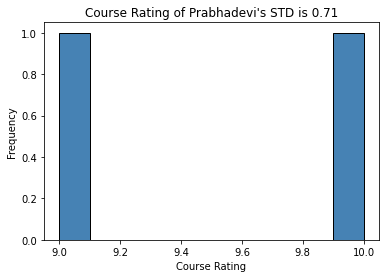

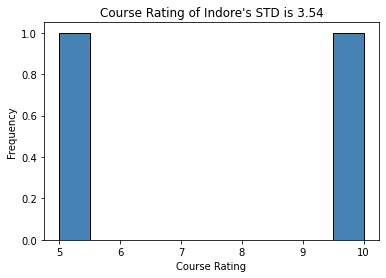

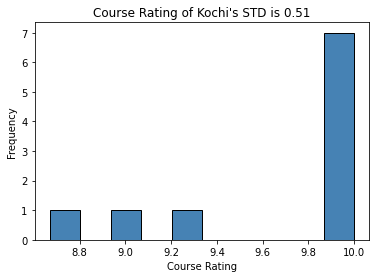

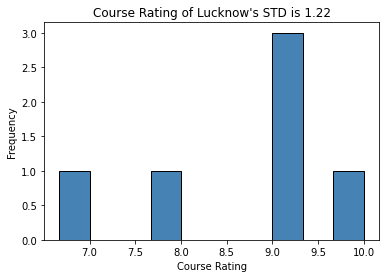

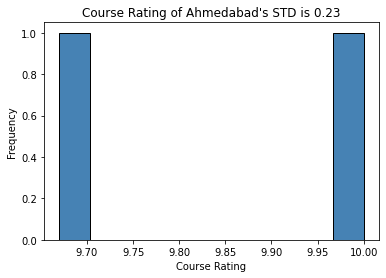

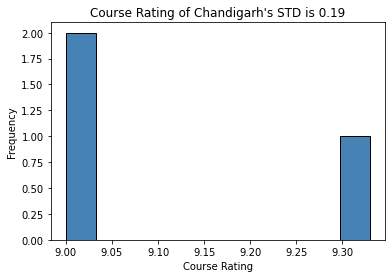

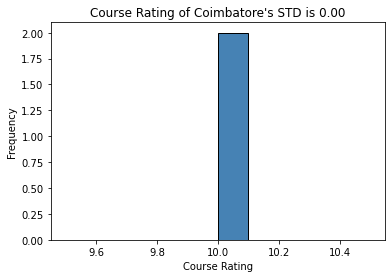

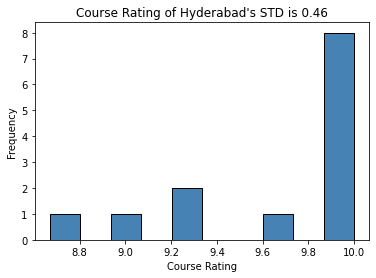

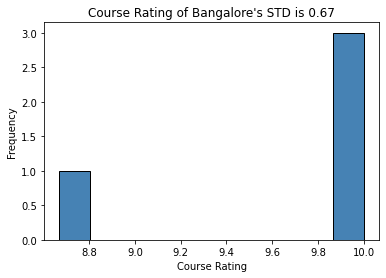

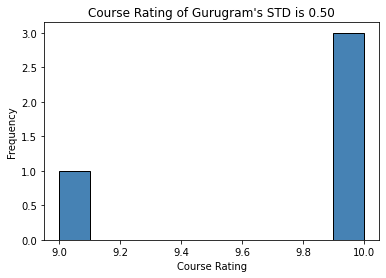

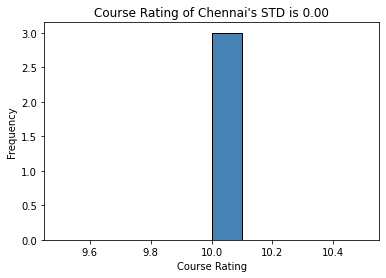

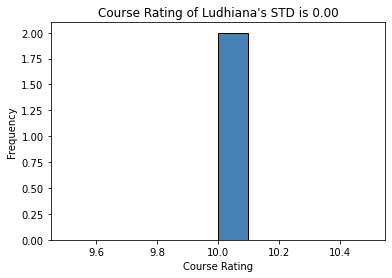

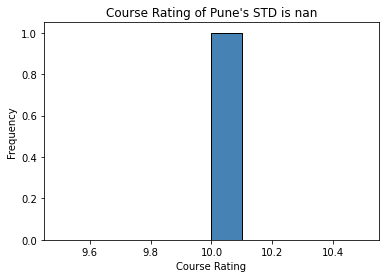

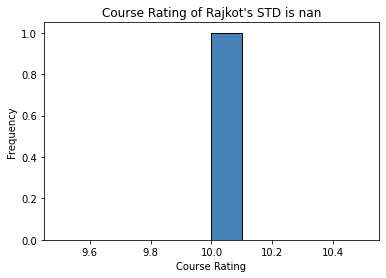

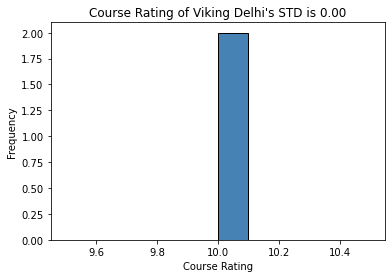

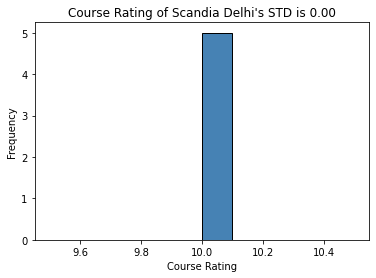

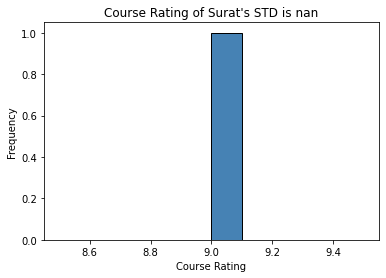

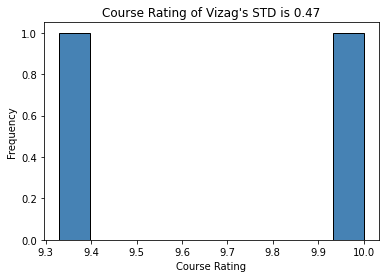

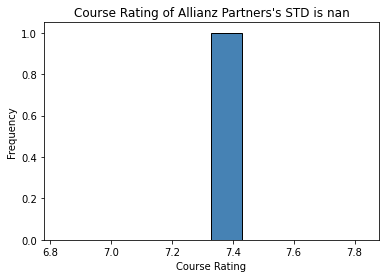

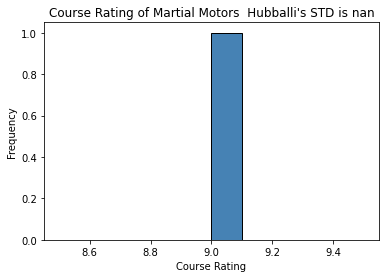

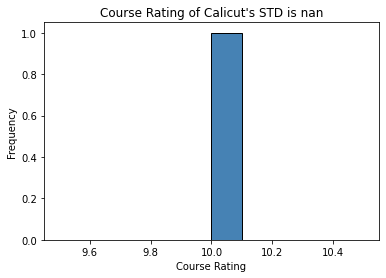

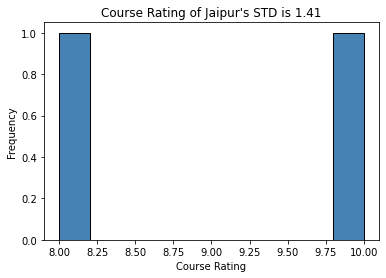

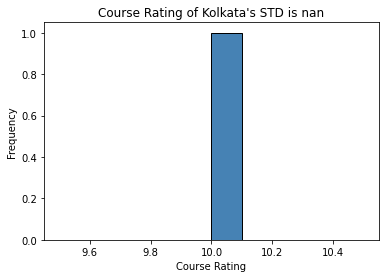

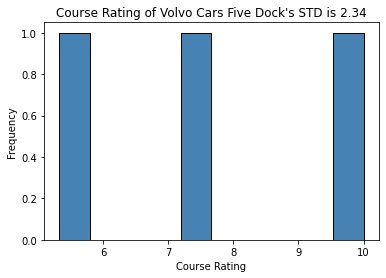

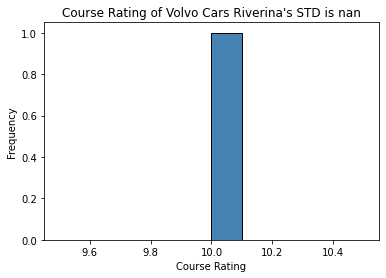

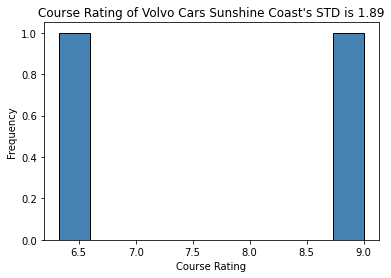

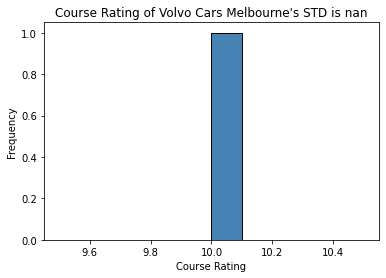

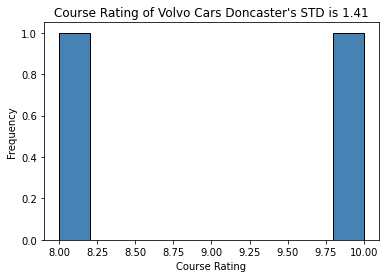

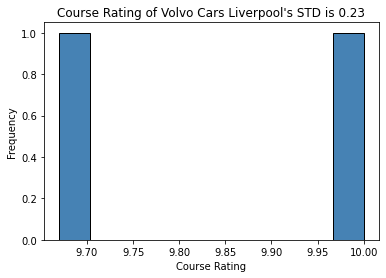

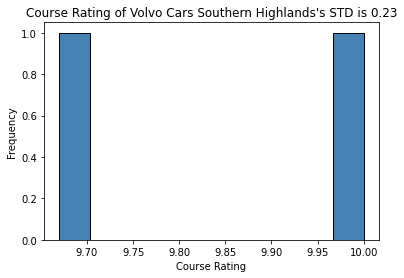

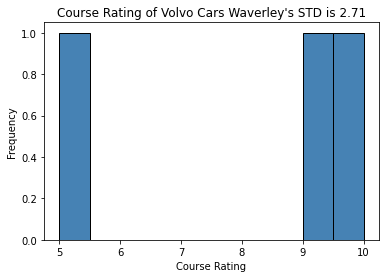

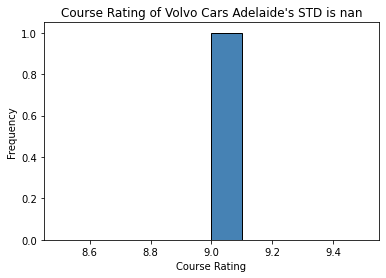

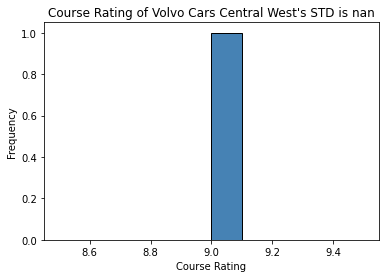

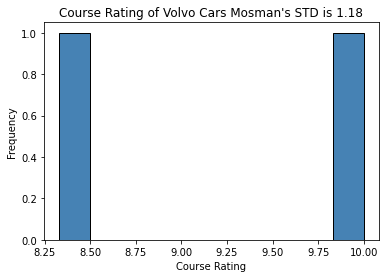

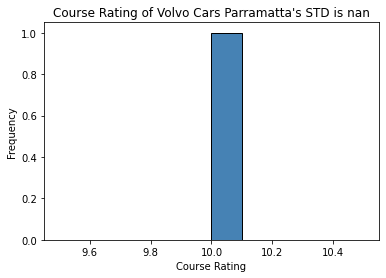

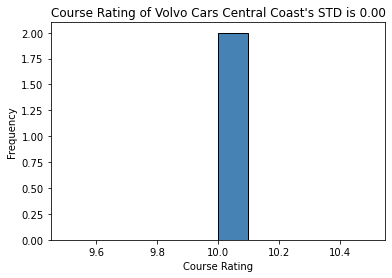

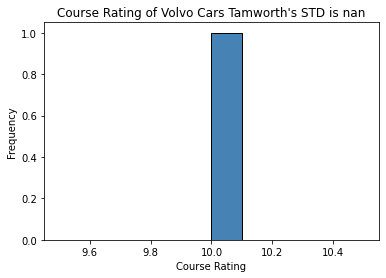

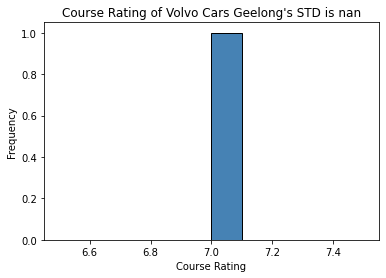

In [9]:
# 批量绘制Course Rating的DEALER STD图
batch_plot_std(course_rating_df, 'Course Rating', 'Dealer')

### 按Market维度统计Course Rating数量
1. 按照MARKET分组统计Course Rating数量
2. 按照MARKET排序输出结果CR_M_COUNT_df

In [10]:
# 按市场维度统计课程评分数量
CR_M_COUNT = course_rating_df.groupby('MARKET')['Course Rating'].count()
CR_M_COUNT_df = CR_M_COUNT.reset_index()
CR_M_COUNT_df

MARKET  Course Rating
0  AUSTRALIA             25
1      INDIA             71

In [11]:
# 课程评分数量绘图
plot(CR_M_COUNT_df, 'Course Rating', 'QTY of Course Rating by Market', by='MARKET', dir='QTY')

### 按Market维度统计Course Rating标准差
1. 按照MARKET分组统计Course Rating标准差
2. 按照MARKET排序输出结果SD_CR_M_df

In [12]:
# 按市场维度统计课程评分标准差
SD_CR_M = course_rating_df.groupby('MARKET')['Course Rating'].std().round(2)
SD_CR_M.rename('SD_CR_M', inplace=True)
SD_CR_M_df = SD_CR_M.reset_index()
SD_CR_M_df

MARKET  SD_CR_M
0  AUSTRALIA     1.55
1      INDIA     0.87

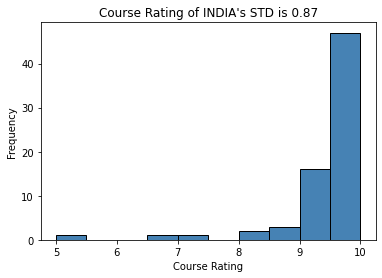

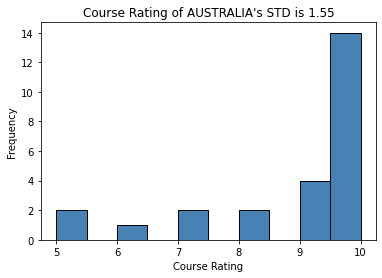

In [13]:
# 批量绘制Course Rating的MARKET STD图
batch_plot_std(course_rating_df, 'Course Rating', 'MARKET')

In [14]:
# 按MARKET维度统计课程评分标准差绘图 
plot(SD_CR_M_df, 'SD_CR_M', 'STD of Course Rating by Market', 'MARKET')

### 计算Course Completion和培训开始日期START DATE
1. 获取'COMPLETED', 'KNOWLEDGE GAP IDENTIFIED', 'IN PROGRESS', 'ENROLLED', 'ABSENT', 'NOT STARTED'对应的颜色存储为字典
2. 遍历记录课时完成状态的cell, 总课时为一行cell的数量记为ALL, 完成课时为cell颜色等于COMPLETED状态颜色的数量，记为COMPLETED, 将每行为完成状态日期的最小值记为START DATE

In [15]:
from openpyxl import load_workbook
excel_file = '准备数据\MML系统数据\Training Map - Sales Learning Programme - India (2022.08.11 08.30.12 AM GMT+00_00).xlsx' 
wb = load_workbook(excel_file, data_only = True)
sh = wb['Competencies']

# 获取状态颜色字典
color_in_hex = [cell.fill.start_color.index for cell in sh['AO:AO'][:6]]
status = ['COMPLETED', 'KNOWLEDGE GAP IDENTIFIED', 'IN PROGRESS', 'ENROLLED', 'ABSENT', 'NOT STARTED']
status_color_dict = dict(zip(status, color_in_hex))

# 统计完成课程数量
def cal_complete_lecture(min_row, min_col, sh, df):
    index = 0
    for row in sh.iter_rows(min_row=min_row, max_row=sh.max_row, min_col=min_col, max_col=sh.max_column):
        all_lecture = 0
        complete_lecture = 0
        start_date = None
        for cell in row:
            if cell.fill.start_color.index == status_color_dict['COMPLETED']:
                complete_lecture += 1
                if start_date is None and cell.value:
                    start_date = pd.to_datetime(cell.value, format='%d/%m/%Y')
                elif start_date is not None and cell.value:
                    if pd.to_datetime(cell.value, format='%d/%m/%Y') < start_date:
                        start_date = pd.to_datetime(cell.value, format='%d/%m/%Y')
            all_lecture += 1
        df.loc[index, 'COMPLETED'] = complete_lecture
        df.loc[index, 'ALL'] = all_lecture
        df.loc[index, 'START DATE'] = start_date
        index += 1
    return df

# 统计wb0039课程完成数量
min_row = 9
min_col = 13
wb0998_complement_df = cal_complete_lecture(min_row, min_col, sh, wb0998_complement_df)

# 统计wb0982课程完成数量
excel_file = '准备数据\MML系统数据\Training Map VCC5040 - AU and IN - (2022.08.11 08.26.42 AM GMT+00_00).xlsx'
wb = load_workbook(excel_file, data_only = True)
sh = wb['Competencies']
min_row = 9
min_col = 13
wb0982_complement_df = cal_complete_lecture(min_row, min_col, sh, wb0982_complement_df)

# 统计wb0039课程完成数量
excel_file = '准备数据\MML系统数据\Competencies - Sales Learning Programme - AU - (2022.08.11 08.31.42 AM GMT+00_00).xlsx'
wb = load_workbook(excel_file, data_only = True)
sh = wb['1 Sales (previously Consultativ']
min_row = 10
min_col = 16
wb0039_complement_df = cal_complete_lecture(min_row, min_col, sh, wb0039_complement_df)

### 按Dealer维度统计Course Completion数量以及计算Sale开始培训日期START DATE
1. 取wb0998_complement_df，wb0982_complement_df，wb0039_complement_df的共同列
2. 按照共同列合并wb0998_complement_df，wb0982_complement_df，wb0039_complement_df
3. 将列COMPLETED重命名为Course Completion
4. 去除‘N’开头的DEALER CODE行
5. 为澳洲市场的DEALER CODE添加‘6AU’ (条件为原始的DEALER CODE的第二位为数字，否则保持原有DEALER CODE)
6. 按照MARKET, DEALER CODE, DEALER, CDSID分组求和计算每个Sale的完成课时和总课时，分组求最小值计算每个Sale的开始培训日期
7. 按照MARKET, DEALER CODE, DEALER分组统计每个Dealer的Sales数量
8. 按照DEALER排序输出结果CR_D_COUNT_df

In [16]:
# 按经销商维度统计课程完成数量标准差
common_columns = list(set(wb0998_complement_df.columns) & set(wb0982_complement_df.columns) & set(wb0039_complement_df.columns))
complement_df = pd.concat([wb0998_complement_df[common_columns], wb0982_complement_df[common_columns],wb0039_complement_df[common_columns]], axis=0, ignore_index=True)
complement_df.rename(columns={'COMPLETED': 'Course Completion'}, inplace=True)

complement_df['DEALER CODE'] = complement_df['DEALER CODE'].astype(str)
complement_df = complement_df[~complement_df['DEALER CODE'].str.startswith('N')]

for index, row in complement_df.iterrows():
    if row['MARKET'] == 'AUSTRALIA':
        complement_df.loc[index, 'DEALER CODE'] = '6AU' + row['DEALER CODE'] if row['DEALER CODE'][1].isdigit() else row['DEALER CODE']

complement_df = complement_df.groupby(['MARKET', 'DEALER CODE', 'DEALER', 'CDSID']).agg({'ALL': 'sum', 'Course Completion': 'sum', 'START DATE': 'min'}).reset_index()

CC_D_COUNT = complement_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Course Completion'].count()
CC_D_COUNT.rename('QTY', inplace=True)
CC_D_COUNT_df = CC_D_COUNT.reset_index()
CC_D_COUNT_df

MARKET DEALER CODE                         DEALER  QTY
0   AUSTRALIA     6AU2014     Volvo Cars Rushcutters Bay    5
1   AUSTRALIA     6AU2040           Volvo Cars Five Dock    7
2   AUSTRALIA     6AU2068           Volvo Cars Lindfield    4
3   AUSTRALIA     6AU2088              Volvo Cars Mosman    4
4   AUSTRALIA     6AU2156          Volvo Cars Parramatta    6
5   AUSTRALIA     6AU2173           Volvo Cars Liverpool    3
6   AUSTRALIA     6AU2230          Volvo Cars Sutherland    2
7   AUSTRALIA     6AU2251       Volvo Cars Central Coast    2
8   AUSTRALIA     6AU2292           Volvo Cars Newcastle    3
9   AUSTRALIA     6AU2342            Volvo Cars Tamworth    4
10  AUSTRALIA     6AU2580  Volvo Cars Southern Highlands    3
11  AUSTRALIA     6AU2605            Volvo Cars Canberra    3
12  AUSTRALIA     6AU2652            Volvo Cars Riverina    3
13  AUSTRALIA     6AU2754             Volvo Cars Penrith    3
14  AUSTRALIA     6AU2804        Volvo Cars Central West    2
15  AUSTRALIA     6AU3040            Volvo Cars Essendon    4
16  AUSTRALIA     6AU3107           Volvo Cars Doncaster    5
17  AUSTRALIA     6AU3112         Volvo Cars South Yarra    6
18  AUSTRALIA     6AU3170            Volvo Cars Waverley    7
19  AUSTRALIA     6AU3187            Volvo Cars Brighton    6
20  AUSTRALIA     6AU3206           Volvo Cars Melbourne    7
21  AUSTRALIA     6AU3222             Volvo Cars Geelong    4
22  AUSTRALIA     6AU3807             Volvo Cars Berwick    1
23  AUSTRALIA     6AU4008      Volvo Cars Brisbane North   10
24  AUSTRALIA     6AU4128          Volvo Cars Springwood    4
25  AUSTRALIA     6AU4213          Volvo Cars Gold Coast    3
26  AUSTRALIA     6AU4556      Volvo Cars Sunshine Coast    2
27  AUSTRALIA     6AU4816          Volvo Cars Townsville    3
28  AUSTRALIA     6AU4875              Volvo Cars Cairns    1
29  AUSTRALIA     6AU5060            Volvo Cars Adelaide    4
30  AUSTRALIA     6AU6017               Volvo Cars Perth    9
31  AUSTRALIA     6AU6107          Volvo Cars Cannington    1
32  AUSTRALIA     6AU7004              Volvo Cars Hobart    4
33  AUSTRALIA     6AU7254          Volvo Cars Launceston    2
34      INDIA     6IN6038                          Kochi    5
35      INDIA    6IN60381                        Calicut    2
36      INDIA     6IN6043                       Gurugram    5
37      INDIA    6IN60431                   Viking Delhi    4
38      INDIA     6IN6044                      Ahmedabad    6
39      INDIA    6IN60441                          Surat    1
40      INDIA     6IN6045                      Bangalore    7
41      INDIA     6IN6048                     Chandigarh    3
42      INDIA     6IN6049                        Andheri    2
43      INDIA   6IN6049S2                     Prabhadevi    3
44      INDIA     6IN6054                        Lucknow    4
45      INDIA     6IN6056                           Pune    4
46      INDIA     6IN6057                  Scandia Delhi    6
47      INDIA     6IN6058                       Ludhiana    2
48      INDIA     6IN6059                         Raipur    4
49      INDIA     6IN6060                         Indore    2
50      INDIA     6IN6061                        Kolkata    3
51      INDIA     6IN6071                      Hyderabad    7
52      INDIA     6IN6072                        Chennai    5
53      INDIA     6IN6073                     Coimbatore    5
54      INDIA     6IN6074                         Rajkot    1
55      INDIA     6IN6075                         Jaipur    4

In [17]:
plot(CC_D_COUNT, 'QTY', 'QTY of Course Completion by Dealer', by='DEALER', dir='QTY')

### 按Dealer维度统计Course Completion标准差
1. 按照MARKET, DEALER CODE, DEALER分组统计Course Completion标准差
2. 按照DEALER排序输出结果SD_CC_D_df

In [18]:
SD_CC_D = complement_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Course Completion'].std().round(2)
SD_CC_D.rename('SD_CC_D', inplace=True)
SD_CC_D_df = SD_CC_D.reset_index()
SD_CC_D_df.sort_values(inplace=True, by=['DEALER'])
SD_CC_D_df

MARKET DEALER CODE                         DEALER  SD_CC_D
38      INDIA     6IN6044                      Ahmedabad     3.20
42      INDIA     6IN6049                        Andheri     1.41
40      INDIA     6IN6045                      Bangalore     0.00
35      INDIA    6IN60381                        Calicut     0.00
41      INDIA     6IN6048                     Chandigarh     2.08
52      INDIA     6IN6072                        Chennai    11.52
53      INDIA     6IN6073                     Coimbatore    12.78
36      INDIA     6IN6043                       Gurugram     2.17
51      INDIA     6IN6071                      Hyderabad     0.00
49      INDIA     6IN6060                         Indore    14.85
55      INDIA     6IN6075                         Jaipur     0.00
34      INDIA     6IN6038                          Kochi     0.89
50      INDIA     6IN6061                        Kolkata     0.00
44      INDIA     6IN6054                        Lucknow     3.00
47      INDIA     6IN6058                       Ludhiana     0.00
43      INDIA   6IN6049S2                     Prabhadevi     0.58
45      INDIA     6IN6056                           Pune    11.18
48      INDIA     6IN6059                         Raipur    12.70
54      INDIA     6IN6074                         Rajkot      NaN
46      INDIA     6IN6057                  Scandia Delhi     1.76
39      INDIA    6IN60441                          Surat      NaN
37      INDIA    6IN60431                   Viking Delhi     0.58
29  AUSTRALIA     6AU5060            Volvo Cars Adelaide    11.12
22  AUSTRALIA     6AU3807             Volvo Cars Berwick      NaN
19  AUSTRALIA     6AU3187            Volvo Cars Brighton     2.56
23  AUSTRALIA     6AU4008      Volvo Cars Brisbane North     4.16
28  AUSTRALIA     6AU4875              Volvo Cars Cairns      NaN
11  AUSTRALIA     6AU2605            Volvo Cars Canberra     3.61
31  AUSTRALIA     6AU6107          Volvo Cars Cannington      NaN
7   AUSTRALIA     6AU2251       Volvo Cars Central Coast     0.71
14  AUSTRALIA     6AU2804        Volvo Cars Central West     4.95
16  AUSTRALIA     6AU3107           Volvo Cars Doncaster     6.46
15  AUSTRALIA     6AU3040            Volvo Cars Essendon    14.28
1   AUSTRALIA     6AU2040           Volvo Cars Five Dock    10.78
21  AUSTRALIA     6AU3222             Volvo Cars Geelong     7.27
25  AUSTRALIA     6AU4213          Volvo Cars Gold Coast     6.11
32  AUSTRALIA     6AU7004              Volvo Cars Hobart     2.63
33  AUSTRALIA     6AU7254          Volvo Cars Launceston     2.83
2   AUSTRALIA     6AU2068           Volvo Cars Lindfield     8.45
5   AUSTRALIA     6AU2173           Volvo Cars Liverpool    15.70
20  AUSTRALIA     6AU3206           Volvo Cars Melbourne     9.47
3   AUSTRALIA     6AU2088              Volvo Cars Mosman    11.15
8   AUSTRALIA     6AU2292           Volvo Cars Newcastle    14.01
4   AUSTRALIA     6AU2156          Volvo Cars Parramatta    10.92
13  AUSTRALIA     6AU2754             Volvo Cars Penrith     9.24
30  AUSTRALIA     6AU6017               Volvo Cars Perth     8.95
12  AUSTRALIA     6AU2652            Volvo Cars Riverina    16.07
0   AUSTRALIA     6AU2014     Volvo Cars Rushcutters Bay     6.22
17  AUSTRALIA     6AU3112         Volvo Cars South Yarra    10.73
10  AUSTRALIA     6AU2580  Volvo Cars Southern Highlands     3.00
24  AUSTRALIA     6AU4128          Volvo Cars Springwood     3.69
26  AUSTRALIA     6AU4556      Volvo Cars Sunshine Coast     4.95
6   AUSTRALIA     6AU2230          Volvo Cars Sutherland     4.95
9   AUSTRALIA     6AU2342            Volvo Cars Tamworth     7.97
27  AUSTRALIA     6AU4816          Volvo Cars Townsville    15.01
18  AUSTRALIA     6AU3170            Volvo Cars Waverley     9.21

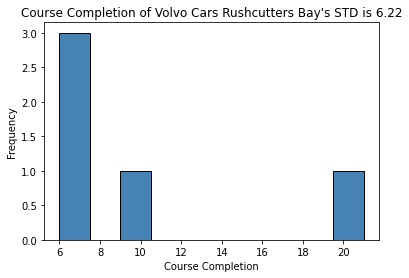

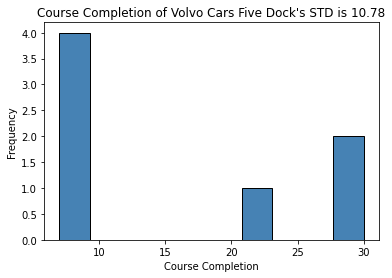

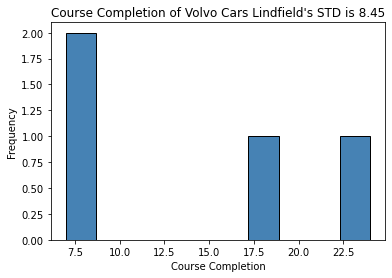

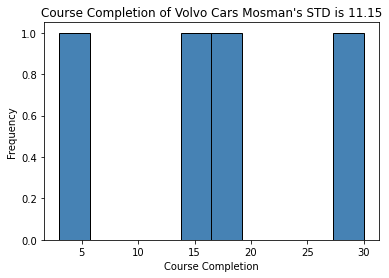

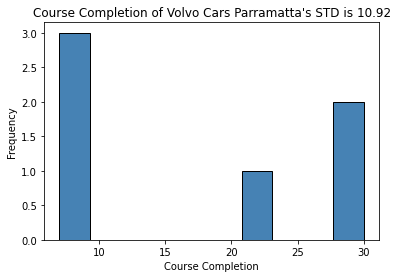

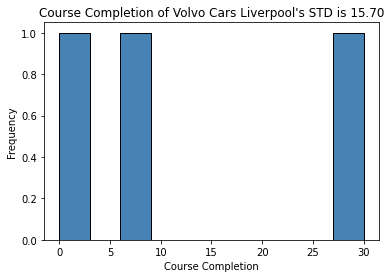

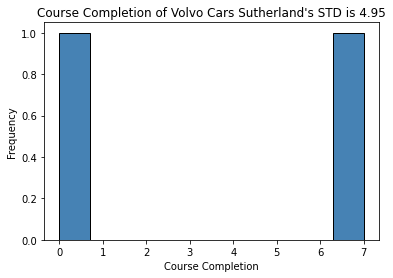

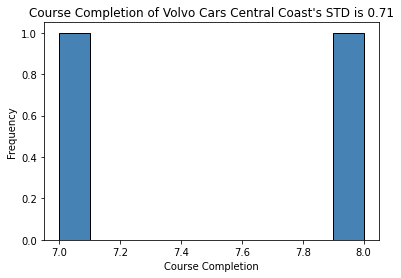

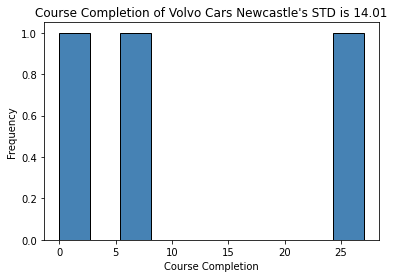

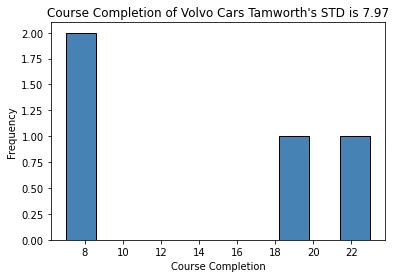

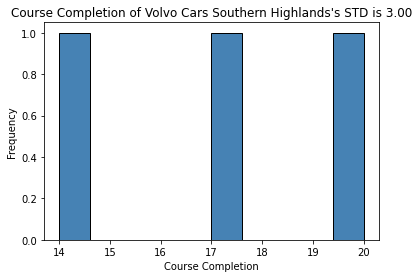

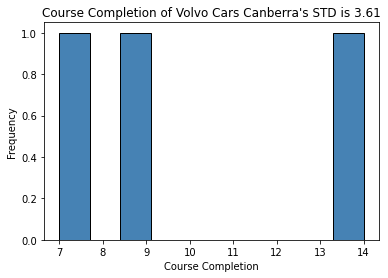

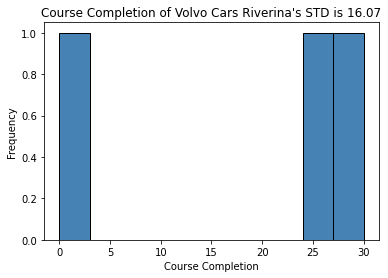

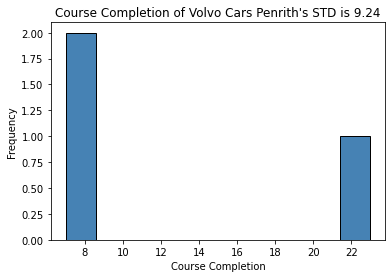

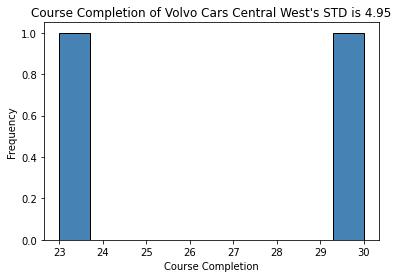

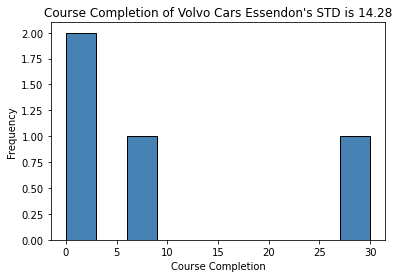

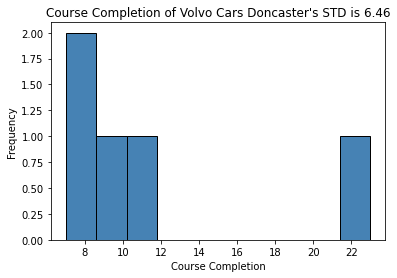

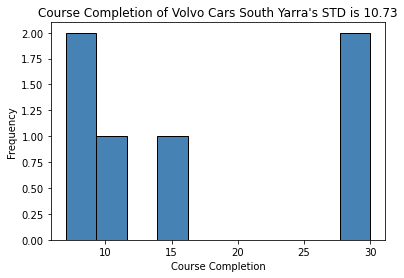

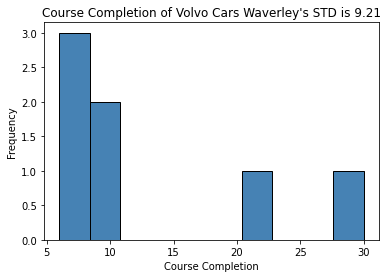

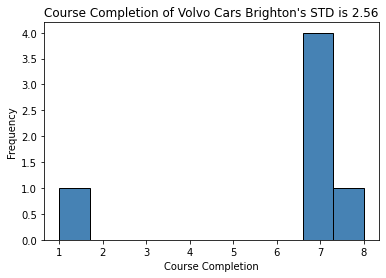

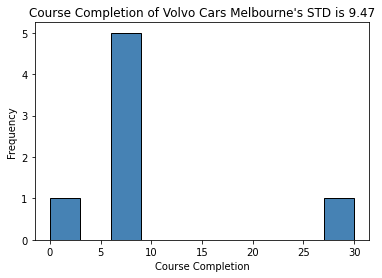

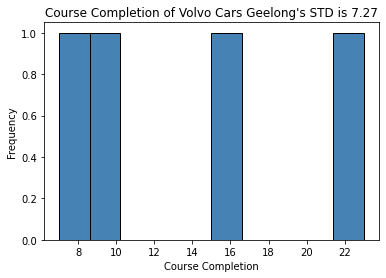

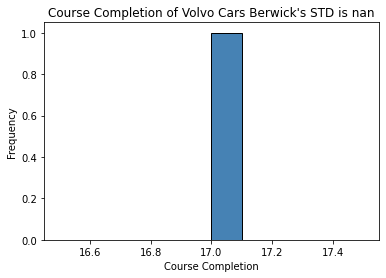

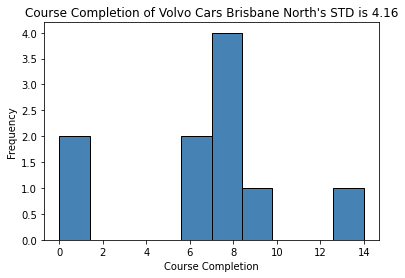

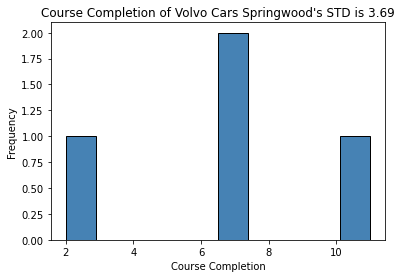

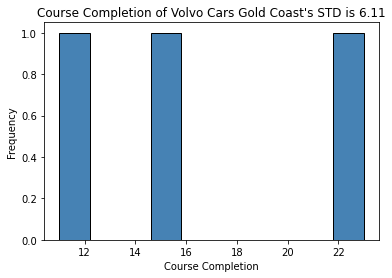

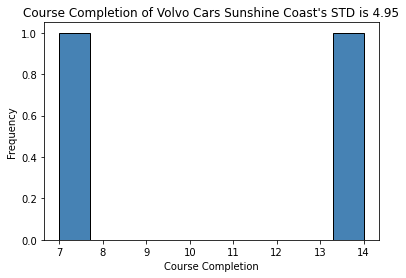

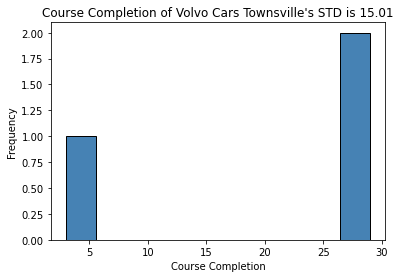

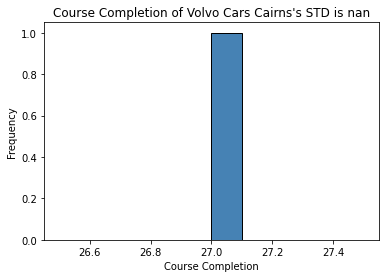

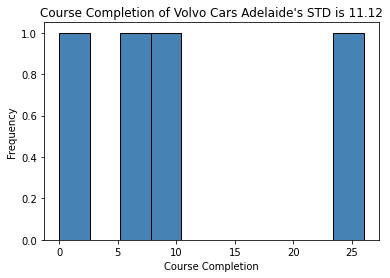

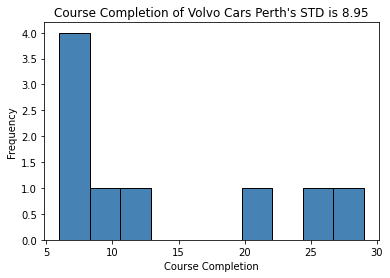

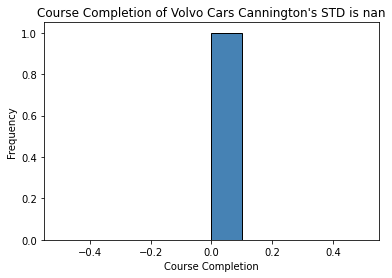

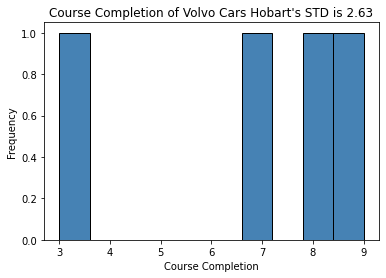

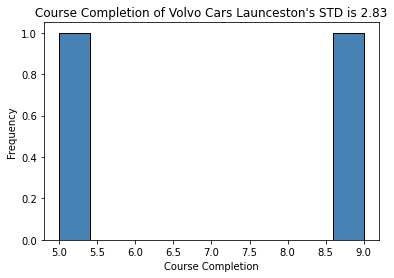

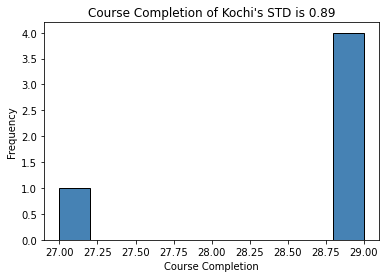

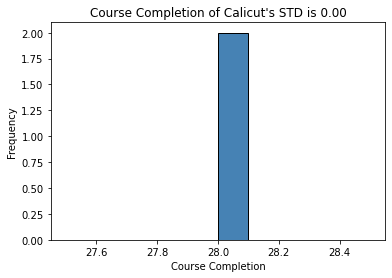

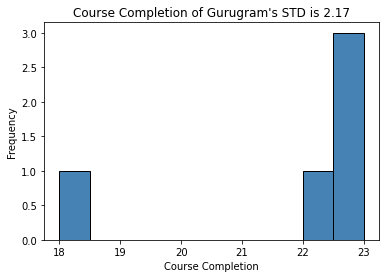

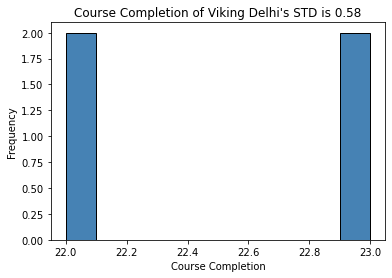

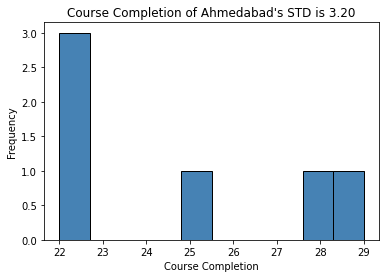

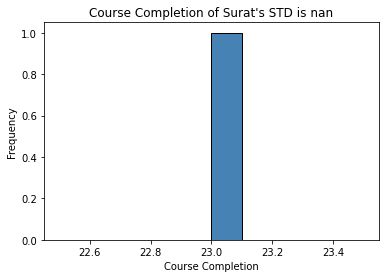

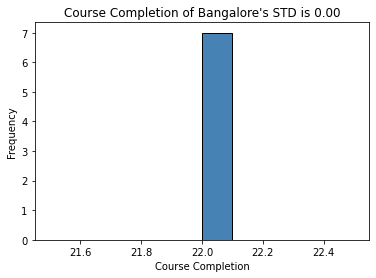

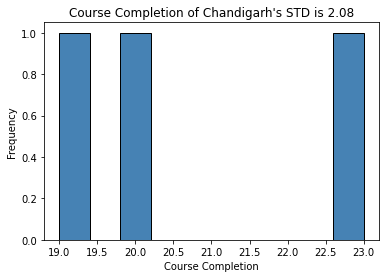

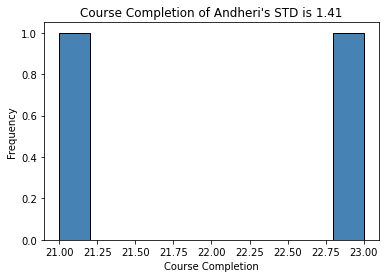

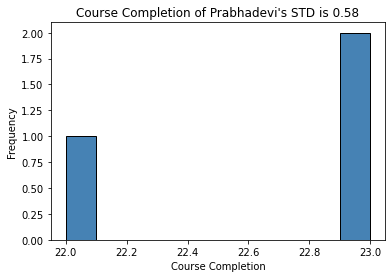

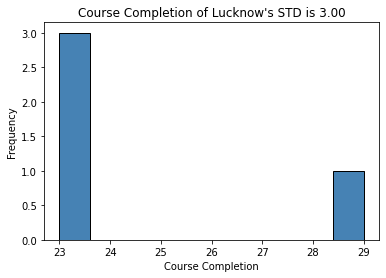

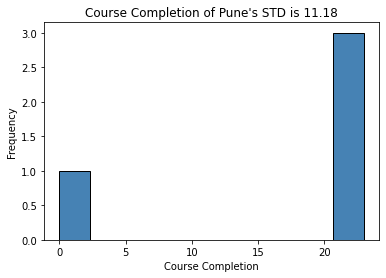

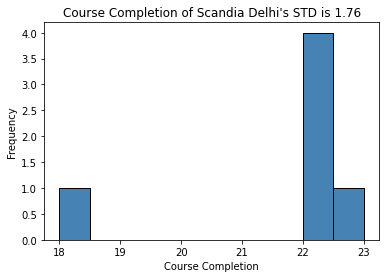

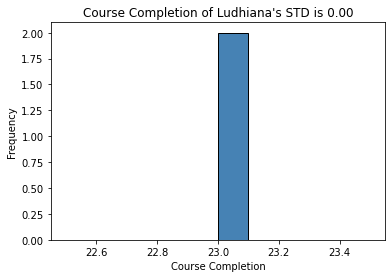

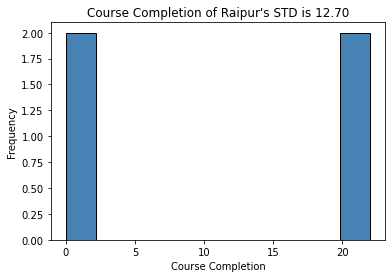

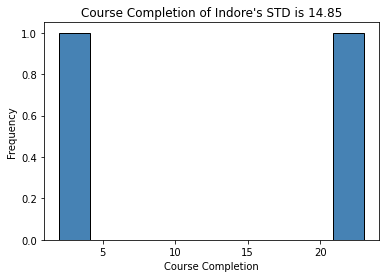

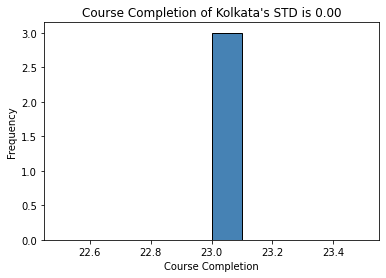

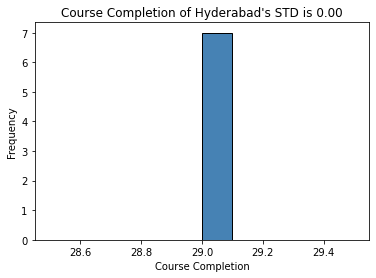

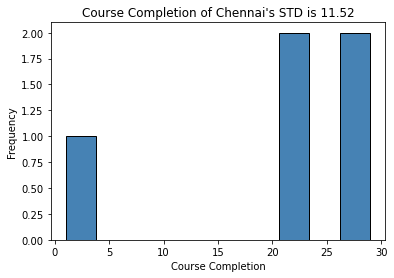

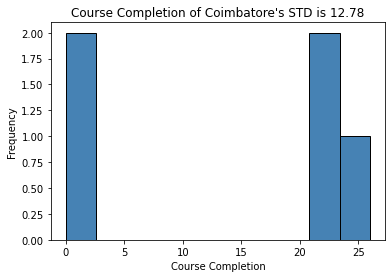

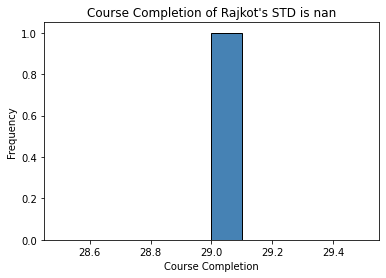

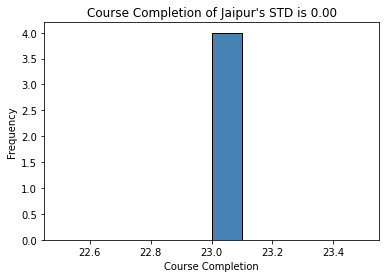

In [19]:
batch_plot_std(complement_df, 'Course Completion', 'Dealer')

In [20]:
# 按经销商维度统计课程完成数量标准差绘图
plot(SD_CC_D_df, 'SD_CC_D', 'STD of Course Completion by Dealer', by='DEALER', dir='STD')

### 按Market维度统计Course Completion数量
1. 按照MARKET分组统计Course Completion数量
2. 按照MARKET排序输出结果CC_M_COUNT_df

In [21]:
# 按MARKET维度统计课程完成数量
CC_M_COUNT = complement_df.groupby(['MARKET'])['Course Completion'].count()
CC_M_COUNT.rename('QTY', inplace=True)
CC_M_COUNT_df = CC_M_COUNT.reset_index()
CC_M_COUNT_df.sort_values('MARKET', inplace=True)
CC_M_COUNT_df

MARKET  QTY
0  AUSTRALIA  137
1      INDIA   85

In [22]:
plot(CC_M_COUNT_df, 'QTY', 'QTY of Course Completion by Market', by='MARKET', dir='QTY' )

### 按Market维度统计Course Completion标准差
1. 按照MARKET分组统计Course Completion标准差
2. 按照MARKET排序输出结果SD_CC_M_df

In [23]:
SD_CC_M = complement_df.groupby('MARKET')['Course Completion'].std().round(2)
SD_CC_M.rename('SD_CC_M', inplace=True)
SD_CC_M_df = SD_CC_M.reset_index() 
SD_CC_M_df

MARKET  SD_CC_M
0  AUSTRALIA     9.07
1      INDIA     7.10

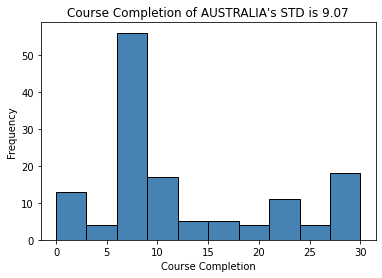

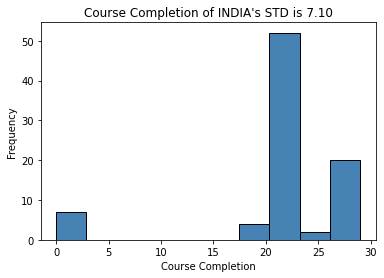

In [24]:
batch_plot_std(complement_df, 'Course Completion', 'Market')

In [25]:
# 按市场维度统计课程完成数量标准差绘图
plot(SD_CC_M_df, 'SD_CC_M', 'STD of Course Completion by Market', by='MARKET')

### 按Dealer维度统计Course Post-Test Score数量
1. 合并印度和澳洲市场assessment文件
2. 将列GRADE重命名为Course Post-Test Score
3. 去除全为空的行
4. 按DATE倒序排列数据
5. 同一个USER CODE只保留最近日期的成绩
6. 去除‘N’开头的DEALER CODE行
7. 为澳洲市场的DEALER CODE添加‘6AU’ (条件为原始的DEALER CODE的第二位为数字，否则保持原有DEALER CODE)
8. 按照MARKET, DEALER CODE, DEALER分组统计每个Dealer的Sales数量
9. 按照DEALER排序输出结果CR_D_COUNT_df

In [26]:
assessment_df = pd.concat([assessment_df_AU, assessment_df_IN], axis=0, ignore_index=True)
assessment_df.rename(columns={'GRADE':'Course Post-Test Score'}, inplace=True)
assessment_df.dropna(how='all', inplace=True)
assessment_df.sort_values(by='DATE', ascending=False, inplace=True)
assessment_df.drop_duplicates(subset=['DEALER CODE', 'USER CODE'], keep='first', inplace=True)

assessment_df['DEALER CODE'] = assessment_df['DEALER CODE'].astype(str)
assessment_df = assessment_df[~assessment_df['DEALER CODE'].str.startswith('N')]

for index, row in assessment_df.iterrows():
    if row['MARKET'] == 'AUSTRALIA':
        assessment_df.loc[index, 'DEALER CODE'] = '6AU' + row['DEALER CODE'] if row['DEALER CODE'][1].isdigit() else row['DEALER CODE']


# 按经销商维度统计课程测验分数标准差
CPT_D_COUNT = assessment_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Course Post-Test Score'].count()
CPT_D_COUNT.rename('QTY', inplace=True)
CPT_D_COUNT_df = CPT_D_COUNT.reset_index()
CPT_D_COUNT_df.sort_values('DEALER', inplace=True)
CPT_D_COUNT_df

MARKET DEALER CODE                         DEALER  QTY
27      INDIA     6IN6045                      Bangalore    2
29      INDIA     6IN6073                     Coimbatore    1
28      INDIA     6IN6067       Martial Motors  Hubballi    1
23  AUSTRALIA     6AU5060            Volvo Cars Adelaide    3
18  AUSTRALIA     6AU3807             Volvo Cars Berwick    3
16  AUSTRALIA     6AU3187            Volvo Cars Brighton   10
19  AUSTRALIA     6AU4008      Volvo Cars Brisbane North    7
9   AUSTRALIA     6AU2605            Volvo Cars Canberra    2
12  AUSTRALIA     6AU2804        Volvo Cars Central West    4
13  AUSTRALIA     6AU3107           Volvo Cars Doncaster   21
1   AUSTRALIA     6AU2040           Volvo Cars Five Dock   19
21  AUSTRALIA     6AU4213          Volvo Cars Gold Coast    5
25  AUSTRALIA     6AU7004              Volvo Cars Hobart    1
26  AUSTRALIA     6AU7254          Volvo Cars Launceston    3
2   AUSTRALIA     6AU2068           Volvo Cars Lindfield   13
17  AUSTRALIA     6AU3206           Volvo Cars Melbourne   11
3   AUSTRALIA     6AU2088              Volvo Cars Mosman    6
6   AUSTRALIA     6AU2292           Volvo Cars Newcastle    1
4   AUSTRALIA     6AU2156          Volvo Cars Parramatta   11
11  AUSTRALIA     6AU2754             Volvo Cars Penrith    1
24  AUSTRALIA     6AU6017               Volvo Cars Perth    3
10  AUSTRALIA     6AU2652            Volvo Cars Riverina    4
0   AUSTRALIA     6AU2014     Volvo Cars Rushcutters Bay    4
14  AUSTRALIA     6AU3112         Volvo Cars South Yarra   11
8   AUSTRALIA     6AU2580  Volvo Cars Southern Highlands    3
20  AUSTRALIA     6AU4128          Volvo Cars Springwood    1
22  AUSTRALIA     6AU4556      Volvo Cars Sunshine Coast    1
5   AUSTRALIA     6AU2230          Volvo Cars Sutherland    6
7   AUSTRALIA     6AU2342            Volvo Cars Tamworth    1
15  AUSTRALIA     6AU3170            Volvo Cars Waverley    6

In [27]:
plot(CPT_D_COUNT_df, 'QTY', 'QTY of Course Post-Test Score by Dealer', by='DEALER', dir='QTY')

### 按Dealer维度统计Course Post-Test Score标准差
1. 按照MARKET, DEALER CODE, DEALER分组统计Course Post-Test Score标准差
2. 按照DEALER排序输出结果SD_CPT_D_df

In [28]:
SD_CPT_D = assessment_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Course Post-Test Score'].std().round(2)
SD_CPT_D.rename('SD_CPT_D', inplace=True)
SD_CPT_D_df = SD_CPT_D.reset_index()
SD_CPT_D_df.sort_values(inplace=True, by=['DEALER'])
SD_CPT_D_df

MARKET DEALER CODE                         DEALER  SD_CPT_D
27      INDIA     6IN6045                      Bangalore      4.16
29      INDIA     6IN6073                     Coimbatore       NaN
28      INDIA     6IN6067       Martial Motors  Hubballi       NaN
23  AUSTRALIA     6AU5060            Volvo Cars Adelaide     32.40
18  AUSTRALIA     6AU3807             Volvo Cars Berwick      3.40
16  AUSTRALIA     6AU3187            Volvo Cars Brighton      3.04
19  AUSTRALIA     6AU4008      Volvo Cars Brisbane North     17.46
9   AUSTRALIA     6AU2605            Volvo Cars Canberra     24.96
12  AUSTRALIA     6AU2804        Volvo Cars Central West     27.38
13  AUSTRALIA     6AU3107           Volvo Cars Doncaster     20.20
1   AUSTRALIA     6AU2040           Volvo Cars Five Dock     10.71
21  AUSTRALIA     6AU4213          Volvo Cars Gold Coast      7.20
25  AUSTRALIA     6AU7004              Volvo Cars Hobart       NaN
26  AUSTRALIA     6AU7254          Volvo Cars Launceston     27.17
2   AUSTRALIA     6AU2068           Volvo Cars Lindfield     14.68
17  AUSTRALIA     6AU3206           Volvo Cars Melbourne      0.00
3   AUSTRALIA     6AU2088              Volvo Cars Mosman     29.68
6   AUSTRALIA     6AU2292           Volvo Cars Newcastle       NaN
4   AUSTRALIA     6AU2156          Volvo Cars Parramatta      2.38
11  AUSTRALIA     6AU2754             Volvo Cars Penrith       NaN
24  AUSTRALIA     6AU6017               Volvo Cars Perth      5.89
10  AUSTRALIA     6AU2652            Volvo Cars Riverina      0.00
0   AUSTRALIA     6AU2014     Volvo Cars Rushcutters Bay     10.19
14  AUSTRALIA     6AU3112         Volvo Cars South Yarra     25.64
8   AUSTRALIA     6AU2580  Volvo Cars Southern Highlands     49.33
20  AUSTRALIA     6AU4128          Volvo Cars Springwood       NaN
22  AUSTRALIA     6AU4556      Volvo Cars Sunshine Coast       NaN
5   AUSTRALIA     6AU2230          Volvo Cars Sutherland     25.41
7   AUSTRALIA     6AU2342            Volvo Cars Tamworth       NaN
15  AUSTRALIA     6AU3170            Volvo Cars Waverley     17.45

In [29]:
# 按经销商维度统计课程完成数量标准差绘图
plot(SD_CPT_D_df, 'SD_CPT_D', 'STD of Course Post-Test Score by Dealer')

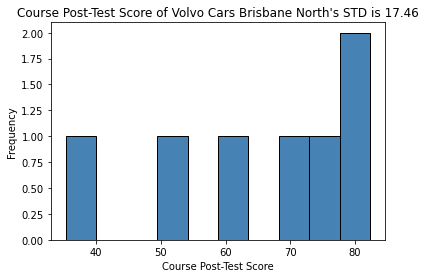

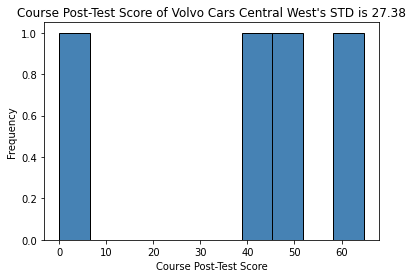

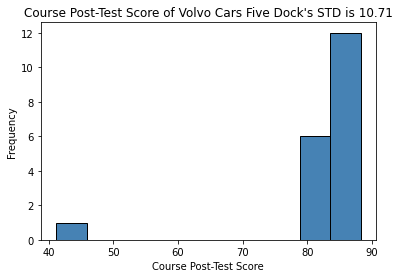

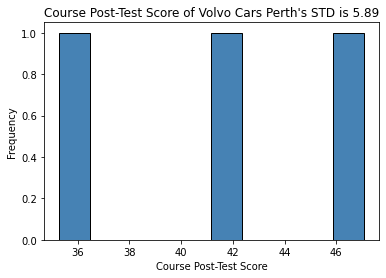

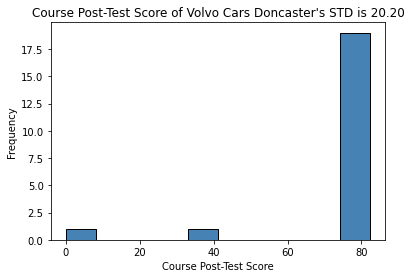

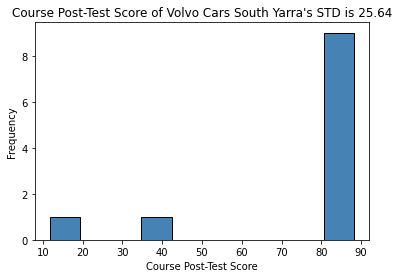

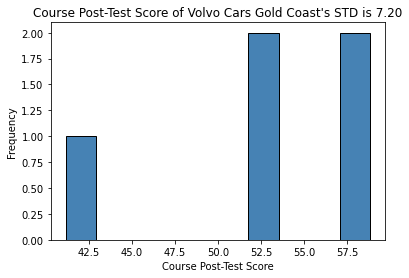

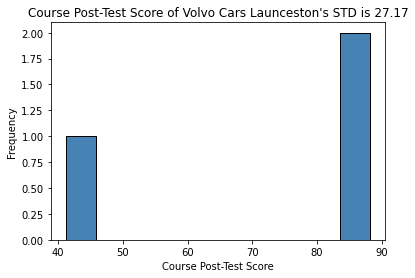

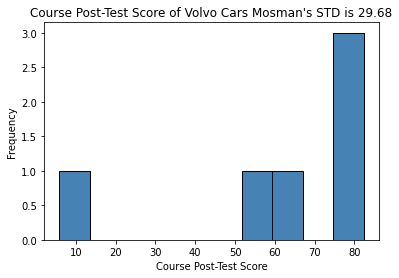

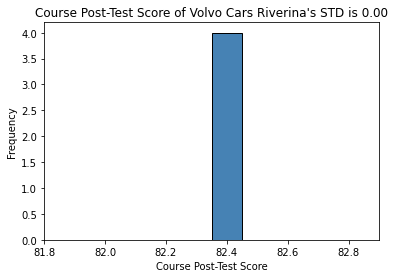

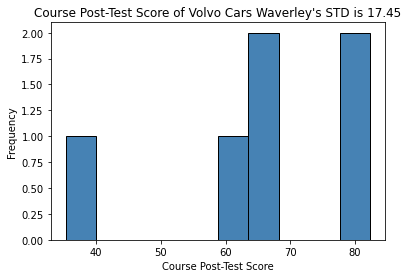

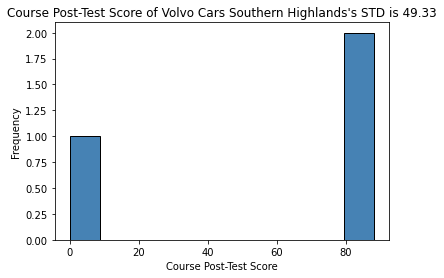

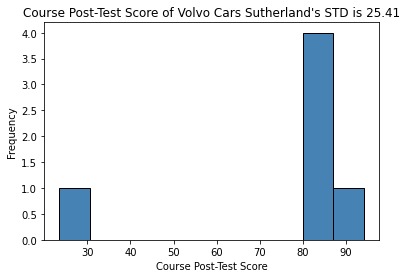

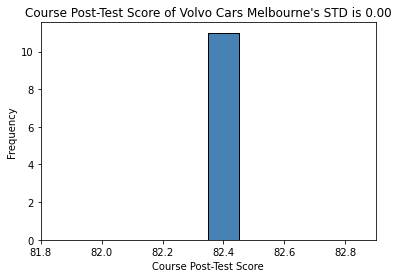

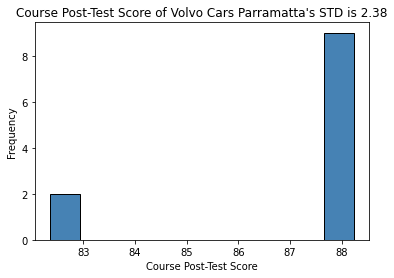

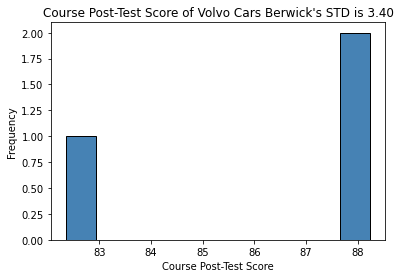

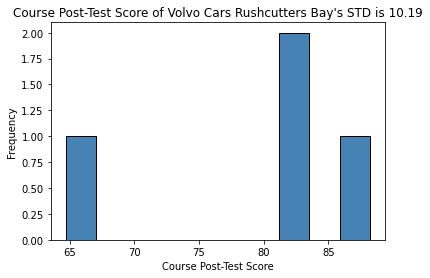

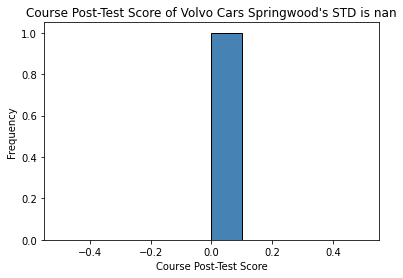

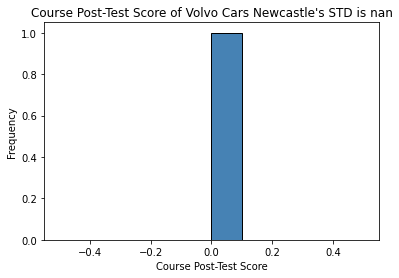

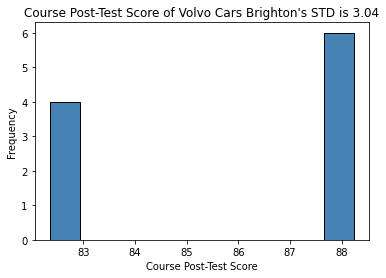

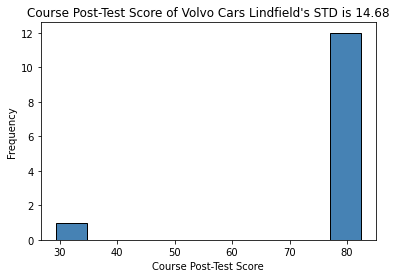

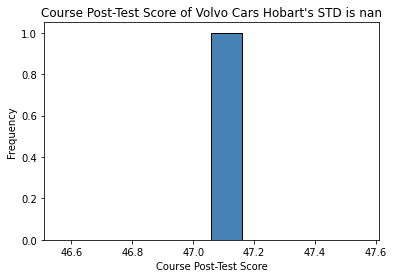

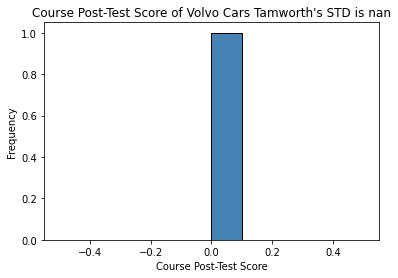

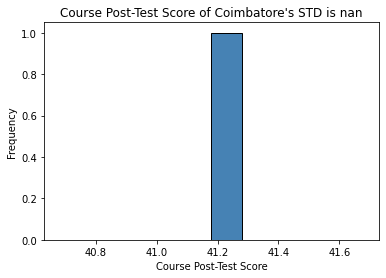

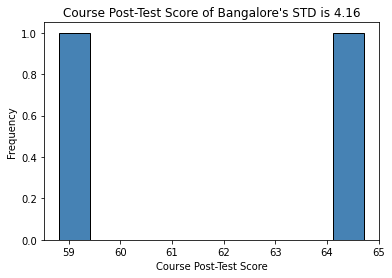

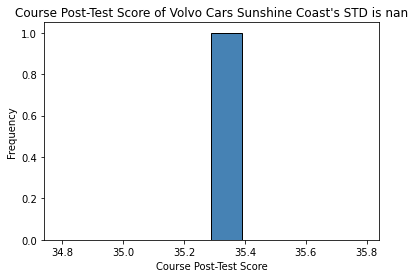

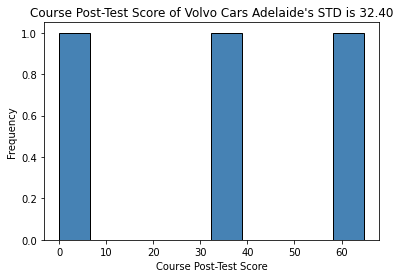

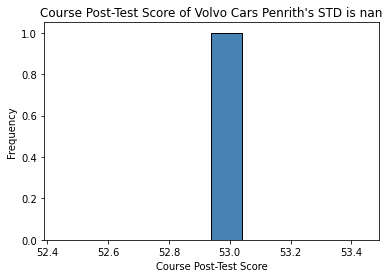

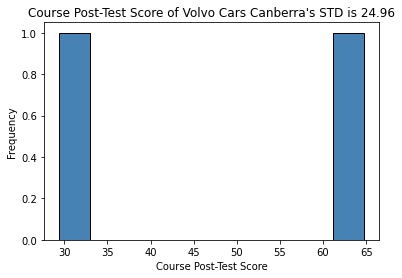

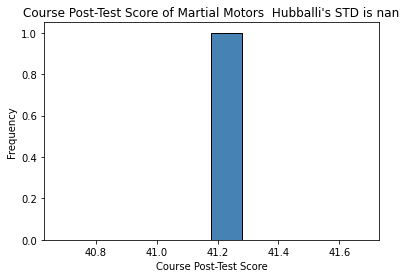

In [30]:
batch_plot_std(assessment_df, 'Course Post-Test Score', 'Dealer')

### 按Market维度统计Course Post-Test Score数量
1. 按照MARKET分组统计Course Post-Test Score数量
2. 按照DEALER排序输出结果CPT_M_COUNT_df

In [31]:
# 按市场维度统计课程测验分数标准差
CC_M_COUNT = assessment_df.groupby(['MARKET'])['Course Post-Test Score'].count()
CC_M_COUNT.rename('QTY', inplace=True)
CC_M_COUNT_df = CC_M_COUNT.reset_index()
CC_M_COUNT_df.sort_values('MARKET', inplace=True)
CC_M_COUNT_df

MARKET  QTY
0  AUSTRALIA  161
1      INDIA    4

### 按Market维度统计Course Post-Test Score标准差
1. 按照MARKET分组计算Course Post-Test Score标准差
2. 按照MARKET排序输出结果SD_CPT_M_df

In [32]:
SD_CPT_M = assessment_df.groupby('MARKET')['Course Post-Test Score'].std().round(2)
SD_CPT_M.rename('SD_CPT_M', inplace=True)
SD_CPT_M_df = SD_CPT_M.reset_index()
SD_CPT_M_df.sort_values('MARKET', inplace=True)
SD_CPT_M_df

MARKET  SD_CPT_M
0  AUSTRALIA     23.42
1      INDIA     12.13

In [33]:
# 按市场维度统计课程完成数量标准差绘图
plot(SD_CPT_M_df, 'SD_CPT_M', 'STD of Course Post-Test Score by Market', by='MARKET')

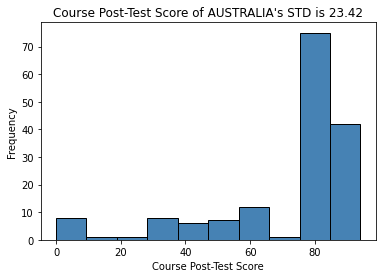

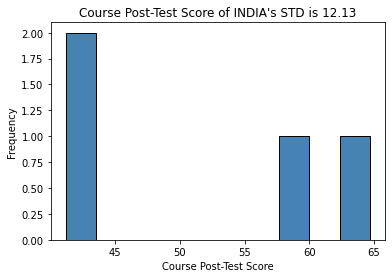

In [34]:
batch_plot_std(assessment_df, 'Course Post-Test Score', 'Market')

### 按Dealer维度统计Sales Learning Programme Completion(%)标准差
1. SLPC(%) = Course Completion / ALL * 100%
2. SLPC(%)的数量可以直接参考Course Completion
3. 按照MARKET, DEALER CODE, DEALER分组计算SLPC(%)的标准差
4. 按照DEALER排序输出结果SD_SLPC_D_df

In [35]:
# 按经销商维度统计课程完成率标准差
complement_df['Sales Learning Programme Completion(%)'] = round(complement_df['Course Completion'] / complement_df['ALL'] * 100, 2)
SLPC_D_COUNT = complement_df.groupby(['DEALER CODE'])['Sales Learning Programme Completion(%)'].count()
SLPC_D_COUNT.rename('QTY', inplace=True)
SD_SLPC_D = complement_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Sales Learning Programme Completion(%)'].std().round(2)
SD_SLPC_D.rename('SD_SLPC_D', inplace=True)
SD_SLPC_D_df = SD_SLPC_D.reset_index()
SD_SLPC_D_df.sort_values(inplace=True, by=['DEALER'])
SD_SLPC_D_df

MARKET DEALER CODE                         DEALER  SD_SLPC_D
38      INDIA     6IN6044                      Ahmedabad      10.68
42      INDIA     6IN6049                        Andheri       4.72
40      INDIA     6IN6045                      Bangalore       0.00
35      INDIA    6IN60381                        Calicut       0.00
41      INDIA     6IN6048                     Chandigarh       6.94
52      INDIA     6IN6072                        Chennai      38.42
53      INDIA     6IN6073                     Coimbatore      42.60
36      INDIA     6IN6043                       Gurugram       7.23
51      INDIA     6IN6071                      Hyderabad       0.00
49      INDIA     6IN6060                         Indore      49.50
55      INDIA     6IN6075                         Jaipur       0.00
34      INDIA     6IN6038                          Kochi       2.98
50      INDIA     6IN6061                        Kolkata       0.00
44      INDIA     6IN6054                        Lucknow      10.00
47      INDIA     6IN6058                       Ludhiana       0.00
43      INDIA   6IN6049S2                     Prabhadevi       1.93
45      INDIA     6IN6056                           Pune      37.25
48      INDIA     6IN6059                         Raipur      42.34
54      INDIA     6IN6074                         Rajkot        NaN
46      INDIA     6IN6057                  Scandia Delhi       5.87
39      INDIA    6IN60441                          Surat        NaN
37      INDIA    6IN60431                   Viking Delhi       1.93
29  AUSTRALIA     6AU5060            Volvo Cars Adelaide      37.07
22  AUSTRALIA     6AU3807             Volvo Cars Berwick        NaN
19  AUSTRALIA     6AU3187            Volvo Cars Brighton       8.54
23  AUSTRALIA     6AU4008      Volvo Cars Brisbane North      13.88
28  AUSTRALIA     6AU4875              Volvo Cars Cairns        NaN
11  AUSTRALIA     6AU2605            Volvo Cars Canberra      12.02
31  AUSTRALIA     6AU6107          Volvo Cars Cannington        NaN
7   AUSTRALIA     6AU2251       Volvo Cars Central Coast       2.36
14  AUSTRALIA     6AU2804        Volvo Cars Central West      16.50
16  AUSTRALIA     6AU3107           Volvo Cars Doncaster      21.53
15  AUSTRALIA     6AU3040            Volvo Cars Essendon      47.61
1   AUSTRALIA     6AU2040           Volvo Cars Five Dock      35.95
21  AUSTRALIA     6AU3222             Volvo Cars Geelong      24.25
25  AUSTRALIA     6AU4213          Volvo Cars Gold Coast      20.37
32  AUSTRALIA     6AU7004              Volvo Cars Hobart       8.77
33  AUSTRALIA     6AU7254          Volvo Cars Launceston       9.43
2   AUSTRALIA     6AU2068           Volvo Cars Lindfield      28.15
5   AUSTRALIA     6AU2173           Volvo Cars Liverpool      52.32
20  AUSTRALIA     6AU3206           Volvo Cars Melbourne      31.56
3   AUSTRALIA     6AU2088              Volvo Cars Mosman      37.16
8   AUSTRALIA     6AU2292           Volvo Cars Newcastle      46.71
4   AUSTRALIA     6AU2156          Volvo Cars Parramatta      36.39
13  AUSTRALIA     6AU2754             Volvo Cars Penrith      30.80
30  AUSTRALIA     6AU6017               Volvo Cars Perth      29.84
12  AUSTRALIA     6AU2652            Volvo Cars Riverina      53.58
0   AUSTRALIA     6AU2014     Volvo Cars Rushcutters Bay      20.74
17  AUSTRALIA     6AU3112         Volvo Cars South Yarra      35.76
10  AUSTRALIA     6AU2580  Volvo Cars Southern Highlands      10.00
24  AUSTRALIA     6AU4128          Volvo Cars Springwood      12.28
26  AUSTRALIA     6AU4556      Volvo Cars Sunshine Coast      16.50
6   AUSTRALIA     6AU2230          Volvo Cars Sutherland      16.50
9   AUSTRALIA     6AU2342            Volvo Cars Tamworth      26.58
27  AUSTRALIA     6AU4816          Volvo Cars Townsville      50.04
18  AUSTRALIA     6AU3170            Volvo Cars Waverley      30.70

In [36]:
# 按经销商维度统计课程完成率标准差绘图
plot(SD_SLPC_D_df, 'SD_SLPC_D', 'STD of Sales Learning Programme Completion(%) by Dealer')

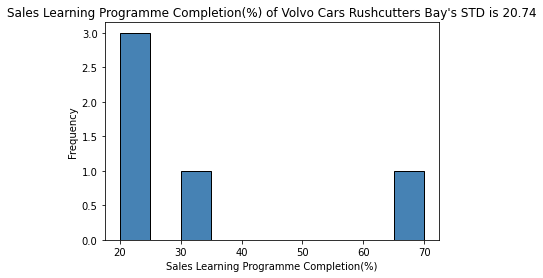

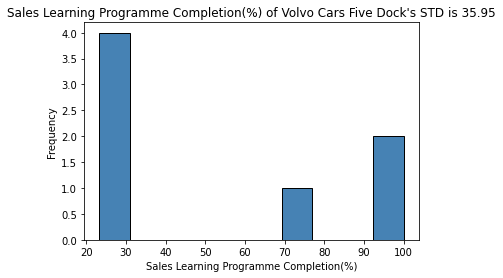

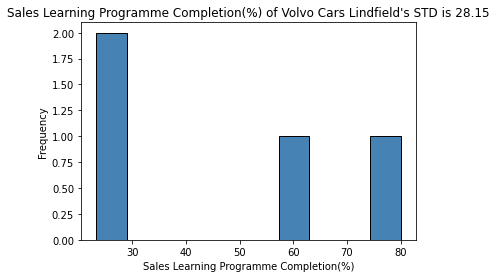

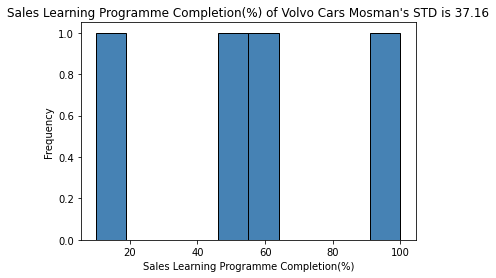

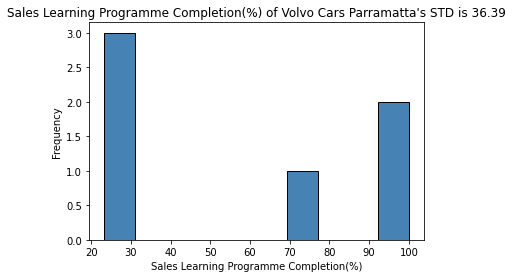

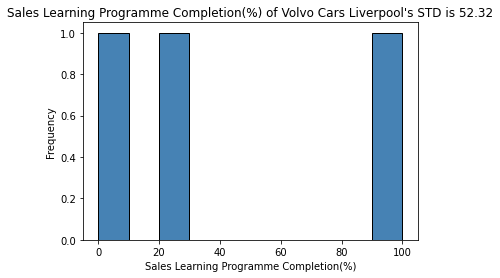

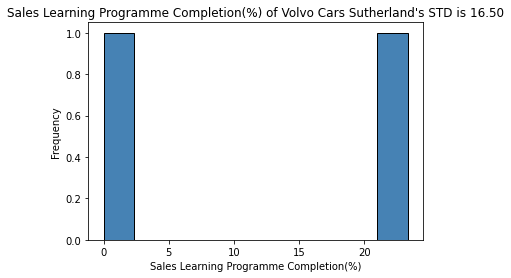

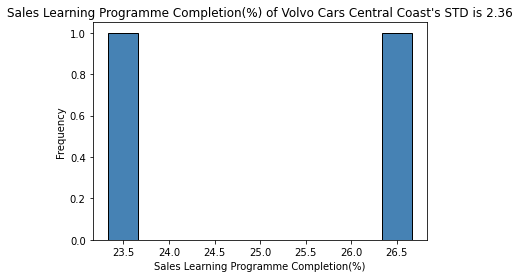

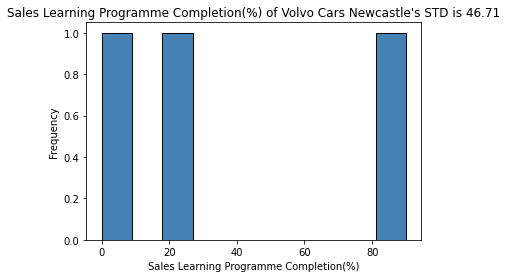

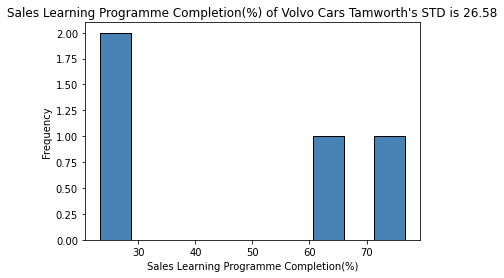

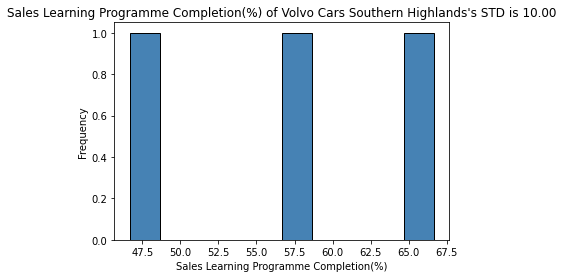

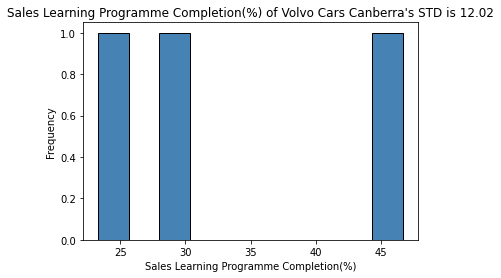

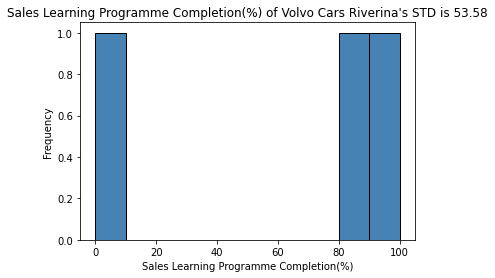

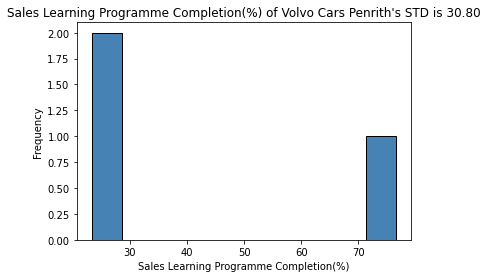

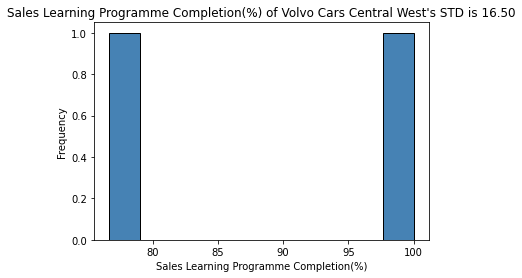

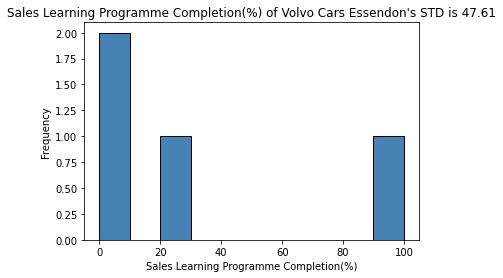

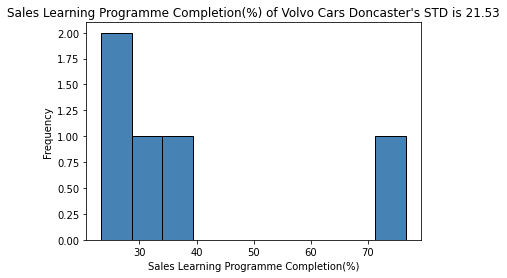

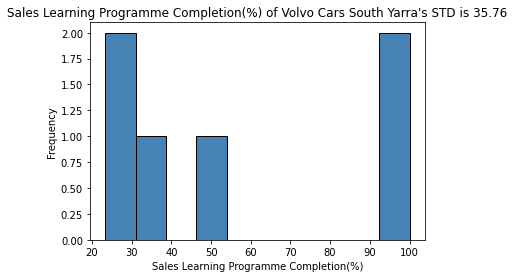

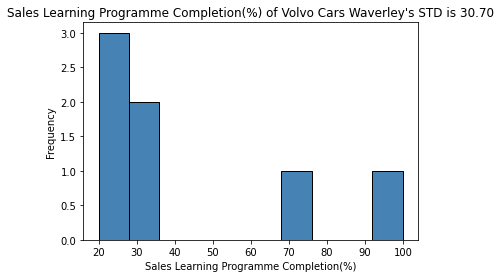

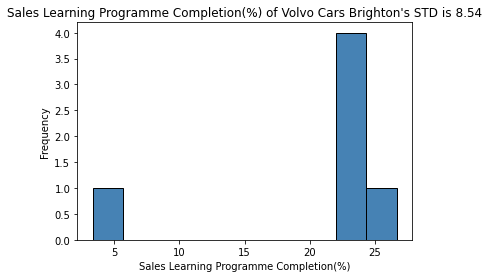

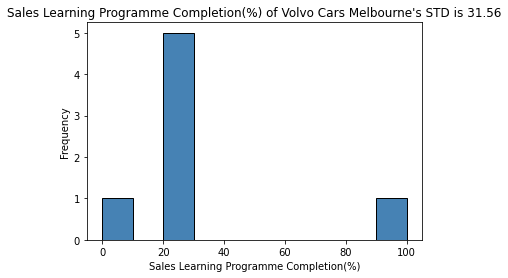

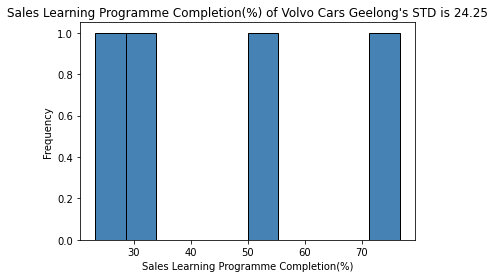

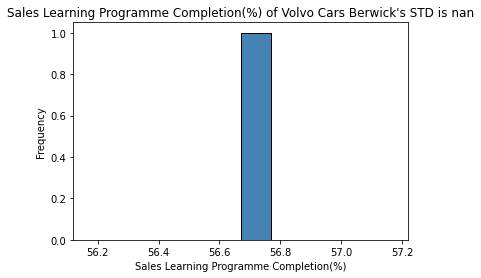

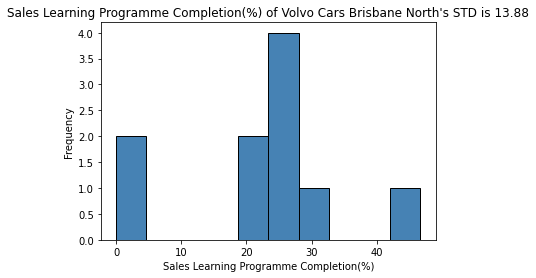

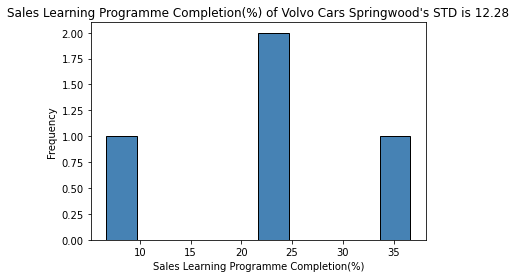

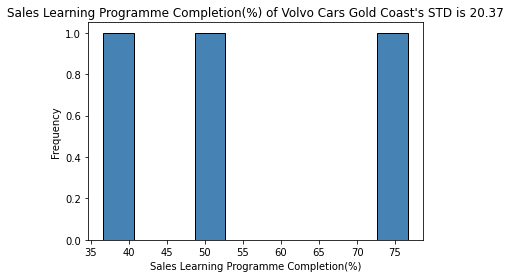

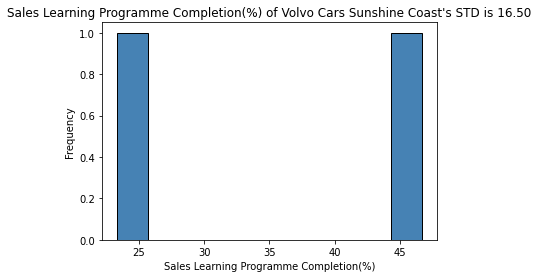

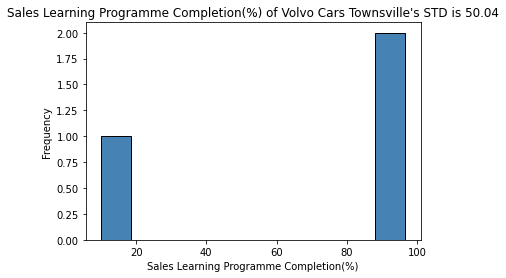

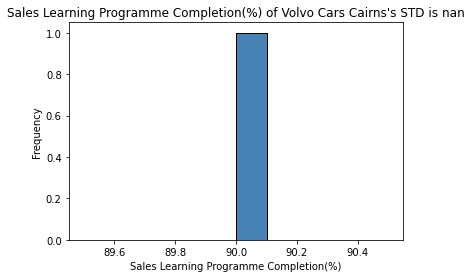

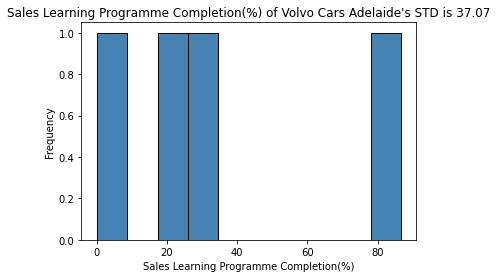

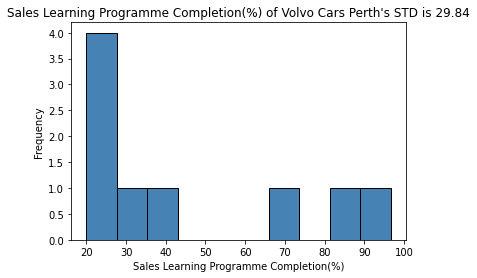

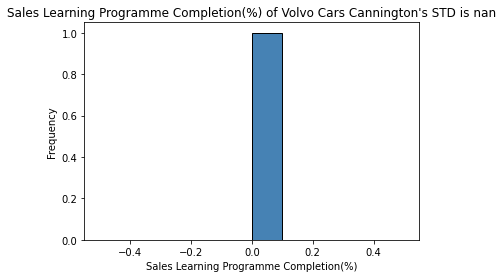

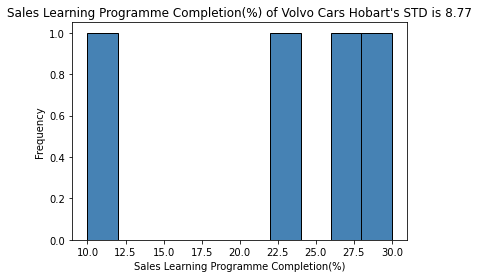

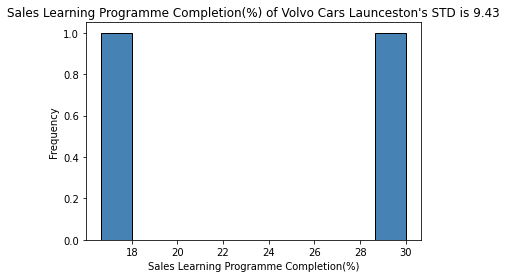

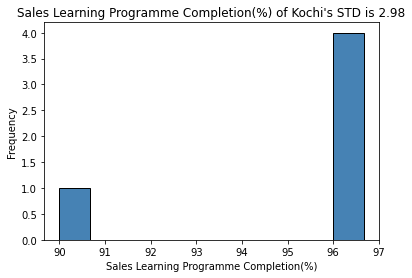

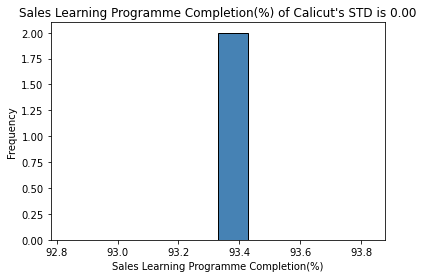

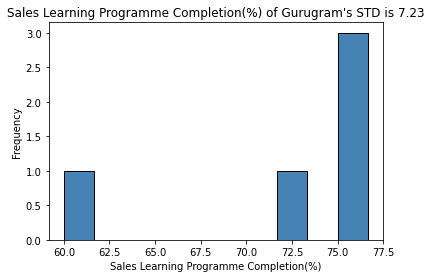

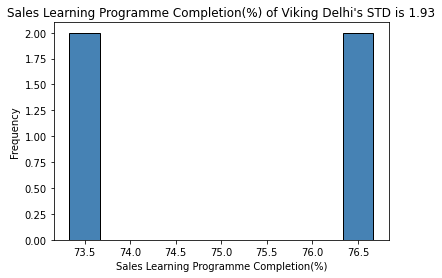

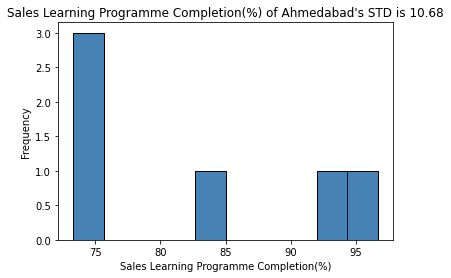

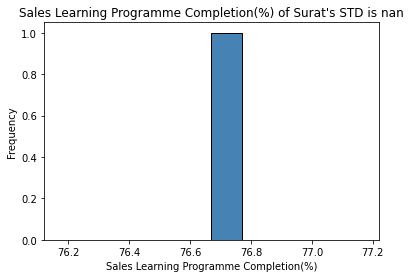

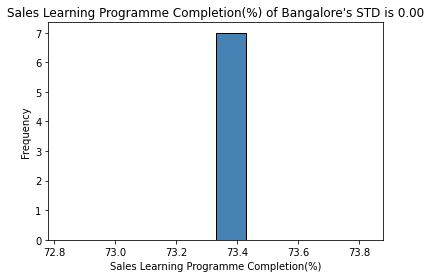

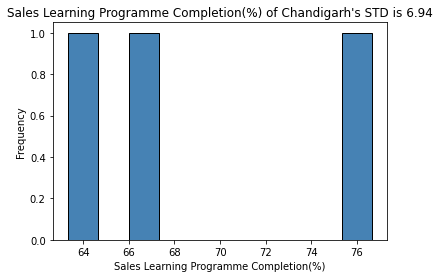

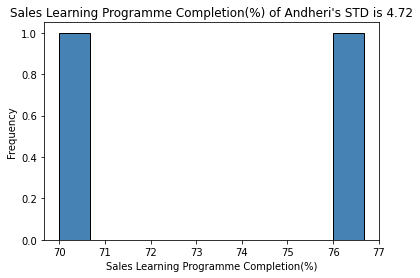

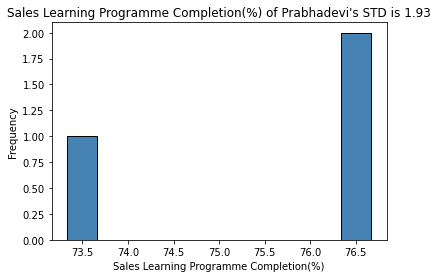

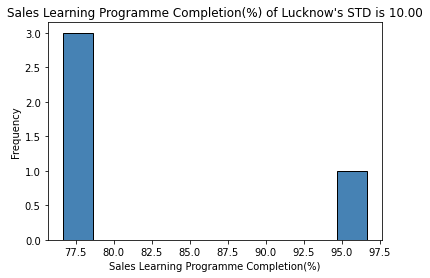

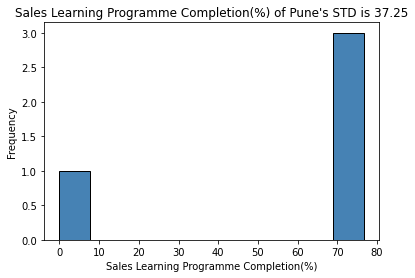

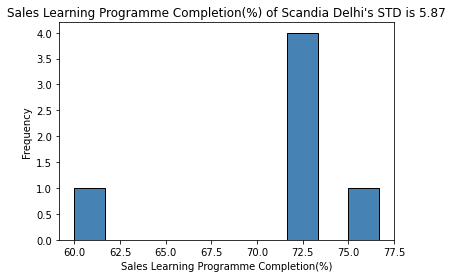

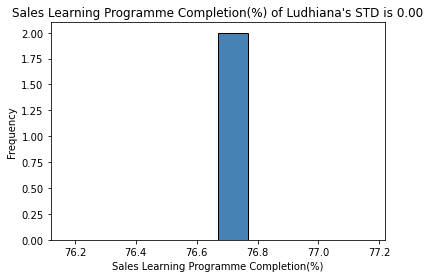

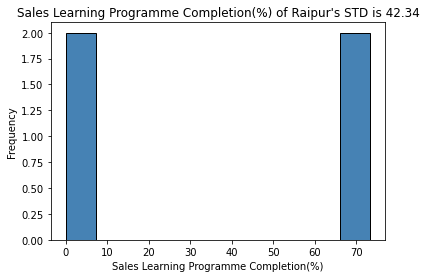

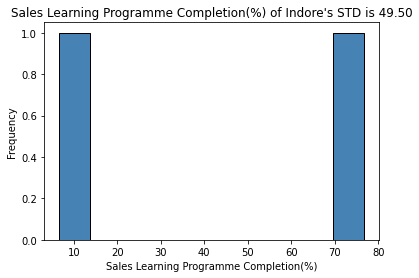

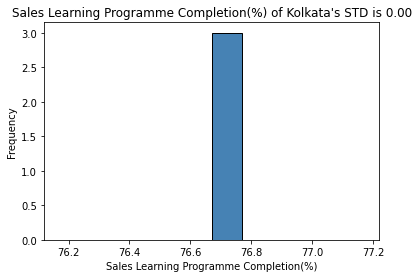

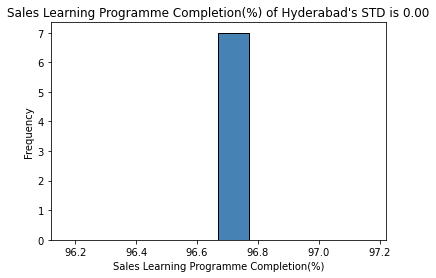

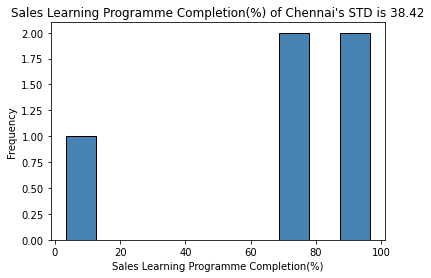

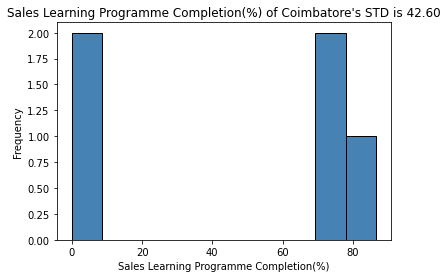

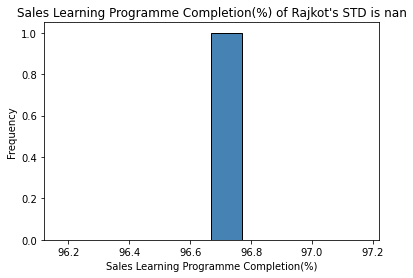

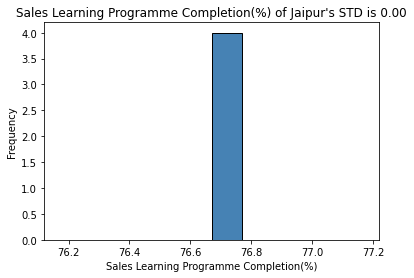

In [37]:
batch_plot_std(complement_df, 'Sales Learning Programme Completion(%)', 'Dealer')

### 按Market维度统计Sales Learning Programme Completion(%)标准差
1. SLPC(%)的数量可以直接参考Course Completion
2. 按照MARKET分组计算SLPC(%)的标准差
3. 按照MARKET排序输出结果SD_SLPC_D_df

In [38]:
# 按市场维度统计课程完成率标准差
SLPC_M_COUNT = complement_df.groupby(['MARKET'])['Sales Learning Programme Completion(%)'].count()
SLPC_M_COUNT.rename('COUNT', inplace=True)
SD_SLPC_M = complement_df.groupby('MARKET')['Sales Learning Programme Completion(%)'].std().round(2)
SD_SLPC_M.rename('SD_SLPC_M', inplace=True)
SD_SLPC_M_df = SD_SLPC_M.reset_index()
SD_SLPC_M_df.sort_values('MARKET', inplace=True)
SD_SLPC_M_df

MARKET  SD_SLPC_M
0  AUSTRALIA      30.23
1      INDIA      23.67

In [39]:
# 按市场维度统计课程完成率标准差绘图
plot(SD_SLPC_M_df, 'SD_SLPC_M', 'STD of Sales Learning Programme Completion(%) by Market', by='MARKET')

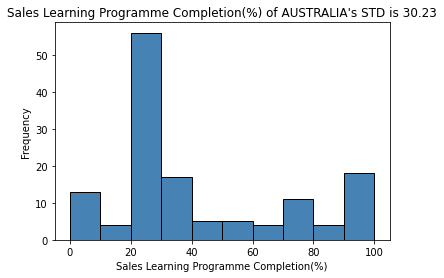

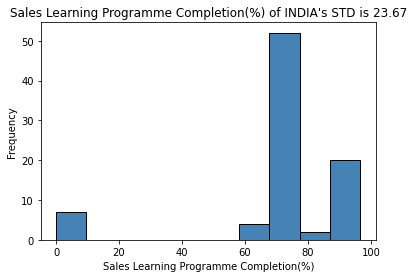

In [40]:
batch_plot_std(complement_df, 'Sales Learning Programme Completion(%)', 'Market')

# 处理Sales Cloud数据

## 处理Oppotunities

### 联表opportunity_df和user_info_df
1. 按opportunity_df.id和opportunity_ownerid_df.id内联得到中间表temp_df
2. 将temp_df中owerid列为空的行的id记录为opportunity_lost_df，即opportunity_ownerid_df相对opportunity_df缺少的id(仅作数据缺失记录)
3. 将opportunity_df.id去除opportunity_lost_df的id记为clean_opportunity_df(仅作数据缺失记录)
4. 将temp_df中owerid列为空的行舍去
5. 按temp_df.ownerid和user_info_df.Id内联得到带有sale信息的opportunity表————opportunity_user_info_df

In [41]:
# 获取opportunity_df的user_info
print(len(opportunity_df))
temp_df = pd.merge(opportunity_df, opportunityid_ownerid_df, left_on='id', right_on='id', how='left')
opportunity_lost_df = temp_df[pd.isnull(temp_df['ownerid'])]['id'].to_frame()
clean_opportunity_df = opportunity_df[~opportunity_df['id'].isin(opportunity_lost_df['id'])]
temp_df.dropna(subset=['ownerid'], inplace=True)
print(len(clean_opportunity_df))
print(len(temp_df))
print(len(pd.merge(user_info_df, temp_df, left_on='Id', right_on='ownerid', how='inner')))
opportunity_user_info_df = pd.merge(user_info_df, temp_df, left_on='Id', right_on='ownerid', how='inner')
opportunity_user_info_df.head()

53612
53590
53590
40205


Id           ContactId          Title  IsActive  \
0  0052w000004ieBAAAY  0032w00000DHcS7AAL  Business Head      True   
1  0052w000004ieBAAAY  0032w00000DHcS7AAL  Business Head      True   
2  0052w000004ieBAAAY  0032w00000DHcS7AAL  Business Head      True   
3  0052w000004ieBAAAY  0032w00000DHcS7AAL  Business Head      True   
4  0052w000004ieBAAAY  0032w00000DHcS7AAL  Business Head      True   

  FederationIdentifier                               Username  \
0             A-GANDHI  anil.gandhi@scandiavolvocars.com.apac   
1             A-GANDHI  anil.gandhi@scandiavolvocars.com.apac   
2             A-GANDHI  anil.gandhi@scandiavolvocars.com.apac   
3             A-GANDHI  anil.gandhi@scandiavolvocars.com.apac   
4             A-GANDHI  anil.gandhi@scandiavolvocars.com.apac   

                              Email VCCMarket__c attributes.type  \
0  anil.gandhi@scandiavolvocars.com           IN            User   
1  anil.gandhi@scandiavolvocars.com           IN            User   
2  anil.gandhi@scandiavolvocars.com           IN            User   
3  anil.gandhi@scandiavolvocars.com           IN            User   
4  anil.gandhi@scandiavolvocars.com           IN            User   

                                      attributes.url                  id  \
0  /services/data/v52.0/sobjects/User/0052w000004...  0062w00000DV9DgAAL   
1  /services/data/v52.0/sobjects/User/0052w000004...  0062w00000CQQi5AAH   
2  /services/data/v52.0/sobjects/User/0052w000004...  0062w00000DurMwAAJ   
3  /services/data/v52.0/sobjects/User/0052w000004...  0062w00000COdmjAAD   
4  /services/data/v52.0/sobjects/User/0052w000004...  0062w00000DWBwEAAX   

  partnerid__c        name__c  dedealergroupcode dealergroupname  \
0      6IN6057  Scandia Volvo                NaN             NaN   
1      6IN6057  Scandia Volvo                NaN             NaN   
2      6IN6057  Scandia Volvo                NaN             NaN   
3      6IN6057  Scandia Volvo                NaN             NaN   
4      6IN6057  Scandia Volvo                NaN             NaN   

                    createddate      leadtoopportunitytime__c  \
0  2022-07-18T12:12:49.000+0000  2022-07-18T12:14:55.000+0000   
1  2022-02-18T08:45:55.000+0000  2022-02-18T09:04:13.000+0000   
2  2022-07-07T14:29:32.000+0000  2022-07-07T14:30:18.000+0000   
3  2022-01-24T11:51:08.000+0000  2022-01-24T11:56:00.000+0000   
4  2022-04-19T05:01:19.000+0000  2022-04-19T05:06:07.000+0000   

   leadtoopportunityduration__c vccmarket__c             ownerid  
0                           0.0           IN  0052w000004ieBAAAY  
1                           0.0           IN  0052w000004ieBAAAY  
2                           0.0           IN  0052w000004ieBAAAY  
3                           0.0           IN  0052w000004ieBAAAY  
4                           0.0           IN  0052w000004ieBAAAY

In [42]:
opportunity_user_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40205 entries, 0 to 40204
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            40205 non-null  object 
 1   ContactId                     40205 non-null  object 
 2   Title                         26509 non-null  object 
 3   IsActive                      40205 non-null  bool   
 4   FederationIdentifier          39007 non-null  object 
 5   Username                      40205 non-null  object 
 6   Email                         40205 non-null  object 
 7   VCCMarket__c                  40205 non-null  object 
 8   attributes.type               40205 non-null  object 
 9   attributes.url                40205 non-null  object 
 10  id                            40205 non-null  object 
 11  partnerid__c                  39743 non-null  object 
 12  name__c                       40205 non-null  object 
 13  d

### 清洗opportunity_user_info_df
1. 取opportunity_user_info_df.IsActive状态为True且opportunity_user_info_df.FederationIdentifier为非空的行记为clean_opportunity_user_info_df
2. 按clean_opportunity_user_info_df.FederationIdentifier和completion_df.CDSID内联得到带有START DATE信息的表记为OP_UI_SD_df
3. 取OP_UI_SD_df中leadtoopportunitytime__c晚于开始培训日期一天后的记录作为opportunity的有效记录

In [43]:
clean_opportunity_user_info_df = opportunity_user_info_df[(opportunity_user_info_df['IsActive'] == True) & (
    ~pd.isna(opportunity_user_info_df['FederationIdentifier']))]

OP_UI_SD_df = clean_opportunity_user_info_df.merge(
    complement_df, left_on='FederationIdentifier', right_on='CDSID', how="inner")
OP_UI_SD_df['leadtoopportunitytime__c'] = pd.to_datetime(OP_UI_SD_df['leadtoopportunitytime__c'])
OP_UI_SD_df['leadtoopportunitytime__c'] = OP_UI_SD_df['leadtoopportunitytime__c'].dt.tz_localize(None)
OP_UI_SD_df = OP_UI_SD_df[(OP_UI_SD_df['leadtoopportunitytime__c'] - OP_UI_SD_df['START DATE']).dt.days > 0]
OP_UI_SD_df

Id           ContactId                 Title  IsActive  \
0      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
1      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
2      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
3      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
4      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
...                   ...                 ...                   ...       ...   
31194  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
31195  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
31196  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
31197  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
31198  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   

      FederationIdentifier                                     Username  \
0                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
1                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
2                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
3                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
4                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
...                    ...                                          ...   
31194              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
31195              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
31196              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
31197              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
31198              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   

                                        Email VCCMarket__c attributes.type  \
0      kailash.kharbanda@scandiavolvocars.com           IN            User   
1      kailash.kharbanda@scandiavolvocars.com           IN            User   
2      kailash.kharbanda@scandiavolvocars.com           IN            User   
3      kailash.kharbanda@scandiavolvocars.com           IN            User   
4      kailash.kharbanda@scandiavolvocars.com           IN            User   
...                                       ...          ...             ...   
31194    steven.wong@volvocarsbrighton.com.au           AU            User   
31195    steven.wong@volvocarsbrighton.com.au           AU            User   
31196    steven.wong@volvocarsbrighton.com.au           AU            User   
31197    steven.wong@volvocarsbrighton.com.au           AU            User   
31198    steven.wong@volvocarsbrighton.com.au           AU            User   

                                          attributes.url  ... vccmarket__c  \
0      /services/data/v52.0/sobjects/User/0052w000004...  ...           IN   
1      /services/data/v52.0/sobjects/User/0052w000004...  ...           IN   
2      /services/data/v52.0/sobjects/User/0052w000004...  ...           IN   
3      /services/data/v52.0/sobjects/User/0052w000004...  ...           IN   
4      /services/data/v52.0/sobjects/User/0052w000004...  ...           IN   
...                                                  ...  ...          ...   
31194  /services/data/v52.0/sobjects/User/0052w000008...  ...           AU   
31195  /services/data/v52.0/sobjects/User/0052w000008...  ...           AU   
31196  /services/data/v52.0/sobjects/User/0052w000008...  ...           AU   
31197  /services/data/v52.0/sobjects/User/0052w000008...  ...           AU   
31198  /services/data/v52.0/sobjects/User/0052w000008...  ...           AU   

                  ownerid     MARKET  DEALER CODE               DEALER  \
0      0052w000004ieGpAAI      INDIA      6IN6057        Scandia Delhi   
1      0052w000004ieGpAAI      INDIA      6IN6057        Scandia Delhi   
2      0052w000004ieGpAAI      INDIA      6IN6057    

### 按Sale维度统计Opportunities数量
1. 按照vccmarket__c, partnerid__c, name__c, FederationIdentifier分组统计每个Sale的Opportunity数量(记为Opportunities)、有效订单最小时间(记为Min Opportunity Time)、培训开始日期(记为START DATE)
2. 按照FederationIdentifier排序输出结果OP_SALE_COUNT_df

In [44]:
OP_SALE_COUNT_df = OP_UI_SD_df.groupby(['vccmarket__c', 'partnerid__c', 'name__c', 'FederationIdentifier']).agg(
    {'id': 'count', 'leadtoopportunitytime__c': 'min', 'START DATE': 'min'}).reset_index()
OP_SALE_COUNT_df.rename(columns={'vccmarket__c': 'MARKET', 'partnerid__c': 'DEALER CODE',
                     'name__c': 'DEALER', 'id': 'Opportunities', 'leadtoopportunitytime__c': 'Min Opportunity Time'}, inplace=True)
OP_SALE_COUNT_df.sort_values(by='FederationIdentifier', inplace=True)
OP_SALE_COUNT_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
96     IN     6IN6060               Central Volvo             A-ARORA2   
51     IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
32     AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
4      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
80     IN     6IN6054                 Speed Volvo             A-KAPOOR   
..    ...         ...                         ...                  ...   
79     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
71     IN     6IN6045              Martial Motors                 V-MP   
36     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
28     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
72     IN     6IN6045              Martial Motors                  Y-A   

    Opportunities Min Opportunity Time START DATE  
96            211  2020-10-17 00:00:00 2019-08-06  
51             99  2022-01-25 09:18:41 2022-01-18  
32            136  2021-08-26 23:15:24 2021-08-25  
4             379  2021-03-28 00:00:00 2020-03-12  
80            109  2020-10-25 00:00:00 2019-06-20  
..            ...                  ...        ...  
79            323  2021-03-13 11:30:40 2021-03-11  
71            176  2022-01-31 06:37:31 2022-01-19  
36            623  2021-02-01 06:34:03 2020-03-11  
28            207  2021-12-22 23:29:34 2021-12-21  
72            216  2022-01-24 07:06:46 2022-01-22  

[114 rows x 7 columns]

### 按Dealer维度统计Opportunities标准差
1. 按照MARKET, DEALER CODE, DEALER分组计算Opportunities的标准差
2. 按照DEALER排序输出结果SD_OP_D_df

In [45]:
SD_OP_D = OP_SALE_COUNT_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Opportunities'].std().round(2)
SD_OP_D.rename('SD_OP_D', inplace=True)
SD_OP_D_df = SD_OP_D.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_OP_D_df.sort_values('DEALER', inplace=True)
SD_OP_D_df

MARKET DEALER CODE                         DEALER  SD_OP_D
26     IN     6IN6044            Autobots, Ahmedabad    51.41
27     IN    6IN60441                Autobots, Surat      NaN
37     IN     6IN6060                  Central Volvo      NaN
33     IN     6IN6056                     Flyga Auto    17.68
30     IN     6IN6049           KIFS Motors, Andheri   107.48
31     IN   6IN6049S2        KIFS Motors, Prabhadevi    94.05
36     IN     6IN6059     KNS Vinayak Auto Pvt. Ltd.    38.18
23     IN    6IN60381          Kerala Volvo, Calicut      NaN
22     IN     6IN6038            Kerala Volvo, Kochi    88.77
29     IN     6IN6048       Krishna Auto, Chandigarh    24.66
35     IN     6IN6058         Krishna Auto, Ludhiana    41.01
39     IN     6IN6071                  Krishna Volvo   143.21
28     IN     6IN6045                 Martial Motors   144.43
42     IN     6IN6075                Rajasthan Volvo      NaN
38     IN     6IN6061                      SPL Volvo   113.16
34     IN     6IN6057                  Scandia Volvo   129.96
32     IN     6IN6054                    Speed Volvo    24.64
24     IN     6IN6043     Swede Auto Private Limited    43.60
25     IN    6IN60431                  Viking Motors    55.52
14     AU     6AU3187            Volvo Cars Brighton      NaN
17     AU     6AU4008      Volvo Cars Brisbane North   475.26
9      AU     6AU2605            Volvo Cars Canberra   275.77
6      AU     6AU2251       Volvo Cars Central Coast      NaN
11     AU     6AU3107           Volvo Cars Doncaster    18.04
1      AU     6AU2040           Volvo Cars Five Dock     0.71
16     AU     6AU3222             Volvo Cars Geelong      NaN
18     AU     6AU4213          Volvo Cars Gold Coast      NaN
20     AU     6AU7004              Volvo Cars Hobart      NaN
21     AU     6AU7254          Volvo Cars Launceston    49.50
2      AU     6AU2068           Volvo Cars Lindfield    31.11
5      AU     6AU2173           Volvo Cars Liverpool      NaN
15     AU     6AU3206           Volvo Cars Melbourne    65.65
3      AU     6AU2088              Volvo Cars Mosman      NaN
4      AU     6AU2156          Volvo Cars Parramatta   193.04
10     AU     6AU2754             Volvo Cars Penrith    69.51
19     AU     6AU6017               Volvo Cars Perth   214.92
0      AU     6AU2014     Volvo Cars Rushcutters Bay   284.26
12     AU     6AU3112         Volvo Cars South Yarra   161.00
8      AU     6AU2581  Volvo Cars Southern Highlands     7.07
7      AU     6AU2342            Volvo Cars Tamworth      NaN
13     AU     6AU3170            Volvo Cars Waverley    72.12
41     IN     6IN6073   Volvo Tamil Nadu(Coimbatore)    70.71
40     IN     6IN6072      Volvo Tamil nadu(Chennai)   184.50

In [46]:
# 按经销商维度统计潜在客户数量标准差绘图
df = SD_OP_D_df
name = 'SD_OP_D'
title = 'STD of Opportunity by Dealer'
by = 'DEALER'
plot(df, name, title, by)

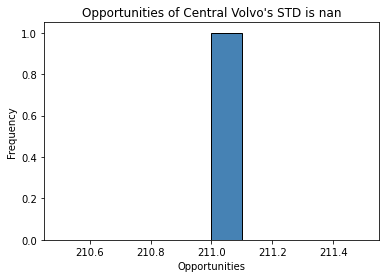

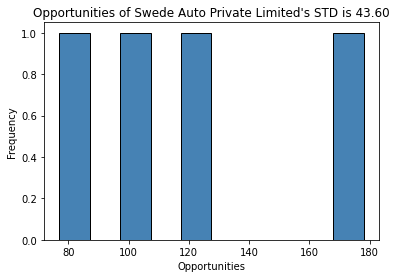

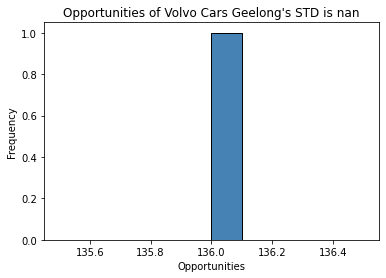

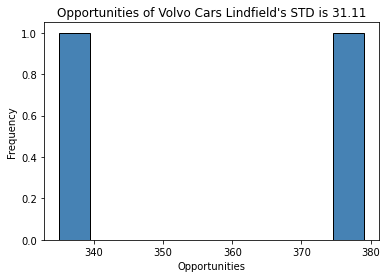

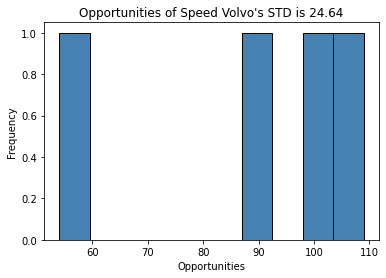

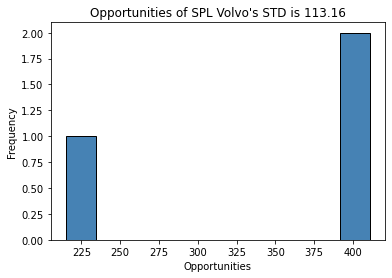

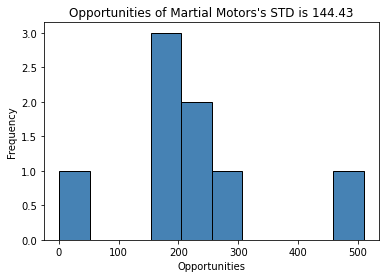

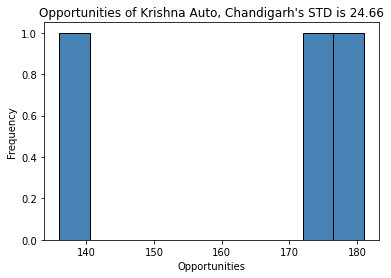

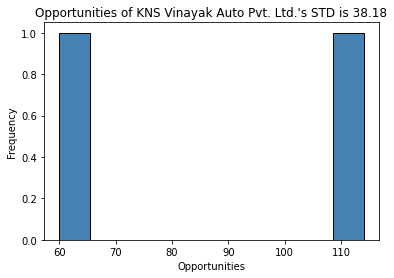

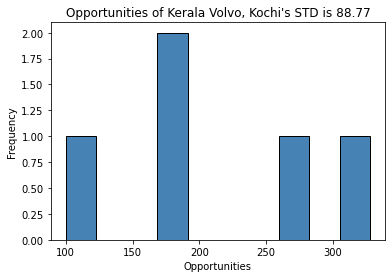

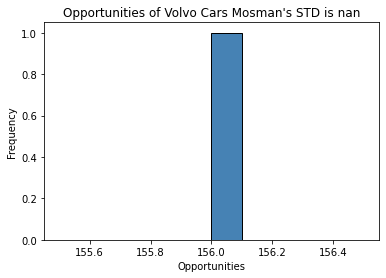

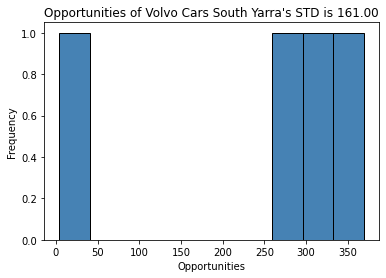

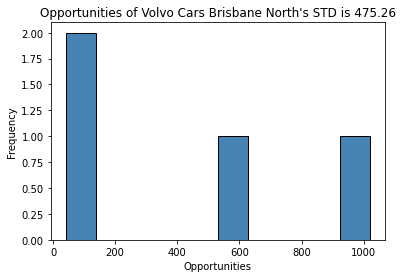

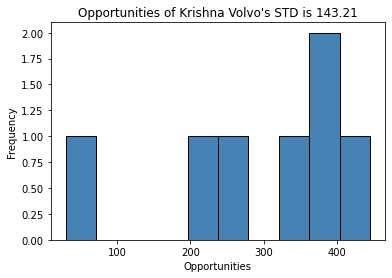

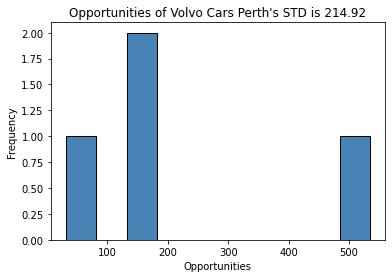

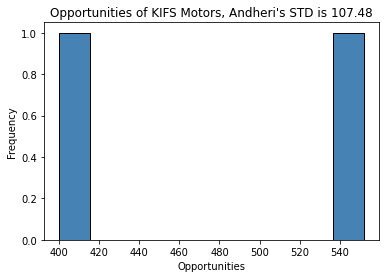

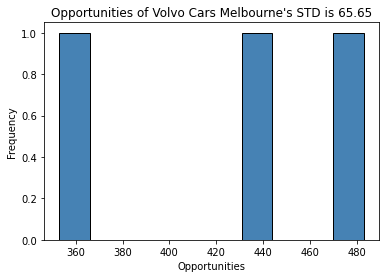

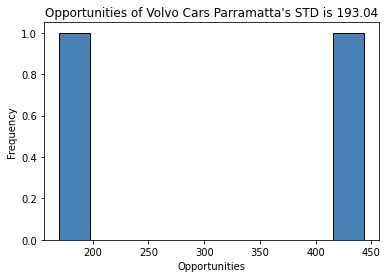

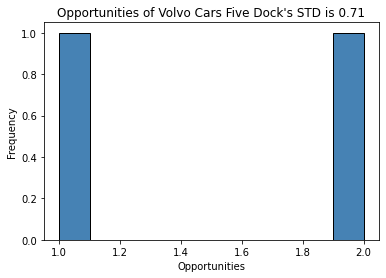

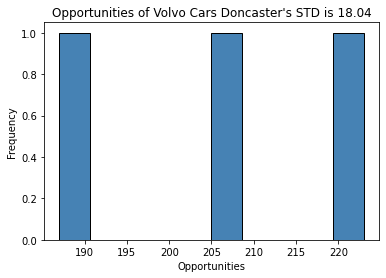

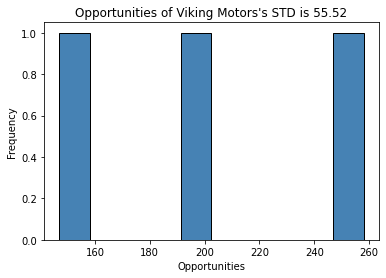

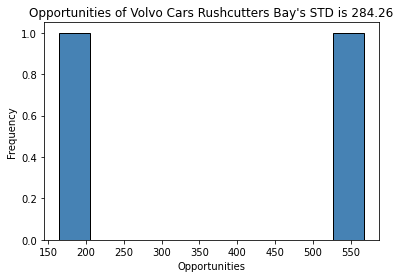

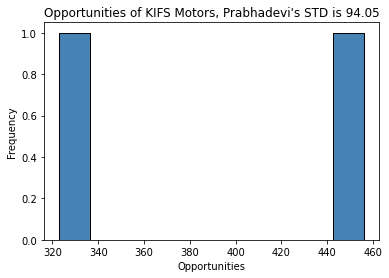

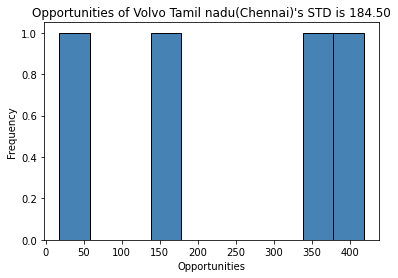

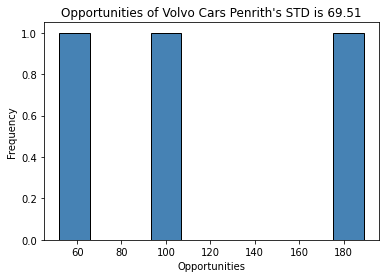

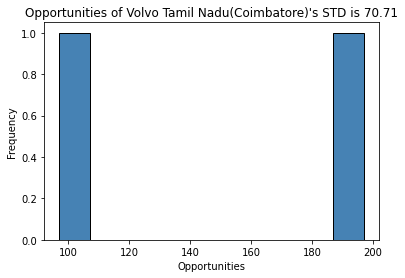

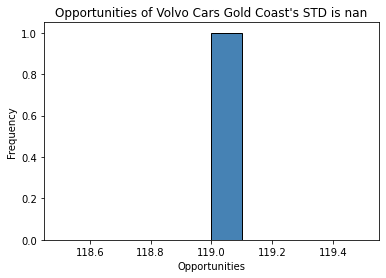

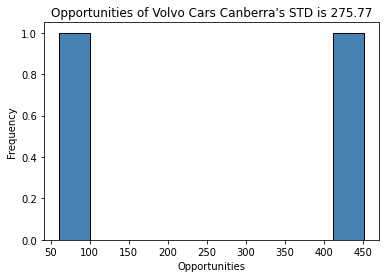

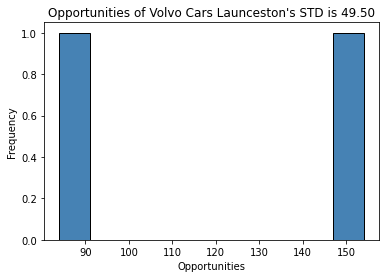

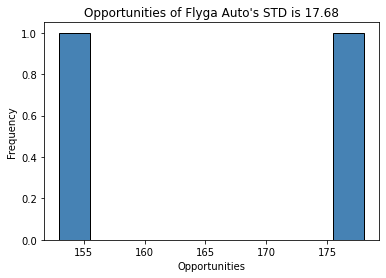

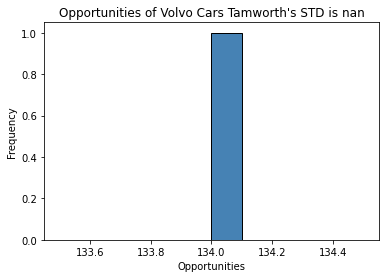

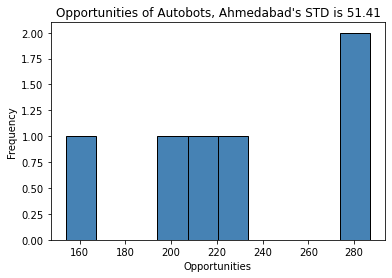

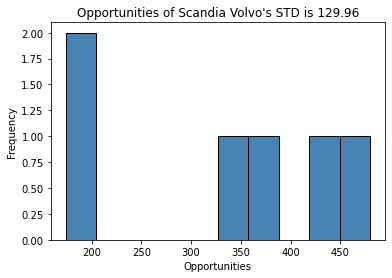

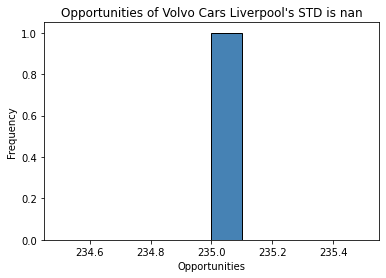

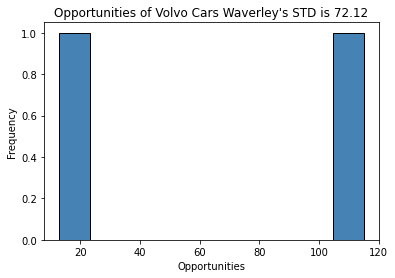

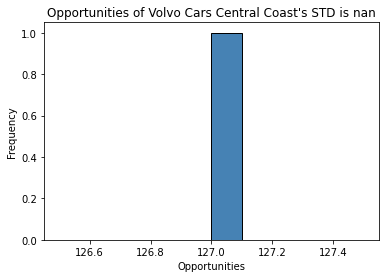

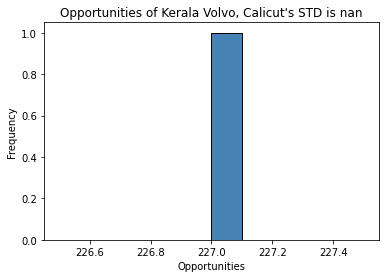

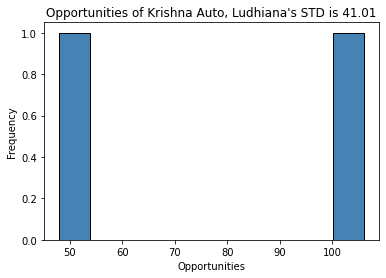

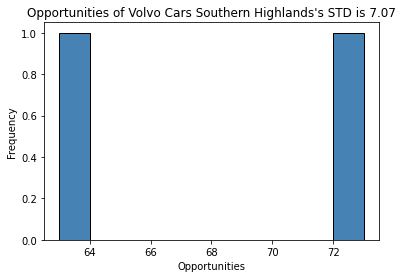

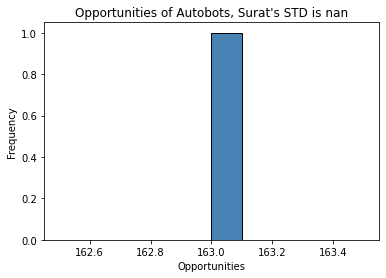

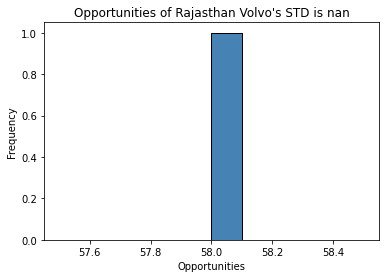

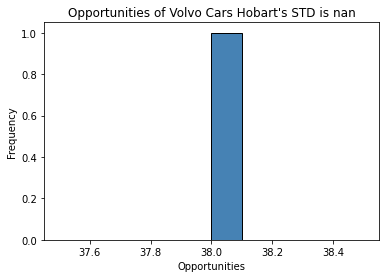

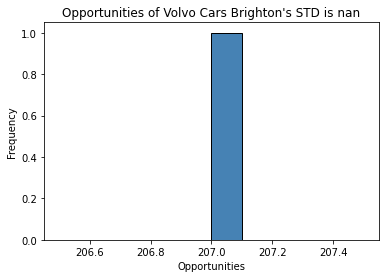

In [47]:
batch_plot_std(OP_SALE_COUNT_df, 'Opportunities', 'Dealer')

### 按Market维度统计Opportunities标准差
1. 按照MARKET分组计算Opportunities的标准差
2. 按照MARKET排序输出结果SD_OP_M_df

In [48]:
SD_OP_M = OP_SALE_COUNT_df.groupby(['MARKET'])['Opportunities'].std().round(2)
SD_OP_M.rename('SD_OP_M', inplace=True)
SD_OP_M_df = SD_OP_M.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_OP_M_df.sort_values('MARKET', inplace=True)
SD_OP_M_df

MARKET  SD_OP_M
0     AU   204.50
1     IN   130.73

In [49]:
# 按市场维度统计潜在客户数量标准差绘图
df = SD_OP_M_df
name = 'SD_OP_M'
title = 'STD of Opportunity by Market'
by = 'MARKET'
plot(df, name, title, by)

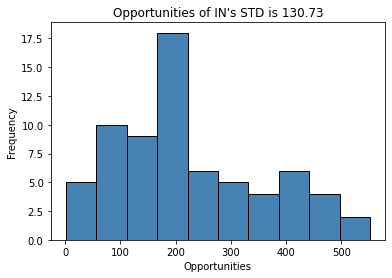

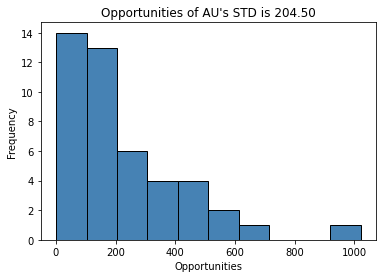

In [50]:
batch_plot_std(OP_SALE_COUNT_df, 'Opportunities', 'Market')

### 计算SD_CR_D和SD_OP_D的相关性
1. 按SD_CR_D_df.DEALER CODE和SD_OP_D_df.DEALER CODE内联得到CR_OP_D_df
2. 去除含有任意空值的行
3. 输出结果CR_OP_D_df
4. plot_r函数输出相关性图片并保存

In [51]:
CR_OP_D_df = pd.merge(SD_CR_D_df, SD_OP_D_df, left_on=['DEALER CODE'], right_on=['DEALER CODE'], how='inner')
CR_OP_D_df.dropna(how='any', inplace=True)
CR_OP_D_df.rename(columns={'MARKET_x':'MARKET', 'DEALER_x':'DEALER'}, inplace=True)
CR_OP_D_df

MARKET DEALER CODE                DEALER  SD_CR_D MARKET_y  \
0       INDIA     6IN6044             Ahmedabad     0.23       IN   
1       INDIA     6IN6045             Bangalore     0.66       IN   
3       INDIA     6IN6048            Chandigarh     0.19       IN   
4       INDIA     6IN6072               Chennai     0.00       IN   
5       INDIA     6IN6073            Coimbatore     0.00       IN   
6       INDIA     6IN6043              Gurugram     0.50       IN   
7       INDIA     6IN6071             Hyderabad     0.46       IN   
10      INDIA     6IN6038                 Kochi     0.51       IN   
12      INDIA     6IN6054               Lucknow     1.22       IN   
13      INDIA     6IN6058              Ludhiana     0.00       IN   
14      INDIA   6IN6049S2            Prabhadevi     0.71       IN   
16      INDIA     6IN6057         Scandia Delhi     0.00       IN   
18      INDIA    6IN60431          Viking Delhi     0.00       IN   
20  AUSTRALIA     6AU3107  Volvo Cars Doncaster     1.41       AU   
21  AUSTRALIA     6AU2040  Volvo Cars Five Dock     2.34       AU   
28  AUSTRALIA     6AU3170   Volvo Cars Waverley     2.71       AU   

                        DEALER_y  SD_OP_D  
0            Autobots, Ahmedabad    51.41  
1                 Martial Motors   144.43  
3       Krishna Auto, Chandigarh    24.66  
4      Volvo Tamil nadu(Chennai)   184.50  
5   Volvo Tamil Nadu(Coimbatore)    70.71  
6     Swede Auto Private Limited    43.60  
7                  Krishna Volvo   143.21  
10           Kerala Volvo, Kochi    88.77  
12                   Speed Volvo    24.64  
13        Krishna Auto, Ludhiana    41.01  
14       KIFS Motors, Prabhadevi    94.05  
16                 Scandia Volvo   129.96  
18                 Viking Motors    55.52  
20          Volvo Cars Doncaster    18.04  
21          Volvo Cars Five Dock     0.71  
28           Volvo Cars Waverley    72.12

In [52]:
def plot_r(df: pd.DataFrame, file_name: str, col_1: str, col_2: str, title: str):
    """绘制相关性图片并保存

    Args:
        df (pd.DataFrame): 输入数据
        file_name (str): 保存文件名
        col_1 (str): 计算相关性列1
        col_2 (str): 计算相关性列2
        title (str): 标题
    """
    fig = go.Figure()
    fig = px.scatter(df,
                     x=col_1,
                     y=col_2,
                     trendline='ols',
                     trendline_scope="overall",
                     trendline_color_override="blue",
                     color='DEALER',)
    results = px.get_trendline_results(fig)

    annotation = {
        'xref': 'paper',
        'yref': 'paper',
        'x': 0.9,
        'y': 0.9,
        'text': 'Regression Function:y=' + str(round(results.px_fit_results.iloc[0].params[1], 2)) + 'x+' + str(round(results.px_fit_results.iloc[0].params[0], 2)) + '\nR-squared: ' + str(round(results.px_fit_results.iloc[0].rsquared, 4)),
        'showarrow': False,
        'font': {'size': 10, 'color': 'blue'}
    }
    fig.add_annotation(annotation)

    annotation = {
        'xref': 'paper',
        'yref': 'paper',
        'x': 0.9,
        'y': 0.8,
        'text': 'Pearson Correlation Coefficient: ' + str(round(df[[col_1, col_2]].corr().iloc[0, 1], 4)),
        'showarrow': False,
        'font': {'size': 10, 'color': 'blue'}
    }
    fig.add_annotation(annotation)
    fig.update_layout(title=title,
                      title_font_size=20,
                      template='plotly_white')
    fig.write_image(rf'figure/correlation/{file_name}.svg')
    fig.write_image(rf'figure/correlation/{file_name}.png', width=1000, height=500, scale=3)
    fig.show()


In [53]:
plot_r(CR_OP_D_df, 'CR_OP_D', 'SD_CR_D', 'SD_OP_D', 'STD of Course Rating & Opportunity by Dealer')

c:\Users\Riddance\miniconda3\envs\mml\lib\site-packages\scipy\__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1



### 计算Opportunities和Course Rating的相关性
1. 按OP_SALE_COUNT_df.FederationIdentifier和course_rating_df.USER CODE内联得到CR_OP_df
2. 输出结果CR_OP_df
3. plot_r函数输出相关性图片并保存

In [54]:
CR_OP_df = OP_SALE_COUNT_df.merge(course_rating_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CR_OP_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CR_OP_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6054                 Speed Volvo             A-KAPOOR   
2      IN     6IN6045              Martial Motors             A-SHARM3   
3      IN     6IN6048    Krishna Auto, Chandigarh             A-SHARM3   
4      IN     6IN6071               Krishna Volvo             C-KUMAR1   
5      IN     6IN6071               Krishna Volvo               E-PAUL   
6      IN     6IN6043  Swede Auto Private Limited             G-CHAWLA   
7      IN     6IN6072   Volvo Tamil nadu(Chennai)             G-RAGHUN   
8      IN     6IN6038         Kerala Volvo, Kochi             J-BRITTO   
9      IN     6IN6057               Scandia Volvo             M-KAUSHI   
10     IN     6IN6072   Volvo Tamil nadu(Chennai)                  M-S   
11     IN     6IN6058      Krishna Auto, Ludhiana              N-VERMA   
12     IN     6IN6043  Swede Auto Private Limited             P-CHOUDH   
13     IN     6IN6038         Kerala Volvo, Kochi             P-SREEDH   
14     IN     6IN6038         Kerala Volvo, Kochi             R-ABRAHA   
15     IN     6IN6071               Krishna Volvo                R-ALI   
16     AU     6AU3170         Volvo Cars Waverley             S-AITKEN   
17     IN     6IN6075             Rajasthan Volvo             S-BIDSER   
18     IN     6IN6061                   SPL Volvo               S-DAS4   
19     IN    6IN60431               Viking Motors             S-GUPTA6   
20     IN     6IN6071               Krishna Volvo             S-REDDYP   
21     IN     6IN6071               Krishna Volvo             S-RIYAZA   
22     IN     6IN6057               Scandia Volvo             S-SING11   
23     IN     6IN6071               Krishna Volvo             S-SINGH2   
24     IN     6IN6054                 Speed Volvo             T-BHATIA   
25     IN     6IN6038         Kerala Volvo, Kochi                  U-R   
26     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
27     IN     6IN6045              Martial Motors                 V-MP   

    Opportunities Min Opportunity Time START DATE   MARKET_y   REGION  \
0             211  2020-10-17 00:00:00 2019-08-06      INDIA  Central   
1             109  2020-10-25 00:00:00 2019-06-20      INDIA    North   
2               1  2020-11-26 00:00:00 2019-07-16      INDIA    North   
3             176  2020-11-07 00:00:00 2019-07-16      INDIA    North   
4             253  2021-08-30 08:07:05 2021-08-28      INDIA    South   
5             350  2020-10-25 00:00:00 2019-06-20      INDIA    South   
6             178  2020-10-24 00:00:00 2019-05-22      INDIA    North   
7             351  2021-05-24 00:00:00 2021-05-21      INDIA    South   
8             328  2020-08-08 00:00:00 2019-08-01      INDIA    South   
9             480  2020-07-28 00:00:00 2019-08-02      INDIA    North   
10            145  2022-01-30 11:42:52 2022-01-26      INDIA    South   
11             48  2022-01-29 11:41:26 2022-01-19      INDIA    North   
12            127  2020-10-21 00:00:00 2019-08-12      INDIA    North   
13            271  2020-07-28 00:00:00 2019-10-19      INDIA    South   
14            172  2021-07-29 07:22:47 2021-07-22      INDIA    South   
15            391  2020-10-15 00:00:00 2019-06-20      INDIA    South   
16            115  2021-09-11 05:59:24 2021-07-22  AUSTRALIA    South   
17             58  2022-01-24 08:32:16 2022-01-19      INDIA     West   
18            411  2020-10-17 00:00:00 2019-08-02      INDIA     East   
19            258  2020-10-19 00:00:00 2020-02-11      INDIA    North   
20            398  2021-07-08 09:36:23 2021-07-06      INDIA    South   
21            219  2021-08-30 13:37:38 2021-08-28      INDIA    South   
22            444  2020-07-25 00:00:00 2019-05-17      INDIA    North   
23            445  2020-10-15 00:00:00 2019-06-20      INDIA    South   
24            103  2022-01-21 0

In [55]:
CR_OP_df.to_csv(r'Correlation\CR_OP_df.csv')

In [56]:
plot_r(CR_OP_df, 'Course Rating vs Opportunities', 'Course Rating', 'Opportunities', 'Course Rating vs Opportunities')

### 计算SD_CC_D和SD_OP_D的相关性
1. 按SD_CC_D_df.DEALER CODE和SD_OP_D_df.DEALER CODE内联得到CR_OP_D_df
2. 去除含有任意空值的行
3. 输出结果CC_OP_D_df
4. plot_r函数输出相关性图片并保存

In [57]:
CC_OP_D_df = pd.merge(SD_CC_D_df, SD_OP_D_df, left_on=['DEALER CODE'], right_on=['DEALER CODE'], how='inner')
CC_OP_D_df.dropna(how='any', inplace=True)
CC_OP_D_df.rename(columns={'MARKET_x': 'MARKET', 'DEALER_x':'DEALER'}, inplace=True)
CC_OP_D_df

MARKET DEALER CODE                      DEALER  SD_CC_D MARKET_y  \
0       INDIA     6IN6044                   Ahmedabad     3.20       IN   
1       INDIA     6IN6049                     Andheri     1.41       IN   
2       INDIA     6IN6045                   Bangalore     0.00       IN   
4       INDIA     6IN6048                  Chandigarh     2.08       IN   
5       INDIA     6IN6072                     Chennai    11.52       IN   
6       INDIA     6IN6073                  Coimbatore    12.78       IN   
7       INDIA     6IN6043                    Gurugram     2.17       IN   
8       INDIA     6IN6071                   Hyderabad     0.00       IN   
11      INDIA     6IN6038                       Kochi     0.89       IN   
12      INDIA     6IN6061                     Kolkata     0.00       IN   
13      INDIA     6IN6054                     Lucknow     3.00       IN   
14      INDIA     6IN6058                    Ludhiana     0.00       IN   
15      INDIA   6IN6049S2                  Prabhadevi     0.58       IN   
16      INDIA     6IN6056                        Pune    11.18       IN   
17      INDIA     6IN6059                      Raipur    12.70       IN   
18      INDIA     6IN6057               Scandia Delhi     1.76       IN   
20      INDIA    6IN60431                Viking Delhi     0.58       IN   
22  AUSTRALIA     6AU4008   Volvo Cars Brisbane North     4.16       AU   
23  AUSTRALIA     6AU2605         Volvo Cars Canberra     3.61       AU   
25  AUSTRALIA     6AU3107        Volvo Cars Doncaster     6.46       AU   
26  AUSTRALIA     6AU2040        Volvo Cars Five Dock    10.78       AU   
30  AUSTRALIA     6AU7254       Volvo Cars Launceston     2.83       AU   
31  AUSTRALIA     6AU2068        Volvo Cars Lindfield     8.45       AU   
33  AUSTRALIA     6AU3206        Volvo Cars Melbourne     9.47       AU   
35  AUSTRALIA     6AU2156       Volvo Cars Parramatta    10.92       AU   
36  AUSTRALIA     6AU2754          Volvo Cars Penrith     9.24       AU   
37  AUSTRALIA     6AU6017            Volvo Cars Perth     8.95       AU   
38  AUSTRALIA     6AU2014  Volvo Cars Rushcutters Bay     6.22       AU   
39  AUSTRALIA     6AU3112      Volvo Cars South Yarra    10.73       AU   
41  AUSTRALIA     6AU3170         Volvo Cars Waverley     9.21       AU   

                        DEALER_y  SD_OP_D  
0            Autobots, Ahmedabad    51.41  
1           KIFS Motors, Andheri   107.48  
2                 Martial Motors   144.43  
4       Krishna Auto, Chandigarh    24.66  
5      Volvo Tamil nadu(Chennai)   184.50  
6   Volvo Tamil Nadu(Coimbatore)    70.71  
7     Swede Auto Private Limited    43.60  
8                  Krishna Volvo   143.21  
11           Kerala Volvo, Kochi    88.77  
12                     SPL Volvo   113.16  
13                   Speed Volvo    24.64  
14        Krishna Auto, Ludhiana    41.01  
15       KIFS Motors, Prabhadevi    94.05  
16                    Flyga Auto    17.68  
17    KNS Vinayak Auto Pvt. Ltd.    38.18  
18                 Scandia Volvo   129.96  
20                 Viking Motors    55.52  
22     Volvo Cars Brisbane North   475.26  
23           Volvo Cars Canberra   275.77  
25          Volvo Cars Doncaster    18.04  
26          Volvo Cars Five Dock     0.71  
30         Volvo Cars Launceston    49.50  
31          Volvo Cars Lindfield    31.11  
33          Volvo Cars Melbourne    65.65  
35         Volvo Cars Parramatta   193.04  
36            Volvo Cars Penrith    69.51  
37              Volvo Cars Perth   214.92  
38    Volvo Cars Rushcutters Bay   284.26  
39        Volvo Cars South Yarra   161.00  
41           Volvo Cars Waverley    72.12

In [58]:
plot_r(CC_OP_D_df, 'CC_OP_D', 'SD_CC_D', 'SD_OP_D', 'STD of Course Completion & Opportunity by Dealer')

### 计算Opportunities和Course Completion的相关性
1. 按OP_SALE_COUNT_df.FederationIdentifier和complement_df.CDSID内联得到CC_OP_df
2. 输出结果CC_OP_df
3. plot_r函数输出相关性图片并保存

In [59]:
CC_OP_df = pd.merge(OP_SALE_COUNT_df, complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
CC_OP_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CC_OP_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0       IN     6IN6060               Central Volvo             A-ARORA2   
1       IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2       AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3       AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4       IN     6IN6054                 Speed Volvo             A-KAPOOR   
..     ...         ...                         ...                  ...   
109     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
110     IN     6IN6045              Martial Motors                 V-MP   
111     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
112     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
113     IN     6IN6045              Martial Motors                  Y-A   

     Opportunities Min Opportunity Time START DATE_x   MARKET_y DEALER CODE_y  \
0              211  2020-10-17 00:00:00   2019-08-06      INDIA       6IN6060   
1               99  2022-01-25 09:18:41   2022-01-18      INDIA       6IN6043   
2              136  2021-08-26 23:15:24   2021-08-25  AUSTRALIA       6AU3222   
3              379  2021-03-28 00:00:00   2020-03-12  AUSTRALIA       6AU2068   
4              109  2020-10-25 00:00:00   2019-06-20      INDIA       6IN6054   
..             ...                  ...          ...        ...           ...   
109            323  2021-03-13 11:30:40   2021-03-11      INDIA     6IN6049S2   
110            176  2022-01-31 06:37:31   2022-01-19      INDIA       6IN6045   
111            623  2021-02-01 06:34:03   2020-03-11  AUSTRALIA       6AU4008   
112            207  2021-12-22 23:29:34   2021-12-21  AUSTRALIA       6AU3187   
113            216  2022-01-24 07:06:46   2022-01-22      INDIA       6IN6045   

                      DEALER_y     CDSID   ALL  Course Completion  \
0                       Indore  A-ARORA2  30.0               23.0   
1                     Gurugram  A-BISHT1  30.0               23.0   
2           Volvo Cars Geelong  A-BOYLE2  30.0               23.0   
3         Volvo Cars Lindfield  A-FRASER  30.0                7.0   
4                      Lucknow  A-KAPOOR  30.0               23.0   
..                         ...       ...   ...                ...   
109                 Prabhadevi  V-KHATRI  30.0               23.0   
110                  Bangalore      V-MP  30.0               22.0   
111  Volvo Cars Brisbane North    W-BASS  30.0                8.0   
112        Volvo Cars Brighton   W-WONG5  30.0                7.0   
113                  Bangalore       Y-A  30.0               22.0   

    START DATE_y  Sales Learning Programme Completion(%)  
0     2019-08-06                                   76.67  
1     2022-01-18                                   76.67  
2     2021-08-25                                   76.67  
3     2020-03-12                                   23.33  
4     2019-06-20                                   76.67  
..           ...                                     ...  
109   2021-03-11                                   76.67  
110   2022-01-19                                   73.33  
111   2020-03-11                                   26.67  
112   2021-12-21                                   23.33  
113   2022-01-22                                   73.33  

[114 rows x 15 columns]

In [60]:
CC_OP_df.to_csv(r'Correlation\CC_OP_df.csv')

In [61]:
plot_r(CC_OP_df, 'Course Completion vs Opportunities', 'Course Completion', 'Opportunities', 'Course Completion vs Opportunities')

### 计算SD_CPT_D和SD_OP_D的相关性
1. 按SD_CPT_D_df.DEALER CODE和SD_OP_D_df.DEALER CODE内联得到CR_OP_D_df
2. 去除含有任意空值的行
3. 输出结果CPT_OP_D_df
4. plot_r函数输出相关性图片并保存

In [62]:
CPT_OP_D_df = pd.merge(SD_CPT_D_df, SD_OP_D_df, left_on=['DEALER CODE'], right_on=['DEALER CODE'], how='inner')
CPT_OP_D_df.dropna(how='any', inplace=True)
CPT_OP_D_df.rename(columns={'DEALER_x':'DEALER'}, inplace=True)
CPT_OP_D_df

MARKET_x DEALER CODE                      DEALER  SD_CPT_D MARKET_y  \
0       INDIA     6IN6045                   Bangalore      4.16       IN   
3   AUSTRALIA     6AU4008   Volvo Cars Brisbane North     17.46       AU   
4   AUSTRALIA     6AU2605         Volvo Cars Canberra     24.96       AU   
5   AUSTRALIA     6AU3107        Volvo Cars Doncaster     20.20       AU   
6   AUSTRALIA     6AU2040        Volvo Cars Five Dock     10.71       AU   
9   AUSTRALIA     6AU7254       Volvo Cars Launceston     27.17       AU   
10  AUSTRALIA     6AU2068        Volvo Cars Lindfield     14.68       AU   
11  AUSTRALIA     6AU3206        Volvo Cars Melbourne      0.00       AU   
13  AUSTRALIA     6AU2156       Volvo Cars Parramatta      2.38       AU   
15  AUSTRALIA     6AU6017            Volvo Cars Perth      5.89       AU   
16  AUSTRALIA     6AU2014  Volvo Cars Rushcutters Bay     10.19       AU   
17  AUSTRALIA     6AU3112      Volvo Cars South Yarra     25.64       AU   
19  AUSTRALIA     6AU3170         Volvo Cars Waverley     17.45       AU   

                      DEALER_y  SD_OP_D  
0               Martial Motors   144.43  
3    Volvo Cars Brisbane North   475.26  
4          Volvo Cars Canberra   275.77  
5         Volvo Cars Doncaster    18.04  
6         Volvo Cars Five Dock     0.71  
9        Volvo Cars Launceston    49.50  
10        Volvo Cars Lindfield    31.11  
11        Volvo Cars Melbourne    65.65  
13       Volvo Cars Parramatta   193.04  
15            Volvo Cars Perth   214.92  
16  Volvo Cars Rushcutters Bay   284.26  
17      Volvo Cars South Yarra   161.00  
19         Volvo Cars Waverley    72.12

In [63]:
plot_r(CPT_OP_D_df, 'CPT_OP_D', 'SD_CPT_D', 'SD_OP_D', 'STD of Course Post-Test & Opportunity by Dealer')

### 计算Opportunities和Course Post-Test Score的相关性
1. 按OP_SALE_COUNT_df.FederationIdentifier和assessment_df.USER CODE内联得到CPT_OP_df
2. 输出结果CPT_OP_df
3. plot_r函数输出相关性图片并保存

In [64]:
CPT_OP_df = pd.merge(OP_SALE_COUNT_df, assessment_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CPT_OP_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CPT_OP_df.head()

MARKET DEALER CODE                     DEALER FederationIdentifier  \
0     AU     6AU2088          Volvo Cars Mosman             B-AMBRO3   
1     AU     6AU3112     Volvo Cars South Yarra               B-DEAN   
2     AU     6AU4008  Volvo Cars Brisbane North             B-GUNNI1   
3     AU     6AU4008  Volvo Cars Brisbane North             B-PA1000   
4     AU     6AU3206       Volvo Cars Melbourne             D-DIMAR1   

   Opportunities Min Opportunity Time START DATE   MARKET_y   REGION  \
0            156  2021-04-21 06:46:56 2021-03-15  AUSTRALIA  Central   
1              4  2021-09-17 01:36:58 2021-03-15  AUSTRALIA    South   
2           1021  2021-02-01 02:59:03 2019-08-09  AUSTRALIA    North   
3             41  2021-02-08 04:54:02 2019-05-20  AUSTRALIA    North   
4            483  2021-04-26 06:05:55 2019-07-19  AUSTRALIA    South   

                DEALER GROUP  ...   LAST NAME FIRST NAME USER CODE    TYPE  \
0                 SMA Motors  ...     Ambrose        Ben  B-AMBRO3  Course   
1               SMG Prestige  ...        Dean        Ben    B-DEAN  Course   
2  Volvo Cars Brisbane North  ...      Gunnis       Bill  B-GUNNI1  Course   
3  Volvo Cars Brisbane North  ...      Palmer      Brett  B-PA1000  Course   
4       Volvo Cars Melbourne  ...  Di Martino    Domenic  D-DIMAR1  Course   

                                            QUIZ     TYPE.1  \
0  VCC5044: Model year changes MY23 - assessment  POST_TEST   
1  VCC5044: Model year changes MY23 - assessment  POST_TEST   
2  VCC5044: Model year changes MY23 - assessment  POST_TEST   
3  VCC5044: Model year changes MY23 - assessment  POST_TEST   
4  VCC5044: Model year changes MY23 - assessment  POST_TEST   

  Course Post-Test Score                    STATUS                 DATE  \
0                  82.35                    PASSED  16/07/2022 04:34:06   
1                  88.24                    PASSED  20/04/2022 05:05:57   
2                  70.59  KNOWLEDGE GAP IDENTIFIED  29/07/2022 06:47:50   
3                  76.47  KNOWLEDGE GAP IDENTIFIED  29/07/2022 07:13:57   
4                  82.35                    PASSED  25/07/2022 06:51:28   

  ELAPSED TIME  
0        138.0  
1        166.0  
2        108.0  
3         49.0  
4         35.0  

[5 rows x 22 columns]

In [65]:
CPT_OP_df.to_csv(r'Correlation\CPT_OP_df.csv')

In [66]:
plot_r(CPT_OP_df, 'Course Post-Test Score vs Opportunities', 'Course Post-Test Score', 'Opportunities', 'Course Post-Test Score vs Opportunities')

### 计算SD_SLPC_D和SD_OP_D的相关性
1. 按SD_SLPC_D_df.DEALER CODE和SD_OP_D_df.DEALER CODE内联得到SLPC_OP_D_df
2. 去除含有任意空值的行
3. 输出结果SLPC_OP_D_df
4. plot_r函数输出相关性图片并保存

In [67]:
SLPC_OP_D_df = pd.merge(SD_SLPC_D_df, SD_OP_D_df, left_on=['DEALER CODE'], right_on=['DEALER CODE'], how='inner')
SLPC_OP_D_df.dropna(how='any', inplace=True)
SLPC_OP_D_df.rename(columns={'DEALER_x':'DEALER'}, inplace=True)
SLPC_OP_D_df

MARKET_x DEALER CODE                      DEALER  SD_SLPC_D MARKET_y  \
0       INDIA     6IN6044                   Ahmedabad      10.68       IN   
1       INDIA     6IN6049                     Andheri       4.72       IN   
2       INDIA     6IN6045                   Bangalore       0.00       IN   
4       INDIA     6IN6048                  Chandigarh       6.94       IN   
5       INDIA     6IN6072                     Chennai      38.42       IN   
6       INDIA     6IN6073                  Coimbatore      42.60       IN   
7       INDIA     6IN6043                    Gurugram       7.23       IN   
8       INDIA     6IN6071                   Hyderabad       0.00       IN   
11      INDIA     6IN6038                       Kochi       2.98       IN   
12      INDIA     6IN6061                     Kolkata       0.00       IN   
13      INDIA     6IN6054                     Lucknow      10.00       IN   
14      INDIA     6IN6058                    Ludhiana       0.00       IN   
15      INDIA   6IN6049S2                  Prabhadevi       1.93       IN   
16      INDIA     6IN6056                        Pune      37.25       IN   
17      INDIA     6IN6059                      Raipur      42.34       IN   
18      INDIA     6IN6057               Scandia Delhi       5.87       IN   
20      INDIA    6IN60431                Viking Delhi       1.93       IN   
22  AUSTRALIA     6AU4008   Volvo Cars Brisbane North      13.88       AU   
23  AUSTRALIA     6AU2605         Volvo Cars Canberra      12.02       AU   
25  AUSTRALIA     6AU3107        Volvo Cars Doncaster      21.53       AU   
26  AUSTRALIA     6AU2040        Volvo Cars Five Dock      35.95       AU   
30  AUSTRALIA     6AU7254       Volvo Cars Launceston       9.43       AU   
31  AUSTRALIA     6AU2068        Volvo Cars Lindfield      28.15       AU   
33  AUSTRALIA     6AU3206        Volvo Cars Melbourne      31.56       AU   
35  AUSTRALIA     6AU2156       Volvo Cars Parramatta      36.39       AU   
36  AUSTRALIA     6AU2754          Volvo Cars Penrith      30.80       AU   
37  AUSTRALIA     6AU6017            Volvo Cars Perth      29.84       AU   
38  AUSTRALIA     6AU2014  Volvo Cars Rushcutters Bay      20.74       AU   
39  AUSTRALIA     6AU3112      Volvo Cars South Yarra      35.76       AU   
41  AUSTRALIA     6AU3170         Volvo Cars Waverley      30.70       AU   

                        DEALER_y  SD_OP_D  
0            Autobots, Ahmedabad    51.41  
1           KIFS Motors, Andheri   107.48  
2                 Martial Motors   144.43  
4       Krishna Auto, Chandigarh    24.66  
5      Volvo Tamil nadu(Chennai)   184.50  
6   Volvo Tamil Nadu(Coimbatore)    70.71  
7     Swede Auto Private Limited    43.60  
8                  Krishna Volvo   143.21  
11           Kerala Volvo, Kochi    88.77  
12                     SPL Volvo   113.16  
13                   Speed Volvo    24.64  
14        Krishna Auto, Ludhiana    41.01  
15       KIFS Motors, Prabhadevi    94.05  
16                    Flyga Auto    17.68  
17    KNS Vinayak Auto Pvt. Ltd.    38.18  
18                 Scandia Volvo   129.96  
20                 Viking Motors    55.52  
22     Volvo Cars Brisbane North   475.26  
23           Volvo Cars Canberra   275.77  
25          Volvo Cars Doncaster    18.04  
26          Volvo Cars Five Dock     0.71  
30         Volvo Cars Launceston    49.50  
31          Volvo Cars Lindfield    31.11  
33          Volvo Cars Melbourne    65.65  
35         Volvo Cars Parramatta   193.04  
36            Volvo Cars Penrith    69.51  
37              Volvo Cars Perth   214.92  
38    Volvo Cars Rushcutters Bay   284.26  
39        Volvo Cars South Yarra   161.00  
41           Volvo Cars Waverley    72.12

In [68]:
# def remove_zeros(df, col_1, col_2):
#     df_copy = df.copy()
#     no_zero_df = df_copy[(df_copy[col_1] > 0) & (df_copy[col_2] > 0)]
#     return no_zero_df

In [69]:
plot_r(SLPC_OP_D_df, 'SLPC_OP_D', 'SD_SLPC_D', 'SD_OP_D', 'STD of Sales Learning Programme Completion & Opportunity by Dealer')

### 计算Opportunities和Sales Learning Programme Completion的相关性
1. 按OP_SALE_COUNT_df.FederationIdentifier和complement_df.CDSID内联得到SLPC_OP_df
2. 输出结果SLPC_OP_df
3. plot_r函数输出相关性图片并保存

In [70]:
SLPC_OP_df = pd.merge(OP_SALE_COUNT_df, complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
SLPC_OP_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
SLPC_OP_df.head()

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0     IN     6IN6060               Central Volvo             A-ARORA2   
1     IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2     AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3     AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4     IN     6IN6054                 Speed Volvo             A-KAPOOR   

   Opportunities Min Opportunity Time START DATE_x   MARKET_y DEALER CODE_y  \
0            211  2020-10-17 00:00:00   2019-08-06      INDIA       6IN6060   
1             99  2022-01-25 09:18:41   2022-01-18      INDIA       6IN6043   
2            136  2021-08-26 23:15:24   2021-08-25  AUSTRALIA       6AU3222   
3            379  2021-03-28 00:00:00   2020-03-12  AUSTRALIA       6AU2068   
4            109  2020-10-25 00:00:00   2019-06-20      INDIA       6IN6054   

               DEALER_y     CDSID   ALL  Course Completion START DATE_y  \
0                Indore  A-ARORA2  30.0               23.0   2019-08-06   
1              Gurugram  A-BISHT1  30.0               23.0   2022-01-18   
2    Volvo Cars Geelong  A-BOYLE2  30.0               23.0   2021-08-25   
3  Volvo Cars Lindfield  A-FRASER  30.0                7.0   2020-03-12   
4               Lucknow  A-KAPOOR  30.0               23.0   2019-06-20   

   Sales Learning Programme Completion(%)  
0                                   76.67  
1                                   76.67  
2                                   76.67  
3                                   23.33  
4                                   76.67

In [71]:
plot_r(SLPC_OP_df, 'Sales Learning Programme Completion(%) vs Opportunities', 'Sales Learning Programme Completion(%)', 'Opportunities', 'Sales Learning Programme Completion(%) vs Opportunities')

## 处理Test Drives

### 联表test_drive_df和user_info_df
1. 按test_drive_df.id和opportunity_ownerid_df.id内联得到中间表test_drive_temp_df
2. 将test_drive_temp_df中owerid列为空的行的id记录为test_drive_lost_df，即opportunity_ownerid_df相对test_drive_df缺少的id(仅作数据缺失记录)
3. 将test_drive_df.id去除test_drive_lost_df的id记为clean_test_drive_df(仅作数据缺失记录)
4. 将test_drive_temp_df中owerid列为空的行舍去
5. 按test_drive_temp_df.ownerid和user_info_df.Id内联得到带有sale信息的test_drive表————test_drive_user_info_df

In [72]:
# 按经销商维度统计试驾数量标准差
print(len(test_drive_df))
test_drive_temp_df = pd.merge(test_drive_df, opportunityid_ownerid_df, left_on='id', right_on='id', how='left')
test_drive_lost_df = test_drive_temp_df[pd.isnull(test_drive_temp_df['ownerid'])]['id'].to_frame()
clean_test_drive_df = test_drive_df[~test_drive_df['id'].isin(test_drive_lost_df['id'])]
test_drive_temp_df.dropna(subset=['ownerid'], inplace=True)
print(len(clean_test_drive_df))
print(len(test_drive_temp_df))
# user_info_test_drive_lost_df = pd.merge(user_info_df, test_drive_temp_df, left_on='Id', right_on='ownerid', how='left')
# user_info_test_drive_lost_df = user_info_test_drive_lost_df[pd.isnull(user_info_test_drive_lost_df['Id'])]['ownerid']
# user_info_test_drive_lost_df.to_csv('user_info_test_drive_lost_id.csv')
print(len(pd.merge(user_info_df, test_drive_temp_df, left_on='Id', right_on='ownerid', how='inner')))
test_drive_user_info_df = pd.merge(user_info_df, test_drive_temp_df, left_on='Id', right_on='ownerid', how='inner')
test_drive_user_info_df

24966
24963
24963
19281


Id           ContactId             Title  IsActive  \
0      0052w000004ieBAAAY  0032w00000DHcS7AAL     Business Head      True   
1      0052w000004ieBAAAY  0032w00000DHcS7AAL     Business Head      True   
2      0052w000004ieBAAAY  0032w00000DHcS7AAL     Business Head      True   
3      0052w000004ieBAAAY  0032w00000DHcS7AAL     Business Head      True   
4      0052w000004ieGfAAI  0032w00000DHcSkAAL     Sales Manager     False   
...                   ...                 ...               ...       ...   
19276  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
19277  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
19278  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
19279  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
19280  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   

      FederationIdentifier                                   Username  \
0                 A-GANDHI      anil.gandhi@scandiavolvocars.com.apac   
1                 A-GANDHI      anil.gandhi@scandiavolvocars.com.apac   
2                 A-GANDHI      anil.gandhi@scandiavolvocars.com.apac   
3                 A-GANDHI      anil.gandhi@scandiavolvocars.com.apac   
4                      NaN  jeetender.kumar@scandiavolvocars.com.apac   
...                    ...                                        ...   
19276              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
19277              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
19278              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
19279              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
19280              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   

                                      Email VCCMarket__c attributes.type  \
0          anil.gandhi@scandiavolvocars.com           IN            User   
1          anil.gandhi@scandiavolvocars.com           IN            User   
2          anil.gandhi@scandiavolvocars.com           IN            User   
3          anil.gandhi@scandiavolvocars.com           IN            User   
4      jeetender.kumar@scandiavolvocars.com           IN            User   
...                                     ...          ...             ...   
19276  steven.wong@volvocarsbrighton.com.au           AU            User   
19277  steven.wong@volvocarsbrighton.com.au           AU            User   
19278  steven.wong@volvocarsbrighton.com.au           AU            User   
19279  steven.wong@volvocarsbrighton.com.au           AU            User   
19280  steven.wong@volvocarsbrighton.com.au           AU            User   

                                          attributes.url  ...  \
0      /services/data/v52.0/sobjects/User/0052w000004...  ...   
1      /services/data/v52.0/sobjects/User/0052w000004...  ...   
2      /services/data/v52.0/sobjects/User/0052w000004...  ...   
3      /services/data/v52.0/sobjects/User/0052w000004...  ...   
4      /services/data/v52.0/sobjects/User/0052w000004...  ...   
...                                                  ...  ...   
19276  /services/data/v52.0/sobjects/User/0052w000008...  ...   
19277  /services/data/v52.0/sobjects/User/0052w000008...  ...   
19278  /services/data/v52.0/sobjects/User/0052w000008...  ...   
19279  /services/data/v52.0/sobjects/User/0052w000008...  ...   
19280  /services/data/v52.0/sobjects/User/0052w000008...  ...   

                        createddate      leadtoopportunitytime__c  \
0      2022-04-19T05:01:19.000+0000  2022-04-19T05:06:07.000+0000   
1      2022-02-18T08:45:55.000+0000  2022-02-18T09:04:13.000+0000   
2      2022-07-18T12:12:49.000+0000  2022-07-18T12:14:55.000+0000   
3      2022-01-24T11:51:08.000+0000  2022-01-24T11:56:00.000+0000   
4      2021-06-11T08:48:14.000+0000  2021-06-11T08:48:30.000+0000   
...                             ...                           ...   
19276  2022-01-18T23:25:10.000+0000  2022-01

In [73]:
test_drive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24966 entries, 0 to 24965
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 24966 non-null  object 
 1   createddate                        24966 non-null  object 
 2   leadtoopportunitytime__c           24966 non-null  object 
 3   opportunitytotestdrivetime__c      24966 non-null  object 
 4   opportunitytotestdriveduration__c  24966 non-null  float64
 5   partnerid__c                       24651 non-null  object 
 6   name__c                            24966 non-null  object 
 7   dedealergroupcode                  0 non-null      float64
 8   dealergroupname                    8531 non-null   object 
 9   vccmarket__c                       24966 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.9+ MB


### 清洗test_drive_user_info_df
1. 取test_drive_user_info_df.IsActive状态为True且opportunity_user_info_df.FederationIdentifier为非空的行记为clean_test_drive_user_info_df
2. 按clean_test_drive_user_info_df.FederationIdentifier和completion_df.CDSID内联得到带有START DATE信息的表记为TD_UI_SD_df
3. 取TD_UI_SD_df中leadtoopportunitytime__c晚于开始培训日期一天后的记录作为test drive的有效记录

In [74]:
clean_test_drive_user_info_df = test_drive_user_info_df[(test_drive_user_info_df['IsActive'] == True) & (~pd.isna(test_drive_user_info_df['FederationIdentifier']))]
TD_UI_SD_df = clean_test_drive_user_info_df.merge(
    complement_df, left_on='FederationIdentifier', right_on='CDSID', how="inner")
TD_UI_SD_df['leadtoopportunitytime__c'] = pd.to_datetime(TD_UI_SD_df['leadtoopportunitytime__c'])
TD_UI_SD_df['leadtoopportunitytime__c'] = TD_UI_SD_df['leadtoopportunitytime__c'].dt.tz_localize(None)
TD_UI_SD_df = TD_UI_SD_df[(TD_UI_SD_df['leadtoopportunitytime__c'] - TD_UI_SD_df['START DATE']).dt.days > 0]
TD_UI_SD_df


Id           ContactId                 Title  IsActive  \
0      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
1      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
2      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
3      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
4      0052w000004ieGpAAI  0032w00000DHcSbAAL  Deputy Manager-Sales      True   
...                   ...                 ...                   ...       ...   
15855  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
15856  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
15857  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
15858  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   
15859  0052w000008BYujAAG  0032w00000gtGSCAA2      Sales Consultant      True   

      FederationIdentifier                                     Username  \
0                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
1                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
2                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
3                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
4                 K-KHARBA  kailash.kharbanda@scandiavolvocars.com.apac   
...                    ...                                          ...   
15855              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
15856              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
15857              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
15858              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   
15859              W-WONG5    steven.wong@volvocarsbrighton.com.au.apac   

                                        Email VCCMarket__c attributes.type  \
0      kailash.kharbanda@scandiavolvocars.com           IN            User   
1      kailash.kharbanda@scandiavolvocars.com           IN            User   
2      kailash.kharbanda@scandiavolvocars.com           IN            User   
3      kailash.kharbanda@scandiavolvocars.com           IN            User   
4      kailash.kharbanda@scandiavolvocars.com           IN            User   
...                                       ...          ...             ...   
15855    steven.wong@volvocarsbrighton.com.au           AU            User   
15856    steven.wong@volvocarsbrighton.com.au           AU            User   
15857    steven.wong@volvocarsbrighton.com.au           AU            User   
15858    steven.wong@volvocarsbrighton.com.au           AU            User   
15859    steven.wong@volvocarsbrighton.com.au           AU            User   

                                          attributes.url  ... vccmarket__c  \
0      /services/data/v52.0/sobjects/User/0052w000004...  ...           IN   
1      /services/data/v52.0/sobjects/User/0052w000004...  ...           IN   
2      /services/data/v52.0/sobjects/User/0052w000004...  ...           IN   
3      /services/data/v52.0/sobjects/User/0052w000004...  ...           IN   
4      /services/data/v52.0/sobjects/User/0052w000004...  ...           IN   
...                                                  ...  ...          ...   
15855  /services/data/v52.0/sobjects/User/0052w000008...  ...           AU   
15856  /services/data/v52.0/sobjects/User/0052w000008...  ...           AU   
15857  /services/data/v52.0/sobjects/User/0052w000008...  ...           AU   
15858  /services/data/v52.0/sobjects/User/0052w000008...  ...           AU   
15859  /services/data/v52.0/sobjects/User/0052w000008...  ...           AU   

                  ownerid     MARKET DEALER CODE               DEALER  \
0      0052w000004ieGpAAI      INDIA     6IN6057        Scandia Delhi   
1      0052w000004ieGpAAI      INDIA     6IN6057        Scandia Delhi   
2      0052w000004ieGpAAI      INDIA     6IN6057        

### 按Sale维度统计Test Drives数量
1. 按照vccmarket__c, partnerid__c, name__c, FederationIdentifier分组统计每个Sale的Test Drives数量(记为Test Drives)、有效订单最小时间(记为Min Opportunity Time)、培训开始日期(记为START DATE)
2. 按照FederationIdentifier排序输出结果OP_SALE_COUNT_df

In [75]:
TD_SALE_COUNT_df = TD_UI_SD_df.groupby(['vccmarket__c', 'partnerid__c', 'name__c', 'FederationIdentifier']).agg(
    {'id': 'count', 'leadtoopportunitytime__c': 'min', 'START DATE': 'min'}).reset_index()
TD_SALE_COUNT_df.rename(columns={'vccmarket__c': 'MARKET', 'partnerid__c': 'DEALER CODE',
                     'name__c': 'DEALER', 'id': 'Test Drives', 'leadtoopportunitytime__c': 'Min Opportunity Time'}, inplace=True)
TD_SALE_COUNT_df.sort_values(by='FederationIdentifier', inplace=True)
TD_SALE_COUNT_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
93     IN     6IN6060               Central Volvo             A-ARORA2   
49     IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
30     AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
77     IN     6IN6054                 Speed Volvo             A-KAPOOR   
..    ...         ...                         ...                  ...   
76     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
68     IN     6IN6045              Martial Motors                 V-MP   
34     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
26     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
69     IN     6IN6045              Martial Motors                  Y-A   

    Test Drives Min Opportunity Time START DATE  
93          132  2020-11-23 00:00:00 2019-08-06  
49           74  2022-01-25 09:18:41 2022-01-18  
30           31  2021-09-14 01:28:10 2021-08-25  
3           128  2021-10-23 00:56:04 2020-03-12  
77           89  2020-12-12 09:35:52 2019-06-20  
..          ...                  ...        ...  
76          310  2021-03-13 11:30:40 2021-03-11  
68          160  2022-02-03 08:57:04 2022-01-19  
34          188  2021-02-05 07:10:14 2020-03-11  
26          110  2021-12-22 23:29:34 2021-12-21  
69          173  2022-01-31 06:50:11 2022-01-22  

[111 rows x 7 columns]

### 按Dealer维度统计Test Drives标准差
1. 按照MARKET, DEALER CODE, DEALER分组计算Test Drives的标准差
2. 按照DEALER排序输出结果SD_TD_D_df

In [76]:
SD_TD_D = TD_SALE_COUNT_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Test Drives'].std().round(2)
SD_TD_D.rename('SD_TD_D', inplace=True)
SD_TD_D_df = SD_TD_D.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_TD_D_df.sort_values('DEALER', inplace=True)
SD_TD_D_df

MARKET DEALER CODE                         DEALER  SD_TD_D
26     IN     6IN6044            Autobots, Ahmedabad    21.82
27     IN    6IN60441                Autobots, Surat      NaN
37     IN     6IN6060                  Central Volvo      NaN
33     IN     6IN6056                     Flyga Auto    20.51
30     IN     6IN6049           KIFS Motors, Andheri   119.50
31     IN   6IN6049S2        KIFS Motors, Prabhadevi    48.79
36     IN     6IN6059     KNS Vinayak Auto Pvt. Ltd.    33.23
23     IN    6IN60381          Kerala Volvo, Calicut      NaN
22     IN     6IN6038            Kerala Volvo, Kochi    41.67
29     IN     6IN6048       Krishna Auto, Chandigarh    10.69
35     IN     6IN6058         Krishna Auto, Ludhiana    16.97
39     IN     6IN6071                  Krishna Volvo    77.20
28     IN     6IN6045                 Martial Motors    54.11
42     IN     6IN6075                Rajasthan Volvo      NaN
38     IN     6IN6061                      SPL Volvo    85.28
34     IN     6IN6057                  Scandia Volvo    78.20
32     IN     6IN6054                    Speed Volvo    23.11
24     IN     6IN6043     Swede Auto Private Limited    23.73
25     IN    6IN60431                  Viking Motors    27.06
14     AU     6AU3187            Volvo Cars Brighton      NaN
17     AU     6AU4008      Volvo Cars Brisbane North   159.85
9      AU     6AU2605            Volvo Cars Canberra   129.40
6      AU     6AU2251       Volvo Cars Central Coast      NaN
11     AU     6AU3107           Volvo Cars Doncaster    21.55
1      AU     6AU2040           Volvo Cars Five Dock      NaN
16     AU     6AU3222             Volvo Cars Geelong      NaN
18     AU     6AU4213          Volvo Cars Gold Coast      NaN
20     AU     6AU7004              Volvo Cars Hobart      NaN
21     AU     6AU7254          Volvo Cars Launceston    12.73
2      AU     6AU2068           Volvo Cars Lindfield    43.13
5      AU     6AU2173           Volvo Cars Liverpool      NaN
15     AU     6AU3206           Volvo Cars Melbourne    14.98
3      AU     6AU2088              Volvo Cars Mosman      NaN
4      AU     6AU2156          Volvo Cars Parramatta     4.24
10     AU     6AU2754             Volvo Cars Penrith    13.50
19     AU     6AU6017               Volvo Cars Perth   119.31
0      AU     6AU2014     Volvo Cars Rushcutters Bay    41.72
12     AU     6AU3112         Volvo Cars South Yarra    29.02
8      AU     6AU2581  Volvo Cars Southern Highlands     7.78
7      AU     6AU2342            Volvo Cars Tamworth      NaN
13     AU     6AU3170            Volvo Cars Waverley     4.95
41     IN     6IN6073   Volvo Tamil Nadu(Coimbatore)    74.25
40     IN     6IN6072      Volvo Tamil nadu(Chennai)    97.38

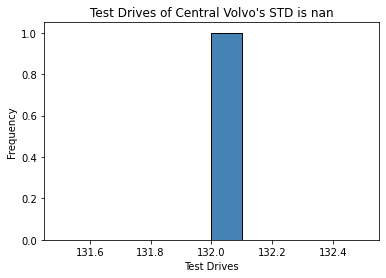

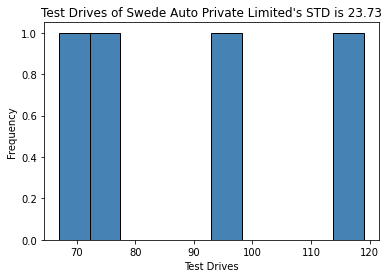

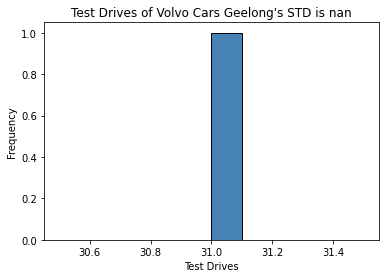

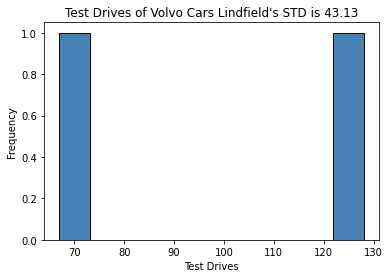

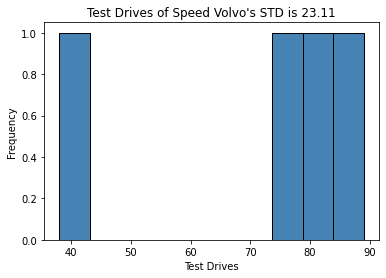

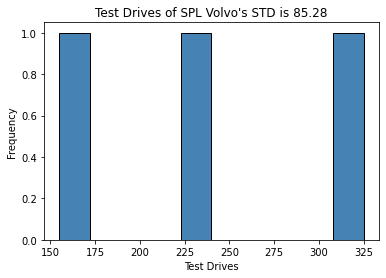

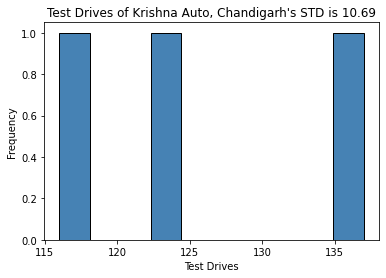

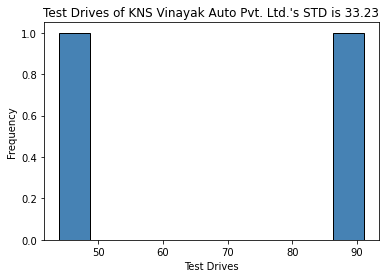

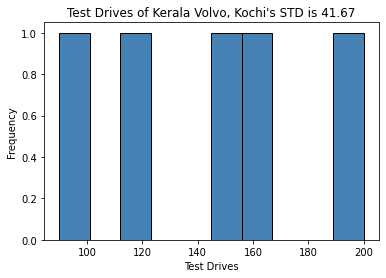

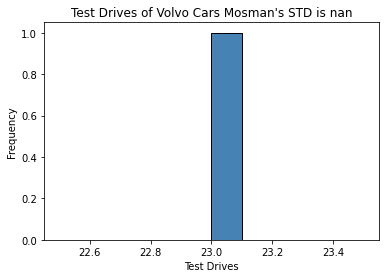

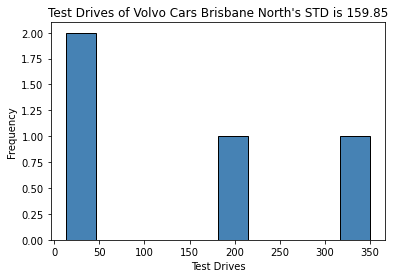

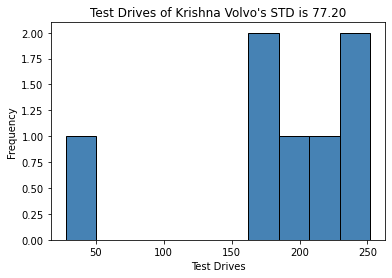

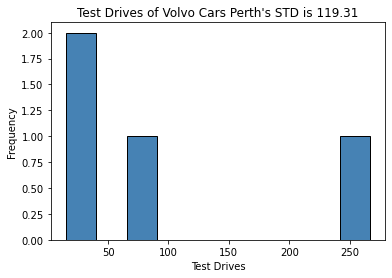

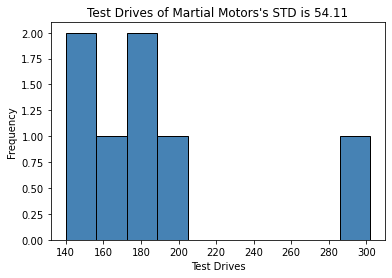

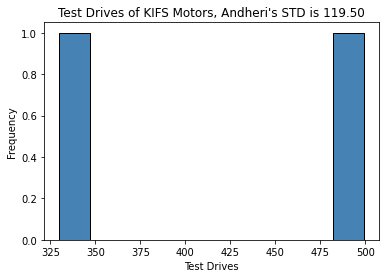

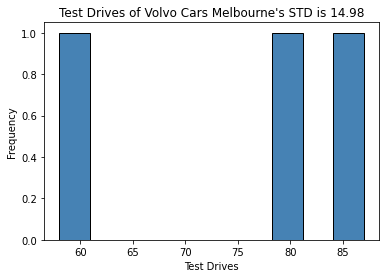

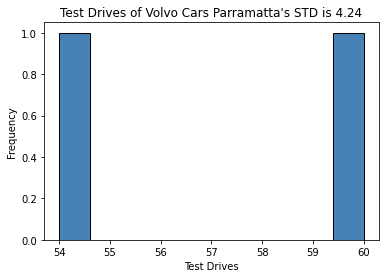

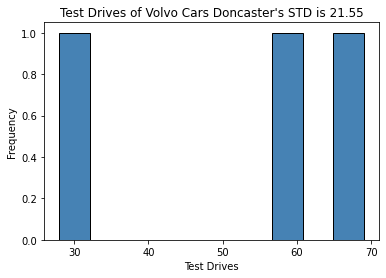

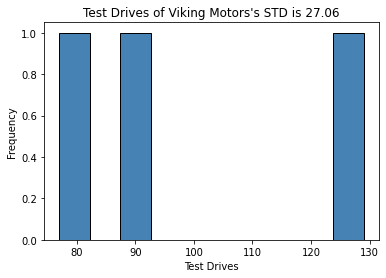

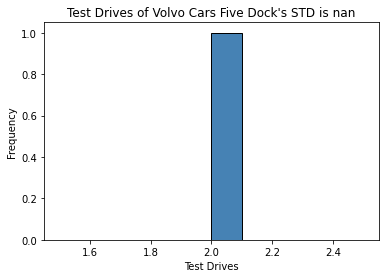

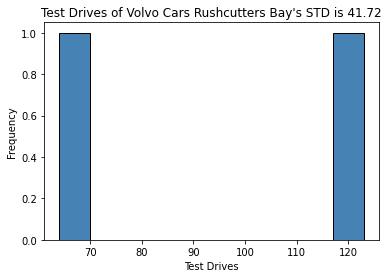

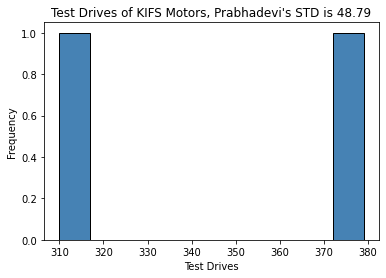

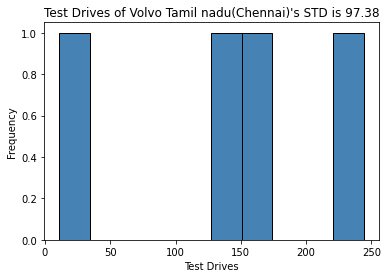

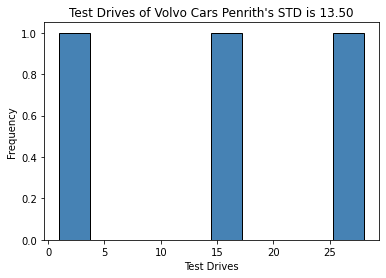

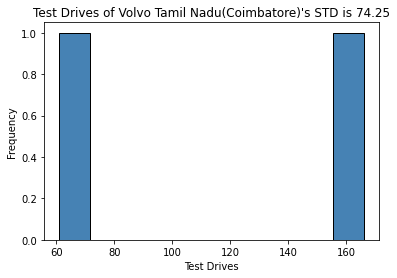

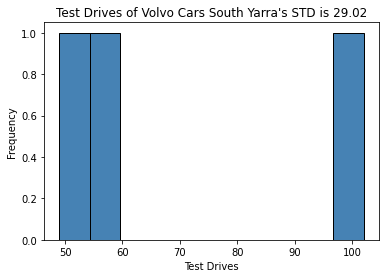

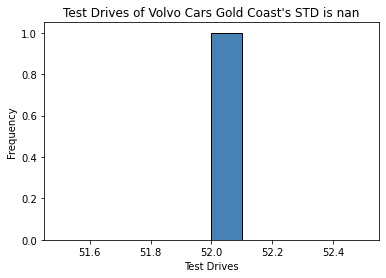

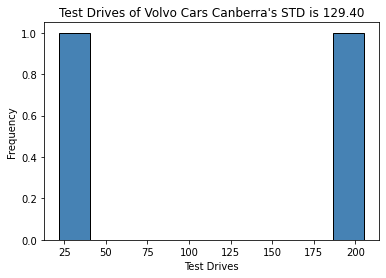

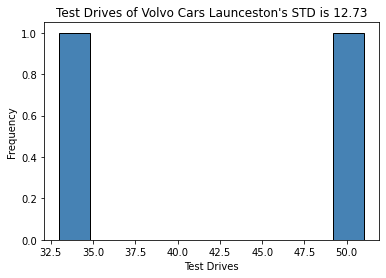

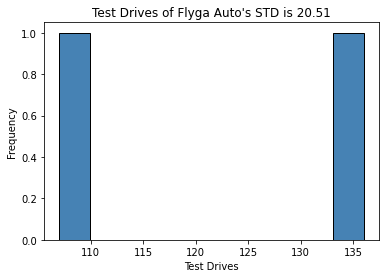

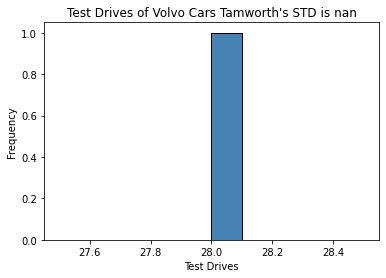

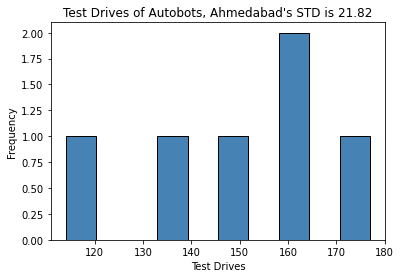

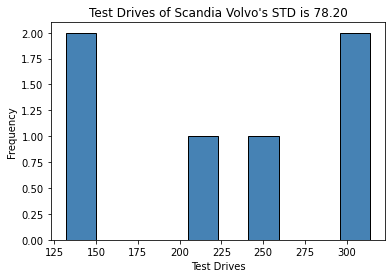

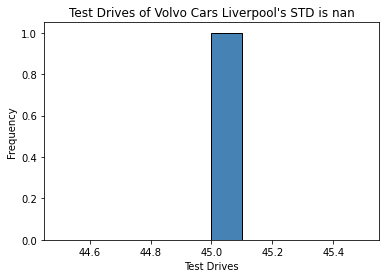

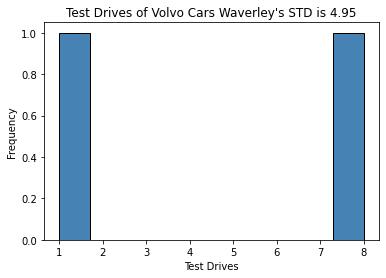

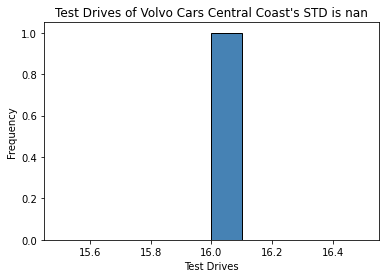

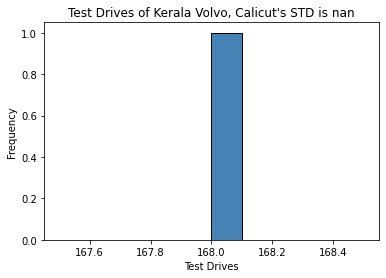

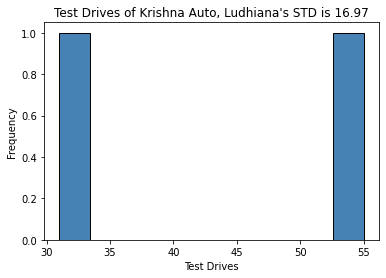

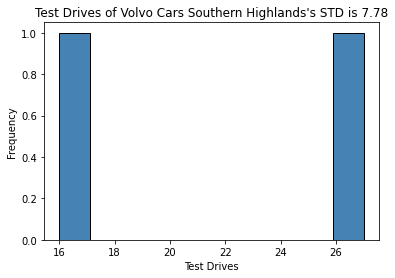

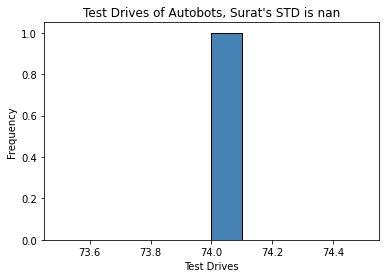

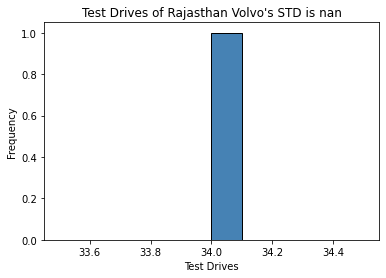

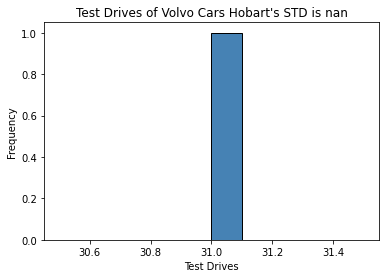

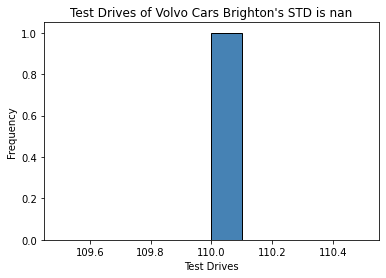

In [77]:
batch_plot_std(TD_SALE_COUNT_df, 'Test Drives', 'Dealer')

### 按Market维度统计Test Drives标准差
1. 按照MARKET分组计算Test Drives的标准差
2. 按照MARKET排序输出结果SD_TD_M_df

In [78]:
SD_TD_M = TD_SALE_COUNT_df.groupby(['MARKET'])['Test Drives'].std().round(2)
SD_TD_M.rename('SD_TD_M', inplace=True)
SD_TD_M_df = SD_TD_M.reset_index()
SD_TD_M_df.sort_values('MARKET', inplace=True)
SD_TD_M_df

MARKET  SD_TD_M
0     AU    71.39
1     IN    91.58

### 计算Test Drives和Course Rating的相关性
1. 按TD_SALE_COUNT_df.FederationIdentifier和course_rating_df.USER CODE内联得到CR_TD_df
2. 输出结果CR_TD_df
3. plot_r函数输出相关性图片并保存

In [79]:
CR_TD_df = TD_SALE_COUNT_df.merge(course_rating_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CR_TD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CR_TD_df.head()

MARKET DEALER CODE                    DEALER FederationIdentifier  \
0     IN     6IN6060             Central Volvo             A-ARORA2   
1     IN     6IN6054               Speed Volvo             A-KAPOOR   
2     IN     6IN6048  Krishna Auto, Chandigarh             A-SHARM3   
3     IN     6IN6071             Krishna Volvo             C-KUMAR1   
4     IN     6IN6071             Krishna Volvo               E-PAUL   

   Test Drives Min Opportunity Time START DATE MARKET_y   REGION DEALER GROUP  \
0          132  2020-11-23 00:00:00 2019-08-06    INDIA  Central      Central   
1           89  2020-12-12 09:35:52 2019-06-20    INDIA    North        Speed   
2          137  2021-01-15 04:53:55 2019-07-16    INDIA    North      Krishna   
3          173  2021-08-30 08:07:05 2021-08-28    INDIA    South  Krishna Hyd   
4          192  2020-12-21 04:30:48 2019-06-20    INDIA    South  Krishna Hyd   

   ...      LAST NAME FIRST NAME USER CODE     CODE          TITLE   CODE.1  \
0  ...          Arora   Abhishek  A-ARORA2  RTT0001  Course Rating  RTT0001   
1  ...          Kapur      Arpan  A-KAPOOR  RTT0001  Course Rating  RTT0001   
2  ...         Sharma     Ankush  A-SHARM3  RTT0001  Course Rating  RTT0001   
3  ...  Pradeep Kumar     Chanda  C-KUMAR1  RTT0001  Course Rating  RTT0001   
4  ...           Paul   Emmanuel    E-PAUL  RTT0001  Course Rating  RTT0001   

                          TRAINING Course Rating    STATUS  \
0  VCC5040: MY23 Introduction Film          5.00  FINISHED   
1  VCC5040: MY23 Introduction Film          9.33  FINISHED   
2  VCC5040: MY23 Introduction Film          9.00  FINISHED   
3  VCC5040: MY23 Introduction Film         10.00  FINISHED   
4  VCC5040: MY23 Introduction Film         10.00  FINISHED   

                  DATE  
0  09/08/2022 09:29:52  
1  03/08/2022 05:17:41  
2  02/08/2022 09:33:49  
3  03/08/2022 10:40:25  
4  09/08/2022 12:49:57  

[5 rows x 22 columns]

In [80]:
CR_TD_df.to_csv(r'Correlation\CR_TD_df.csv')

In [81]:
plot_r(CR_TD_df, 'Course Rating vs Test Drives', 'Course Rating', 'Test Drives', 'Course Rating vs Test Drives')

### 计算Test Drives和Course Completion的相关性
1. 按TD_SALE_COUNT_df.FederationIdentifier和complement_df.CDSID内联得到CC_TD_df
2. 输出结果CC_TD_df
3. plot_r函数输出相关性图片并保存

In [82]:
CC_TD_df = TD_SALE_COUNT_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
CC_TD_df.dropna(subset=['Course Completion', 'Test Drives'], inplace=True, how='any')
CC_TD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CC_TD_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0       IN     6IN6060               Central Volvo             A-ARORA2   
1       IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2       AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3       AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4       IN     6IN6054                 Speed Volvo             A-KAPOOR   
..     ...         ...                         ...                  ...   
106     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
107     IN     6IN6045              Martial Motors                 V-MP   
108     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
109     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
110     IN     6IN6045              Martial Motors                  Y-A   

     Test Drives Min Opportunity Time START DATE_x   MARKET_y DEALER CODE_y  \
0            132  2020-11-23 00:00:00   2019-08-06      INDIA       6IN6060   
1             74  2022-01-25 09:18:41   2022-01-18      INDIA       6IN6043   
2             31  2021-09-14 01:28:10   2021-08-25  AUSTRALIA       6AU3222   
3            128  2021-10-23 00:56:04   2020-03-12  AUSTRALIA       6AU2068   
4             89  2020-12-12 09:35:52   2019-06-20      INDIA       6IN6054   
..           ...                  ...          ...        ...           ...   
106          310  2021-03-13 11:30:40   2021-03-11      INDIA     6IN6049S2   
107          160  2022-02-03 08:57:04   2022-01-19      INDIA       6IN6045   
108          188  2021-02-05 07:10:14   2020-03-11  AUSTRALIA       6AU4008   
109          110  2021-12-22 23:29:34   2021-12-21  AUSTRALIA       6AU3187   
110          173  2022-01-31 06:50:11   2022-01-22      INDIA       6IN6045   

                      DEALER_y     CDSID   ALL  Course Completion  \
0                       Indore  A-ARORA2  30.0               23.0   
1                     Gurugram  A-BISHT1  30.0               23.0   
2           Volvo Cars Geelong  A-BOYLE2  30.0               23.0   
3         Volvo Cars Lindfield  A-FRASER  30.0                7.0   
4                      Lucknow  A-KAPOOR  30.0               23.0   
..                         ...       ...   ...                ...   
106                 Prabhadevi  V-KHATRI  30.0               23.0   
107                  Bangalore      V-MP  30.0               22.0   
108  Volvo Cars Brisbane North    W-BASS  30.0                8.0   
109        Volvo Cars Brighton   W-WONG5  30.0                7.0   
110                  Bangalore       Y-A  30.0               22.0   

    START DATE_y  Sales Learning Programme Completion(%)  
0     2019-08-06                                   76.67  
1     2022-01-18                                   76.67  
2     2021-08-25                                   76.67  
3     2020-03-12                                   23.33  
4     2019-06-20                                   76.67  
..           ...                                     ...  
106   2021-03-11                                   76.67  
107   2022-01-19                                   73.33  
108   2020-03-11                                   26.67  
109   2021-12-21                                   23.33  
110   2022-01-22                                   73.33  

[111 rows x 15 columns]

In [83]:
CC_TD_df.to_csv(r'Correlation\CC_TD_df.csv')

In [84]:
plot_r(CC_TD_df, 'Course Completion vs Test Drives', 'Course Completion', 'Test Drives', 'Course Completion vs Test Drives')

### 计算Test Drives和Course Post-Test Score的相关性
1. 按TD_SALE_COUNT_df.FederationIdentifier和assessment_df.USER CODE内联得到CPT_TD_df
2. 输出结果CPT_TD_df
3. plot_r函数输出相关性图片并保存

In [85]:
CPT_TD_df = TD_SALE_COUNT_df.merge(assessment_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CPT_TD_df.dropna(subset=['Course Post-Test Score', 'Test Drives'], inplace=True, how='any')
CPT_TD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CPT_TD_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      AU     6AU2088           Volvo Cars Mosman             B-AMBRO3   
1      AU     6AU4008   Volvo Cars Brisbane North             B-GUNNI1   
2      AU     6AU4008   Volvo Cars Brisbane North             B-PA1000   
3      AU     6AU3206        Volvo Cars Melbourne             D-DIMAR1   
4      AU     6AU3206        Volvo Cars Melbourne             D-TAYL12   
5      AU     6AU3107        Volvo Cars Doncaster              D-ZERBI   
6      AU     6AU3107        Volvo Cars Doncaster               E-CHOW   
7      AU     6AU2040        Volvo Cars Five Dock              F-MILLS   
8      AU     6AU2014  Volvo Cars Rushcutters Bay              F-MILLS   
9      AU     6AU3112      Volvo Cars South Yarra             J-DAWSO1   
10     AU     6AU4213       Volvo Cars Gold Coast             J-FERGU3   
11     AU     6AU2014  Volvo Cars Rushcutters Bay               J-MA36   
12     AU     6AU7254       Volvo Cars Launceston             J-PEARC2   
13     AU     6AU2156       Volvo Cars Parramatta             L-LARKI1   
14     AU     6AU3112      Volvo Cars South Yarra             M-CHRAP1   
15     AU     6AU7254       Volvo Cars Launceston              M-DEAN1   
16     AU     6AU3112      Volvo Cars South Yarra             M-MOOR12   
17     AU     6AU3107        Volvo Cars Doncaster              O-SMITH   
18     AU     6AU3206        Volvo Cars Melbourne             S-AGRAWA   
19     AU     6AU3170         Volvo Cars Waverley             S-AITKEN   
20     AU     6AU2605         Volvo Cars Canberra             S-COLLI2   
21     AU     6AU2068        Volvo Cars Lindfield             T-BEAUMO   
22     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
23     AU     6AU3187         Volvo Cars Brighton              W-WONG5   

    Test Drives Min Opportunity Time START DATE   MARKET_y   REGION  \
0            23  2021-11-22 00:00:36 2021-03-15  AUSTRALIA  Central   
1           350  2021-02-02 01:59:54 2019-08-09  AUSTRALIA    North   
2            21  2021-02-20 06:28:23 2019-05-20  AUSTRALIA    North   
3            87  2021-08-12 03:48:52 2019-07-19  AUSTRALIA    South   
4            58  2021-11-20 04:50:42 2019-07-04  AUSTRALIA    South   
5            69  2021-09-17 07:45:34 2020-02-10  AUSTRALIA    South   
6            28  2022-02-21 04:33:51 2021-07-26  AUSTRALIA    South   
7             2  2022-01-15 00:17:18 2020-08-22  AUSTRALIA  Central   
8           123  2021-10-22 22:00:44 2020-08-22  AUSTRALIA  Central   
9            49  2021-04-07 02:01:15 2020-01-28  AUSTRALIA    South   
10           52  2021-09-10 01:33:14 2021-08-26  AUSTRALIA    North   
11           64  2022-01-08 05:27:01 2020-03-21  AUSTRALIA  Central   
12           51  2021-10-21 06:14:12 2021-06-28  AUSTRALIA    South   
13           54  2022-01-12 01:07:30 2020-03-12  AUSTRALIA  Central   
14           55  2022-03-21 04:27:59 2021-07-16  AUSTRALIA    South   
15           33  2021-04-08 07:16:16 2020-10-15  AUSTRALIA    South   
16          102  2021-11-11 05:32:52 2021-07-28  AUSTRALIA    South   
17           60  2021-09-10 05:57:21 2021-03-12  AUSTRALIA    South   
18           79  2021-12-01 23:29:28 2019-07-08  AUSTRALIA    South   
19            8  2021-11-22 02:08:23 2021-07-22  AUSTRALIA    South   
20          205  2021-07-20 01:18:04 2020-09-29  AUSTRALIA    South   
21           67  2021-10-05 07:47:26 2020-12-17  AUSTRALIA  Central   
22          188  2021-02-05 07:10:14 2020-03-11  AUSTRALIA    North   
23          110  2021-12-22 23:29:34 2021-12-21  AUSTRALIA    South   

                 DEALER GROUP  ...   LAST NAME FIRST NAME USER CODE    TYPE  \
0                  SMA Motors  ...     Ambrose        Ben  B-AMBRO3  Course   
1   Volvo Cars Brisbane North  ...      Gunnis       Bill  B-GUNNI1  Course   
2   Volvo Cars Brisbane North  ...      Palmer      Brett  B-PA1000  Course   
3        Volvo Cars Melbourne  ...  Di Martino    Domenic  D

In [86]:
CPT_TD_df.to_csv(r'Correlation\CPT_TD_df.csv')

In [87]:
plot_r(CPT_TD_df, 'Course Post-Test Score vs Test Drives', 'Course Post-Test Score', 'Test Drives', 'Course Post-Test Score vs Test Drives')

### 计算Test Drives和Sales Learning Programme Completion的相关性
1. 按TD_SALE_COUNT_df.FederationIdentifier和complement_df.CDSID内联得到SLPC_TD_df
2. 输出结果SLPC_TD_df
3. plot_r函数输出相关性图片并保存

In [88]:
SLPC_TD_df = TD_SALE_COUNT_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
SLPC_TD_df.dropna(subset=['Sales Learning Programme Completion(%)', 'Test Drives'], inplace=True, how='any')
SLPC_TD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
SLPC_TD_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0       IN     6IN6060               Central Volvo             A-ARORA2   
1       IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2       AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3       AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4       IN     6IN6054                 Speed Volvo             A-KAPOOR   
..     ...         ...                         ...                  ...   
106     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
107     IN     6IN6045              Martial Motors                 V-MP   
108     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
109     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
110     IN     6IN6045              Martial Motors                  Y-A   

     Test Drives Min Opportunity Time START DATE_x   MARKET_y DEALER CODE_y  \
0            132  2020-11-23 00:00:00   2019-08-06      INDIA       6IN6060   
1             74  2022-01-25 09:18:41   2022-01-18      INDIA       6IN6043   
2             31  2021-09-14 01:28:10   2021-08-25  AUSTRALIA       6AU3222   
3            128  2021-10-23 00:56:04   2020-03-12  AUSTRALIA       6AU2068   
4             89  2020-12-12 09:35:52   2019-06-20      INDIA       6IN6054   
..           ...                  ...          ...        ...           ...   
106          310  2021-03-13 11:30:40   2021-03-11      INDIA     6IN6049S2   
107          160  2022-02-03 08:57:04   2022-01-19      INDIA       6IN6045   
108          188  2021-02-05 07:10:14   2020-03-11  AUSTRALIA       6AU4008   
109          110  2021-12-22 23:29:34   2021-12-21  AUSTRALIA       6AU3187   
110          173  2022-01-31 06:50:11   2022-01-22      INDIA       6IN6045   

                      DEALER_y     CDSID   ALL  Course Completion  \
0                       Indore  A-ARORA2  30.0               23.0   
1                     Gurugram  A-BISHT1  30.0               23.0   
2           Volvo Cars Geelong  A-BOYLE2  30.0               23.0   
3         Volvo Cars Lindfield  A-FRASER  30.0                7.0   
4                      Lucknow  A-KAPOOR  30.0               23.0   
..                         ...       ...   ...                ...   
106                 Prabhadevi  V-KHATRI  30.0               23.0   
107                  Bangalore      V-MP  30.0               22.0   
108  Volvo Cars Brisbane North    W-BASS  30.0                8.0   
109        Volvo Cars Brighton   W-WONG5  30.0                7.0   
110                  Bangalore       Y-A  30.0               22.0   

    START DATE_y  Sales Learning Programme Completion(%)  
0     2019-08-06                                   76.67  
1     2022-01-18                                   76.67  
2     2021-08-25                                   76.67  
3     2020-03-12                                   23.33  
4     2019-06-20                                   76.67  
..           ...                                     ...  
106   2021-03-11                                   76.67  
107   2022-01-19                                   73.33  
108   2020-03-11                                   26.67  
109   2021-12-21                                   23.33  
110   2022-01-22                                   73.33  

[111 rows x 15 columns]

In [89]:
plot_r(SLPC_TD_df, 'Sales Learning Programme Completion(%) vs Test Drives', 'Sales Learning Programme Completion(%)', 'Test Drives', 'Sales Learning Programme Completion(%) vs Test Drives')

## 处理Retail Orders

### 联表order_df和user_info_df
1. 按order_df.opportunity__c和opportunity_ownerid_df.id内联得到中间表order_temp_df
2. 将order_temp_df中owerid列为空的行的id记录为order_lost_df，即opportunity_ownerid_df相对order_df缺少的opportunity__c(仅作数据缺失记录)
3. 将order_df.opportunity__c去除order_lost_df的opportunity__c记为clean_order_df(仅作数据缺失记录)
4. 将order_temp_df中owerid列为空的行舍去
5. 按order_temp_df.ownerid和user_info_df.Id内联得到带有sale信息的order表————order_user_info_df

In [90]:
# 按经销商维度统计订单数量标准差
print(len(order_df))
order_temp_df = pd.merge(order_df.rename(columns={'id': 'order_id'}), opportunityid_ownerid_df.rename(columns={'id': 'opportunity_id'}), left_on='opportunity__c', right_on='opportunity_id', how='left')
order_lost_df = order_temp_df[pd.isnull(order_temp_df['ownerid'])]['opportunity__c'].to_frame()
clean_order_df = order_df[~order_df['opportunity__c'].isin(order_lost_df['opportunity__c'])]
order_temp_df.dropna(subset=['ownerid'], inplace=True)
print(len(clean_order_df))
print(len(order_temp_df))
# user_info_order_lost_df = pd.merge(user_info_df, order_temp_df, left_on='Id', right_on='ownerid', how='left')
# user_info_order_lost_df = user_info_order_lost_df[pd.isnull(user_info_order_lost_df['Id'])]['ownerid']
# user_info_order_lost_df.to_csv('user_info_order_lost_id.csv')
print(len(pd.merge(user_info_df, order_temp_df, left_on='Id', right_on='ownerid', how='inner')))
order_user_info_df = pd.merge(user_info_df, order_temp_df, left_on='Id', right_on='ownerid', how='inner')
order_user_info_df

13674
13672
13672
9343


Id           ContactId             Title  IsActive  \
0     0052w000004iai2AAA  0032w00000DHbaeAAD               NaN      True   
1     0052w000004ieBAAAY  0032w00000DHcS7AAL     Business Head      True   
2     0052w000004ieGfAAI  0032w00000DHcSkAAL     Sales Manager     False   
3     0052w000004ieGfAAI  0032w00000DHcSkAAL     Sales Manager     False   
4     0052w000004ieGfAAI  0032w00000DHcSkAAL     Sales Manager     False   
...                  ...                 ...               ...       ...   
9338  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
9339  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
9340  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
9341  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   
9342  0052w000008BYujAAG  0032w00000gtGSCAA2  Sales Consultant      True   

     FederationIdentifier                                   Username  \
0                     NaN         consultant@volvocars.com.apac.demo   
1                A-GANDHI      anil.gandhi@scandiavolvocars.com.apac   
2                     NaN  jeetender.kumar@scandiavolvocars.com.apac   
3                     NaN  jeetender.kumar@scandiavolvocars.com.apac   
4                     NaN  jeetender.kumar@scandiavolvocars.com.apac   
...                   ...                                        ...   
9338              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
9339              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
9340              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
9341              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   
9342              W-WONG5  steven.wong@volvocarsbrighton.com.au.apac   

                                     Email VCCMarket__c attributes.type  \
0                    lu.jing@volvocars.com           IN            User   
1         anil.gandhi@scandiavolvocars.com           IN            User   
2     jeetender.kumar@scandiavolvocars.com           IN            User   
3     jeetender.kumar@scandiavolvocars.com           IN            User   
4     jeetender.kumar@scandiavolvocars.com           IN            User   
...                                    ...          ...             ...   
9338  steven.wong@volvocarsbrighton.com.au           AU            User   
9339  steven.wong@volvocarsbrighton.com.au           AU            User   
9340  steven.wong@volvocarsbrighton.com.au           AU            User   
9341  steven.wong@volvocarsbrighton.com.au           AU            User   
9342  steven.wong@volvocarsbrighton.com.au           AU            User   

                                         attributes.url  ...  \
0     /services/data/v52.0/sobjects/User/0052w000004...  ...   
1     /services/data/v52.0/sobjects/User/0052w000004...  ...   
2     /services/data/v52.0/sobjects/User/0052w000004...  ...   
3     /services/data/v52.0/sobjects/User/0052w000004...  ...   
4     /services/data/v52.0/sobjects/User/0052w000004...  ...   
...                                                 ...  ...   
9338  /services/data/v52.0/sobjects/User/0052w000008...  ...   
9339  /services/data/v52.0/sobjects/User/0052w000008...  ...   
9340  /services/data/v52.0/sobjects/User/0052w000008...  ...   
9341  /services/data/v52.0/sobjects/User/0052w000008...  ...   
9342  /services/data/v52.0/sobjects/User/0052w000008...  ...   

            dmscancellationdate__c      opportunity__c ordersubmitteddate__c  \
0                              NaN  0062w0000090nxDAAQ            2022-03-09   
1     2022-03-15T05:15:45.000+0000  0062w00000CQQi5AAH            2022-02-18   
2                              NaN  0062w000005rFt4AAE            2020-10-19   
3                              NaN  0062w000005rk95AAA            2020-12-29   
4                              NaN  0062w000008zMMPAA2            2021-02-05   
...                            ...                 ...                   ...   
9338          

### 联表opportunity_df和order_user_info_df
1. 按opportunity_df.id和order_user_info_df.opportunity__c内联得到OP_OR_UI_df
2. 将OP_OR_UI_df中status__c为非Cancelled的行作为有效记录
3. 将OP_OR_UI_df按照ordersubmitteddate__c倒序排列数据
4. 同一组[order_id, opportunity_id]只取最近的一条记录


In [91]:
OP_OR_UI_df = pd.merge(opportunity_df, order_user_info_df, left_on='id',
                       right_on='opportunity__c', how='inner')  # 潜在客户-订单关联表
OP_OR_UI_df = OP_OR_UI_df[OP_OR_UI_df['status__c'] != 'Cancelled']

OP_OR_UI_df.sort_values('ordersubmitteddate__c', ascending=False)
OP_OR_UI_df.drop_duplicates(['order_id', 'opportunity_id'], keep='first', inplace=True)

OP_OR_UI_df


id partnerid__c_x                   name__c_x  \
0     0062w00000DthE8AAJ        6IN6038         Kerala Volvo, Kochi   
1     0062w00000DtISMAA3        6IN6038         Kerala Volvo, Kochi   
2     0062w00000DserjAAB        6IN6038         Kerala Volvo, Kochi   
3     0062w00000DZG5PAAX        6IN6038         Kerala Volvo, Kochi   
4     0062w00000DYaDyAAL        6IN6038         Kerala Volvo, Kochi   
...                  ...            ...                         ...   
9216  0062w0000090nWjAAI        6AU2014  Volvo Cars Rushcutters Bay   
9217  0062w0000090lmFAAQ        6AU2014  Volvo Cars Rushcutters Bay   
9219  0062w0000090iasAAA        6AU2014  Volvo Cars Rushcutters Bay   
9220  0062w0000090VNkAAM        6AU2014  Volvo Cars Rushcutters Bay   
9222  0062w0000090VMhAAM        6AU2014  Volvo Cars Rushcutters Bay   

      dedealergroupcode_x dealergroupname_x                   createddate  \
0                     NaN            Kerala  2022-06-25T07:16:55.000+0000   
1                     NaN            Kerala  2022-06-21T06:32:05.000+0000   
2                     NaN            Kerala  2022-06-15T04:43:09.000+0000   
3                     NaN            Kerala  2022-05-19T09:27:03.000+0000   
4                     NaN            Kerala  2022-05-13T14:21:42.000+0000   
...                   ...               ...                           ...   
9216                  NaN               NaN  2021-07-15T03:44:54.000+0000   
9217                  NaN               NaN  2021-07-12T05:40:55.000+0000   
9219                  NaN               NaN  2021-07-05T00:53:09.000+0000   
9220                  NaN               NaN  2021-06-13T06:26:22.000+0000   
9222                  NaN               NaN  2021-06-13T06:15:40.000+0000   

          leadtoopportunitytime__c  leadtoopportunityduration__c  \
0     2022-06-30T11:20:13.000+0000                         124.0   
1     2022-06-21T06:32:38.000+0000                           0.0   
2     2022-06-15T04:45:23.000+0000                           0.0   
3     2022-05-19T09:31:36.000+0000                           0.0   
4     2022-05-17T05:44:57.000+0000                          87.0   
...                            ...                           ...   
9216  2021-08-20T04:58:45.000+0000                         865.0   
9217  2021-07-12T05:44:55.000+0000                           0.0   
9219  2021-07-05T00:53:23.000+0000                           0.0   
9220  2021-06-13T06:29:39.000+0000                           0.0   
9222  2021-06-13T06:17:18.000+0000                           0.0   

     vccmarket__c_x                  Id  ... dmscancellationdate__c  \
0                IN  0052w000006ZNIYAA4  ...                    NaN   
1                IN  0052w000004ieStAAI  ...                    NaN   
2                IN  0052w000004ieStAAI  ...                    NaN   
3                IN  0052w000004ieStAAI  ...                    NaN   
4                IN  0052w000006ZNIYAA4  ...                    NaN   
...             ...                 ...  ...                    ...   
9216             AU  0052w000006ZjwCAAS  ...                    NaN   
9217             AU  0052w000006ZjwCAAS  ...                    NaN   
9219             AU  0052w000006ZjwCAAS  ...                    NaN   
9220             AU  0052w000006ZjwCAAS  ...                    NaN   
9222             AU  0052w000006ZjwCAAS  ...                    NaN   

          opportunity__c  ordersubmitteddate__c    status__c partnerid__c_y  \
0     0062w00000DthE8AAJ             2022-06-30    Completed        6IN6038   
1     0062w00000DtISMAA3             2022-06-21    Submitted        6IN6038   
2     0062w00000DserjAAB             2022-06-18    Submitted        6IN6038   
3     0062w00000DZG5PAAX             2022-05-20    Completed        6IN6038   
4     0062w00000DYaDyAAL             2022-05-27  In Progress        6IN6038   
...                  ...                    ...          ...            ...   
9216  0062w0000090nWj

### 清洗OP_OR_UI_df
1. 取OP_OR_UI_df.IsActive状态为True且order_user_info_df.FederationIdentifier为非空的行记为clean_OP_OR_UI_df
2. 按clean_OP_OR_UI_df.FederationIdentifier和completion_df.CDSID内联得到带有START DATE信息的表记为OP_OR_UI_SD_df
3. 取OP_OR_UI_SD_df中leadtoopportunitytime__c晚于开始培训日期一天后的记录作为opportunity的有效记录

In [92]:
clean_OP_OR_UI_df = OP_OR_UI_df[(OP_OR_UI_df['IsActive'] == True) & (~pd.isna(OP_OR_UI_df['FederationIdentifier']))]
OP_OR_UI_SD_df = clean_OP_OR_UI_df.merge(
    complement_df, left_on='FederationIdentifier', right_on='CDSID', how="inner")
OP_OR_UI_SD_df['leadtoopportunitytime__c'] = pd.to_datetime(OP_OR_UI_SD_df['leadtoopportunitytime__c'])
OP_OR_UI_SD_df['leadtoopportunitytime__c'] = OP_OR_UI_SD_df['leadtoopportunitytime__c'].dt.tz_localize(None)
OP_OR_UI_SD_df = OP_OR_UI_SD_df[(OP_OR_UI_SD_df['leadtoopportunitytime__c'] - OP_OR_UI_SD_df['START DATE']).dt.days > 0]
OP_OR_UI_SD_df.rename(columns={'vccmarket__c_x': 'vccmarket__c', 'partnerid__c_x': 'partnerid__c', 'name__c_x': 'name__c'}, inplace=True)
OP_OR_UI_SD_df

id partnerid__c                     name__c  \
0     0062w00000DthE8AAJ      6IN6038         Kerala Volvo, Kochi   
1     0062w00000DYaDyAAL      6IN6038         Kerala Volvo, Kochi   
2     0062w00000DYV9NAAX      6IN6038         Kerala Volvo, Kochi   
3     0062w00000ErxPuAAJ      6IN6038         Kerala Volvo, Kochi   
4     0062w00000DsybEAAR      6IN6038         Kerala Volvo, Kochi   
...                  ...          ...                         ...   
6475  0062w00000DWdVpAAL      6AU2014  Volvo Cars Rushcutters Bay   
6476  0062w00000D6GvJAAV      6AU2014  Volvo Cars Rushcutters Bay   
6477  0062w00000D65u0AAB      6AU2014  Volvo Cars Rushcutters Bay   
6478  0062w00000D3GAsAAN      6AU2014  Volvo Cars Rushcutters Bay   
6479  0062w00000CQT1TAAX      6AU2014  Volvo Cars Rushcutters Bay   

      dedealergroupcode_x dealergroupname_x                   createddate  \
0                     NaN            Kerala  2022-06-25T07:16:55.000+0000   
1                     NaN            Kerala  2022-05-13T14:21:42.000+0000   
2                     NaN            Kerala  2022-05-13T05:25:28.000+0000   
3                     NaN            Kerala  2022-07-27T10:08:07.000+0000   
4                     NaN            Kerala  2022-06-18T04:24:16.000+0000   
...                   ...               ...                           ...   
6475                  NaN               NaN  2022-04-24T05:36:44.000+0000   
6476                  NaN               NaN  2022-04-10T06:25:44.000+0000   
6477                  NaN               NaN  2022-04-08T06:18:11.000+0000   
6478                  NaN               NaN  2022-03-04T06:02:00.000+0000   
6479                  NaN               NaN  2022-02-19T01:03:08.000+0000   

     leadtoopportunitytime__c  leadtoopportunityduration__c vccmarket__c  \
0         2022-06-30 11:20:13                         124.0           IN   
1         2022-05-17 05:44:57                          87.0           IN   
2         2022-05-13 05:27:53                           0.0           IN   
3         2022-07-28 11:54:39                          26.0           IN   
4         2022-06-18 04:49:26                           0.0           IN   
...                       ...                           ...          ...   
6475      2022-04-24 05:37:33                           0.0           AU   
6476      2022-04-10 06:32:16                           0.0           AU   
6477      2022-04-08 06:19:02                           0.0           AU   
6478      2022-03-04 06:04:55                           0.0           AU   
6479      2022-02-19 01:07:20                           0.0           AU   

                      Id  ...      opportunity_id             ownerid  \
0     0052w000006ZNIYAA4  ...  0062w00000DthE8AAJ  0052w000006ZNIYAA4   
1     0052w000006ZNIYAA4  ...  0062w00000DYaDyAAL  0052w000006ZNIYAA4   
2     0052w000006ZNIYAA4  ...  0062w00000DYV9NAAX  0052w000006ZNIYAA4   
3     0052w000006ZNIYAA4  ...  0062w00000ErxPuAAJ  0052w000006ZNIYAA4   
4     0052w000006ZNIYAA4  ...  0062w00000DsybEAAR  0052w000006ZNIYAA4   
...                  ...  ...                 ...                 ...   
6475  0052w000006ZjwEAAS  ...  0062w00000DWdVpAAL  0052w000006ZjwEAAS   
6476  0052w000006ZjwEAAS  ...  0062w00000D6GvJAAV  0052w000006ZjwEAAS   
6477  0052w000006ZjwEAAS  ...  0062w00000D65u0AAB  0052w000006ZjwEAAS   
6478  0052w000006ZjwEAAS  ...  0062w00000D3GAsAAN  0052w000006ZjwEAAS   
6479  0052w000006ZjwEAAS  ...  0062w00000CQT1TAAX  0052w000006ZjwEAAS   

         MARKET DEALER CODE                      DEALER   CDSID   ALL  \
0         INDIA     6IN6038                       Kochi     U-R  30.0   
1         INDIA     6IN6038                       Kochi     U-R  30.0   
2         INDIA     6IN6038                       Kochi     U-R  30.0   
3         INDIA     6IN6038                       Kochi     U-R  30.0   
4         INDIA     6IN6038                       Kochi     U-R  30.0   
...         ...         ...             

### 按Sale维度统计Retail Orders数量
1. 按照vccmarket__c, partnerid__c, name__c, FederationIdentifier分组统计每个Sale的Retail Orders数量(记为Retail Orders)、有效订单最小时间(记为Min Opportunity Time)、培训开始日期(记为START DATE)
2. 按照FederationIdentifier排序输出结果OR_SALE_COUNT_df

In [93]:
OR_SALE_COUNT_df = OP_OR_UI_SD_df.groupby(['vccmarket__c', 'partnerid__c', 'name__c', 'FederationIdentifier']).agg(
    {'order_id': 'count', 'leadtoopportunitytime__c': 'min', 'START DATE': 'min'}).reset_index()
OR_SALE_COUNT_df.rename(columns={'vccmarket__c': 'MARKET', 'partnerid__c': 'DEALER CODE',
                     'name__c': 'DEALER', 'order_id': 'Retail Orders', 'leadtoopportunitytime__c': 'Min Opportunity Time'}, inplace=True)
OR_SALE_COUNT_df.sort_values(by='FederationIdentifier', inplace=True)
OR_SALE_COUNT_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
94     IN     6IN6060               Central Volvo             A-ARORA2   
50     IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
31     AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
78     IN     6IN6054                 Speed Volvo             A-KAPOOR   
..    ...         ...                         ...                  ...   
77     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
69     IN     6IN6045              Martial Motors                 V-MP   
35     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
27     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
70     IN     6IN6045              Martial Motors                  Y-A   

    Retail Orders Min Opportunity Time START DATE  
94             24  2020-10-26 00:00:00 2019-08-06  
50              9  2022-02-11 08:33:08 2022-01-18  
31             58  2021-09-21 03:34:51 2021-08-25  
3             140  2021-04-27 22:47:34 2020-03-12  
78             22  2021-01-29 10:24:12 2019-06-20  
..            ...                  ...        ...  
77             41  2021-03-13 11:30:40 2021-03-11  
69              7  2022-02-18 08:31:31 2022-01-19  
35            171  2021-02-02 07:35:27 2020-03-11  
27            112  2021-12-22 23:29:34 2021-12-21  
70             16  2022-01-31 06:50:11 2022-01-22  

[112 rows x 7 columns]

### 按Dealer维度统计Retail Orders标准差
1. 按照MARKET, DEALER CODE, DEALER分组计算Retail Orders的标准差
2. 按照DEALER排序输出结果SD_RO_D_df

In [94]:
SD_RO_D = OR_SALE_COUNT_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Retail Orders'].std().round(2)
SD_RO_D.rename('SD_RO_D', inplace=True)
SD_RO_D_df = SD_RO_D.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_RO_D_df.sort_values('DEALER', inplace=True)
SD_RO_D_df

MARKET DEALER CODE                         DEALER  SD_RO_D
26     IN     6IN6044            Autobots, Ahmedabad    15.21
27     IN    6IN60441                Autobots, Surat      NaN
37     IN     6IN6060                  Central Volvo      NaN
33     IN     6IN6056                     Flyga Auto     4.24
30     IN     6IN6049           KIFS Motors, Andheri     4.24
31     IN   6IN6049S2        KIFS Motors, Prabhadevi    13.44
36     IN     6IN6059     KNS Vinayak Auto Pvt. Ltd.    12.02
23     IN    6IN60381          Kerala Volvo, Calicut      NaN
22     IN     6IN6038            Kerala Volvo, Kochi    10.66
29     IN     6IN6048       Krishna Auto, Chandigarh     5.00
35     IN     6IN6058         Krishna Auto, Ludhiana    13.44
39     IN     6IN6071                  Krishna Volvo    20.34
28     IN     6IN6045                 Martial Motors    13.24
42     IN     6IN6075                Rajasthan Volvo      NaN
38     IN     6IN6061                      SPL Volvo     6.56
34     IN     6IN6057                  Scandia Volvo    18.20
32     IN     6IN6054                    Speed Volvo     6.24
24     IN     6IN6043     Swede Auto Private Limited    19.30
25     IN    6IN60431                  Viking Motors     3.21
14     AU     6AU3187            Volvo Cars Brighton      NaN
17     AU     6AU4008      Volvo Cars Brisbane North   116.20
9      AU     6AU2605            Volvo Cars Canberra    70.71
6      AU     6AU2251       Volvo Cars Central Coast      NaN
11     AU     6AU3107           Volvo Cars Doncaster    15.00
1      AU     6AU2040           Volvo Cars Five Dock      NaN
16     AU     6AU3222             Volvo Cars Geelong      NaN
18     AU     6AU4213          Volvo Cars Gold Coast      NaN
20     AU     6AU7004              Volvo Cars Hobart      NaN
21     AU     6AU7254          Volvo Cars Launceston     9.19
2      AU     6AU2068           Volvo Cars Lindfield    11.31
5      AU     6AU2173           Volvo Cars Liverpool      NaN
15     AU     6AU3206           Volvo Cars Melbourne     4.62
3      AU     6AU2088              Volvo Cars Mosman      NaN
4      AU     6AU2156          Volvo Cars Parramatta     2.12
10     AU     6AU2754             Volvo Cars Penrith     9.07
19     AU     6AU6017               Volvo Cars Perth    73.96
0      AU     6AU2014     Volvo Cars Rushcutters Bay    63.64
12     AU     6AU3112         Volvo Cars South Yarra    76.01
8      AU     6AU2581  Volvo Cars Southern Highlands     4.24
7      AU     6AU2342            Volvo Cars Tamworth      NaN
13     AU     6AU3170            Volvo Cars Waverley     4.95
41     IN     6IN6073   Volvo Tamil Nadu(Coimbatore)     8.49
40     IN     6IN6072      Volvo Tamil nadu(Chennai)    11.36

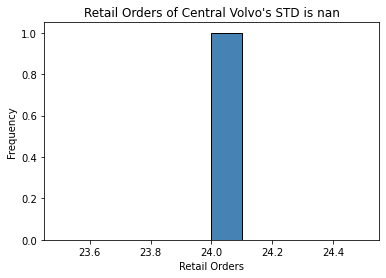

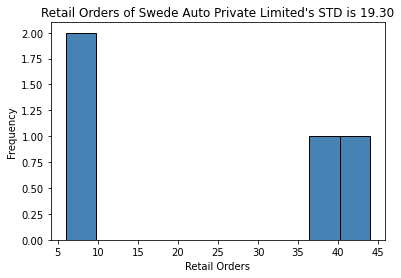

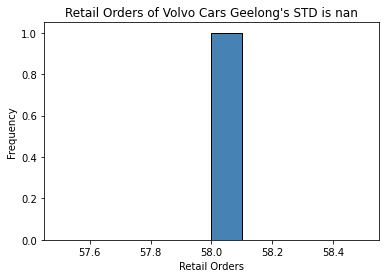

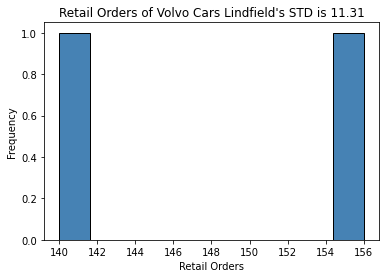

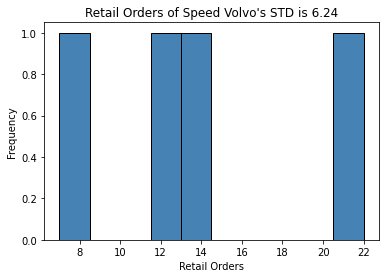

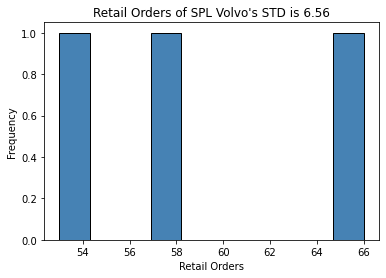

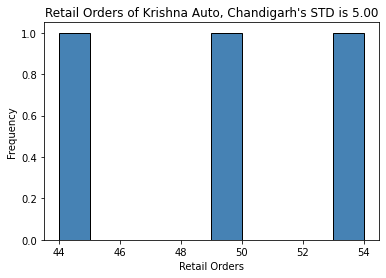

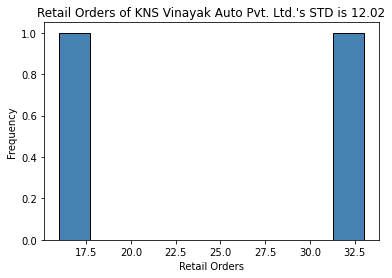

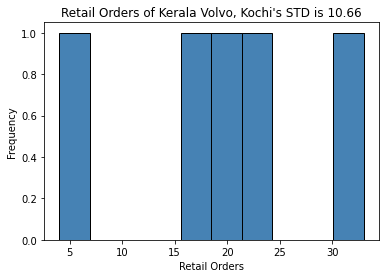

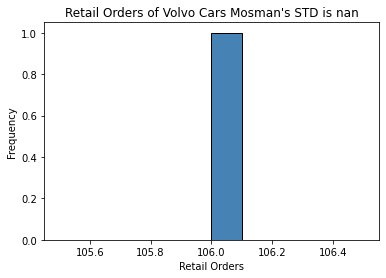

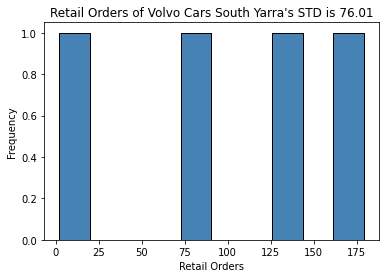

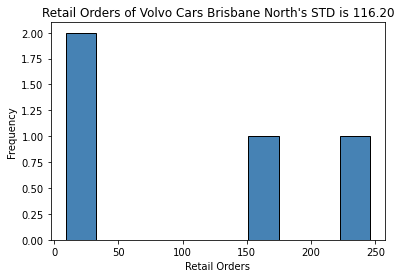

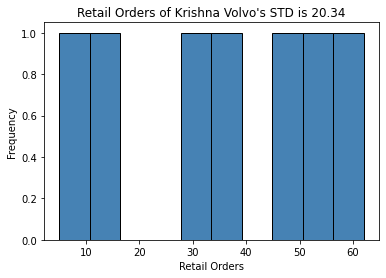

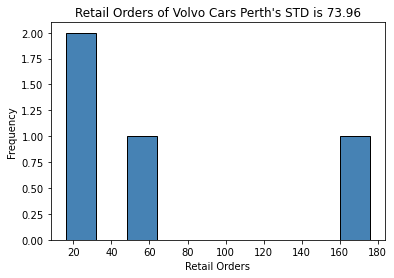

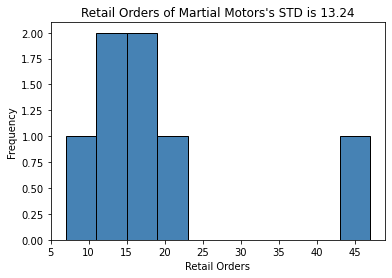

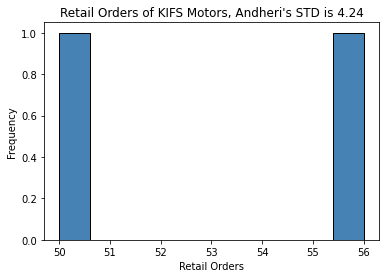

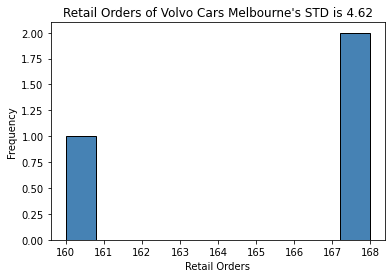

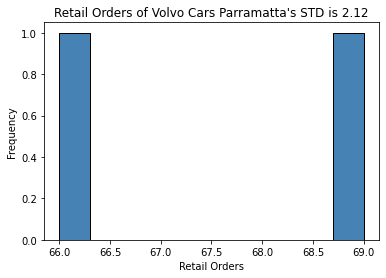

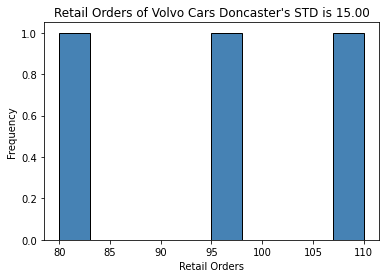

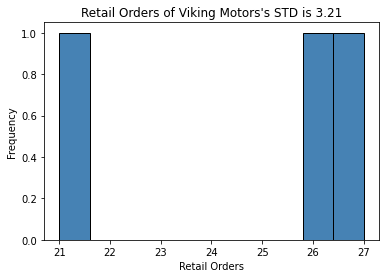

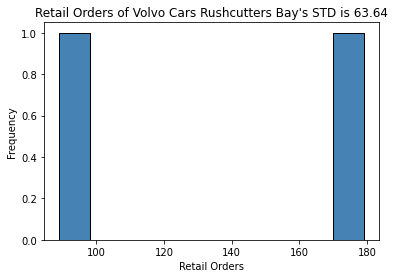

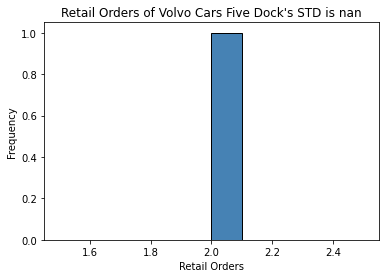

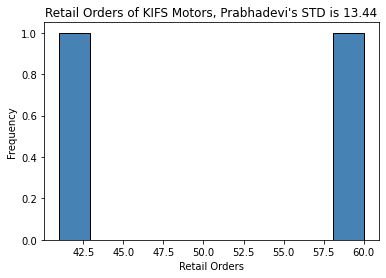

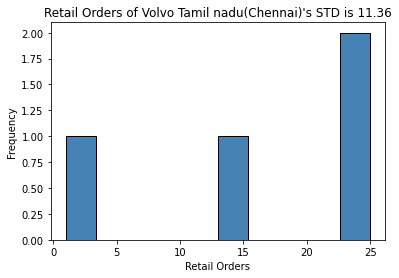

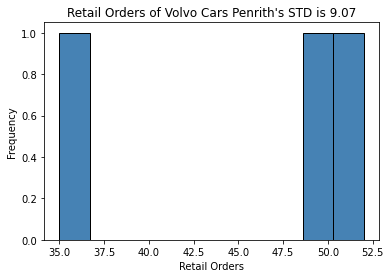

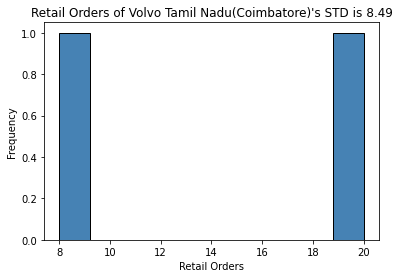

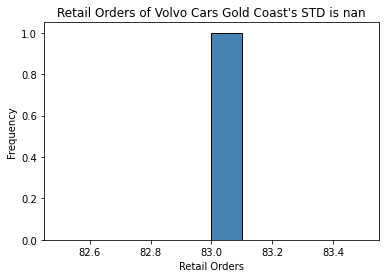

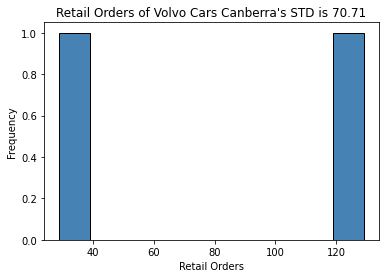

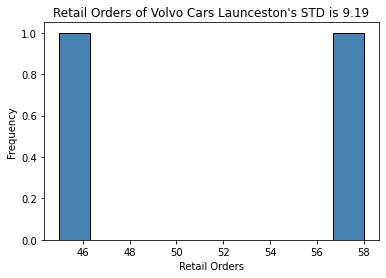

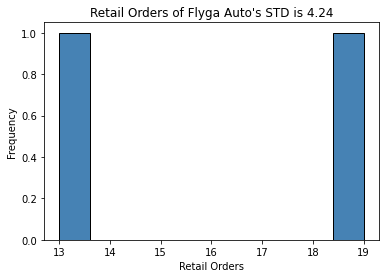

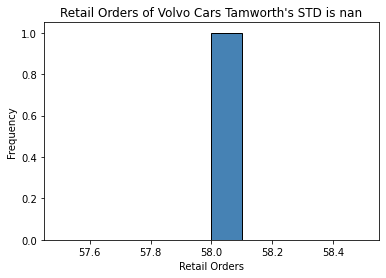

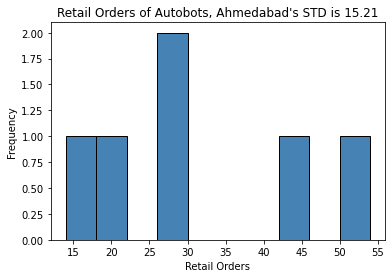

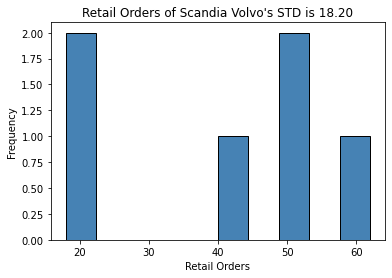

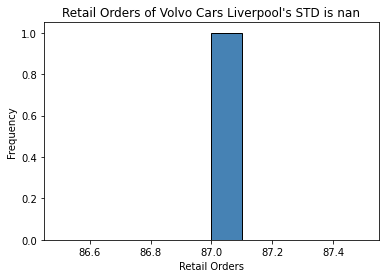

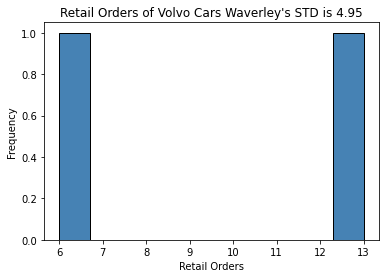

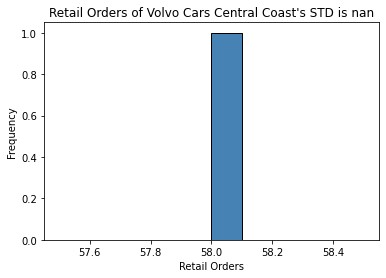

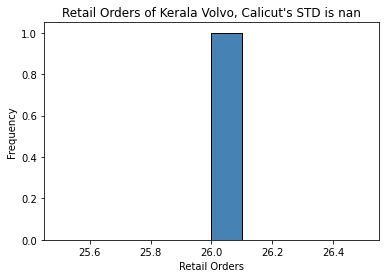

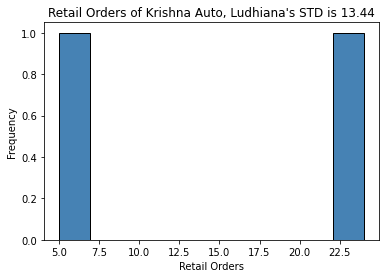

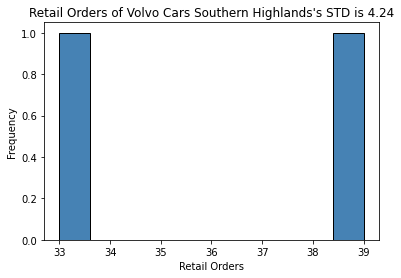

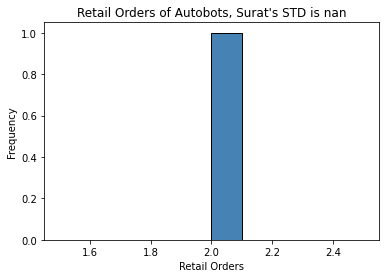

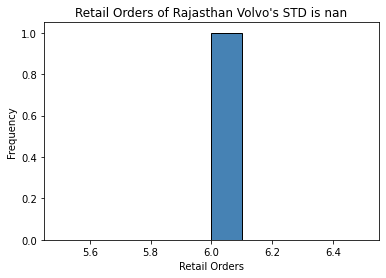

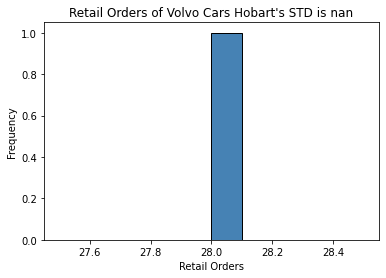

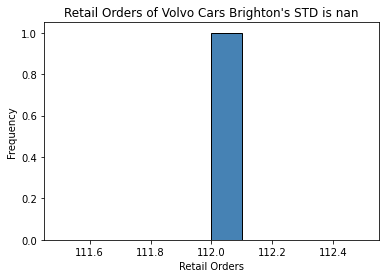

In [95]:
batch_plot_std(OR_SALE_COUNT_df, 'Retail Orders', 'Dealer')

### 按Market维度统计Retail Orders标准差
1. 按照MARKET分组计算Retail Orders的标准差
2. 按照MARKET排序输出结果SD_RO_M_df

In [96]:
SD_RO_M = OR_SALE_COUNT_df.groupby(['MARKET'])['Retail Orders'].std().round(2)
SD_RO_M.rename('SD_RO_M', inplace=True)
SD_RO_M_df = SD_RO_M.reset_index()
SD_RO_M_df.sort_values('MARKET', inplace=True)
SD_RO_M_df

MARKET  SD_RO_M
0     AU    60.67
1     IN    18.02

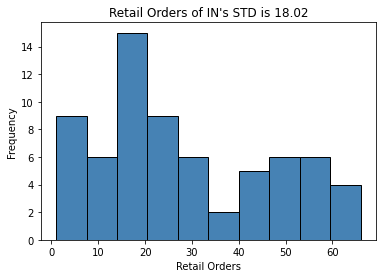

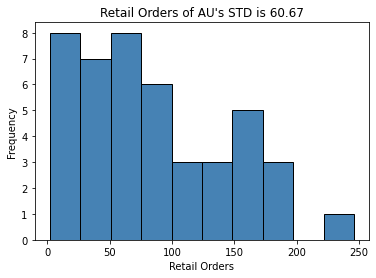

In [97]:
batch_plot_std(OR_SALE_COUNT_df, 'Retail Orders', 'Market')

### 计算Retail Orders和Course Rating的相关性
1. 按OR_SALE_COUNT_df.FederationIdentifier和course_rating_df.USER CODE内联得到CR_RO_df
2. 输出结果CR_RO_df
3. plot_r函数输出相关性图片并保存

In [98]:
CR_RO_df = OR_SALE_COUNT_df.merge(course_rating_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CR_RO_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CR_RO_df.head()

MARKET DEALER CODE                    DEALER FederationIdentifier  \
0     IN     6IN6060             Central Volvo             A-ARORA2   
1     IN     6IN6054               Speed Volvo             A-KAPOOR   
2     IN     6IN6048  Krishna Auto, Chandigarh             A-SHARM3   
3     IN     6IN6071             Krishna Volvo             C-KUMAR1   
4     IN     6IN6071             Krishna Volvo               E-PAUL   

   Retail Orders Min Opportunity Time START DATE MARKET_y   REGION  \
0             24  2020-10-26 00:00:00 2019-08-06    INDIA  Central   
1             22  2021-01-29 10:24:12 2019-06-20    INDIA    North   
2             54  2020-11-23 00:00:00 2019-07-16    INDIA    North   
3             30  2021-09-03 07:30:37 2021-08-28    INDIA    South   
4             53  2020-11-25 00:00:00 2019-06-20    INDIA    South   

  DEALER GROUP  ...      LAST NAME FIRST NAME USER CODE     CODE  \
0      Central  ...          Arora   Abhishek  A-ARORA2  RTT0001   
1        Speed  ...          Kapur      Arpan  A-KAPOOR  RTT0001   
2      Krishna  ...         Sharma     Ankush  A-SHARM3  RTT0001   
3  Krishna Hyd  ...  Pradeep Kumar     Chanda  C-KUMAR1  RTT0001   
4  Krishna Hyd  ...           Paul   Emmanuel    E-PAUL  RTT0001   

           TITLE   CODE.1                         TRAINING Course Rating  \
0  Course Rating  RTT0001  VCC5040: MY23 Introduction Film          5.00   
1  Course Rating  RTT0001  VCC5040: MY23 Introduction Film          9.33   
2  Course Rating  RTT0001  VCC5040: MY23 Introduction Film          9.00   
3  Course Rating  RTT0001  VCC5040: MY23 Introduction Film         10.00   
4  Course Rating  RTT0001  VCC5040: MY23 Introduction Film         10.00   

     STATUS                 DATE  
0  FINISHED  09/08/2022 09:29:52  
1  FINISHED  03/08/2022 05:17:41  
2  FINISHED  02/08/2022 09:33:49  
3  FINISHED  03/08/2022 10:40:25  
4  FINISHED  09/08/2022 12:49:57  

[5 rows x 22 columns]

In [99]:
CR_RO_df.to_csv(r'Correlation\CR_RO_df.csv')

In [100]:
plot_r(CR_RO_df, 'Course Rating vs Retail Orders', 'Course Rating', 'Retail Orders', 'Course Rating vs Retail Orders')

### 计算Retail Orders和Course Completion的相关性
1. 按OR_SALE_COUNT_df.FederationIdentifier和complement_df.CDSID内联得到CC_RO_df
2. 输出结果CC_RO_df
3. plot_r函数输出相关性图片并保存

In [101]:
CC_RO_df = OR_SALE_COUNT_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
CC_RO_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CC_RO_df.head()

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0     IN     6IN6060               Central Volvo             A-ARORA2   
1     IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2     AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3     AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4     IN     6IN6054                 Speed Volvo             A-KAPOOR   

   Retail Orders Min Opportunity Time START DATE_x   MARKET_y DEALER CODE_y  \
0             24  2020-10-26 00:00:00   2019-08-06      INDIA       6IN6060   
1              9  2022-02-11 08:33:08   2022-01-18      INDIA       6IN6043   
2             58  2021-09-21 03:34:51   2021-08-25  AUSTRALIA       6AU3222   
3            140  2021-04-27 22:47:34   2020-03-12  AUSTRALIA       6AU2068   
4             22  2021-01-29 10:24:12   2019-06-20      INDIA       6IN6054   

               DEALER_y     CDSID   ALL  Course Completion START DATE_y  \
0                Indore  A-ARORA2  30.0               23.0   2019-08-06   
1              Gurugram  A-BISHT1  30.0               23.0   2022-01-18   
2    Volvo Cars Geelong  A-BOYLE2  30.0               23.0   2021-08-25   
3  Volvo Cars Lindfield  A-FRASER  30.0                7.0   2020-03-12   
4               Lucknow  A-KAPOOR  30.0               23.0   2019-06-20   

   Sales Learning Programme Completion(%)  
0                                   76.67  
1                                   76.67  
2                                   76.67  
3                                   23.33  
4                                   76.67

In [102]:
CC_RO_df.to_csv(r'Correlation\CC_RO_df.csv')

In [103]:
plot_r(CC_RO_df, 'Course Completion vs Retail Orders', 'Course Completion', 'Retail Orders', 'Course Completion vs Retail Orders')

### 计算Retail Orders和Course Post-Test Score的相关性
1. 按OR_SALE_COUNT_df.FederationIdentifier和assessment_df.USER CODE内联得到CPT_RO_df
2. 输出结果CPT_RO_df
3. plot_r函数输出相关性图片并保存

In [104]:
CPT_RO_df = OR_SALE_COUNT_df.merge(assessment_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CPT_RO_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CPT_RO_df.head()

MARKET DEALER CODE                     DEALER FederationIdentifier  \
0     AU     6AU2088          Volvo Cars Mosman             B-AMBRO3   
1     AU     6AU3112     Volvo Cars South Yarra               B-DEAN   
2     AU     6AU4008  Volvo Cars Brisbane North             B-GUNNI1   
3     AU     6AU4008  Volvo Cars Brisbane North             B-PA1000   
4     AU     6AU3206       Volvo Cars Melbourne             D-DIMAR1   

   Retail Orders Min Opportunity Time START DATE   MARKET_y   REGION  \
0            106  2021-05-26 23:33:57 2021-03-15  AUSTRALIA  Central   
1              2  2021-09-17 01:36:58 2021-03-15  AUSTRALIA    South   
2            246  2021-02-06 03:46:07 2019-08-09  AUSTRALIA    North   
3             20  2021-02-08 04:54:02 2019-05-20  AUSTRALIA    North   
4            160  2021-07-20 00:46:16 2019-07-19  AUSTRALIA    South   

                DEALER GROUP  ...   LAST NAME FIRST NAME USER CODE    TYPE  \
0                 SMA Motors  ...     Ambrose        Ben  B-AMBRO3  Course   
1               SMG Prestige  ...        Dean        Ben    B-DEAN  Course   
2  Volvo Cars Brisbane North  ...      Gunnis       Bill  B-GUNNI1  Course   
3  Volvo Cars Brisbane North  ...      Palmer      Brett  B-PA1000  Course   
4       Volvo Cars Melbourne  ...  Di Martino    Domenic  D-DIMAR1  Course   

                                            QUIZ     TYPE.1  \
0  VCC5044: Model year changes MY23 - assessment  POST_TEST   
1  VCC5044: Model year changes MY23 - assessment  POST_TEST   
2  VCC5044: Model year changes MY23 - assessment  POST_TEST   
3  VCC5044: Model year changes MY23 - assessment  POST_TEST   
4  VCC5044: Model year changes MY23 - assessment  POST_TEST   

  Course Post-Test Score                    STATUS                 DATE  \
0                  82.35                    PASSED  16/07/2022 04:34:06   
1                  88.24                    PASSED  20/04/2022 05:05:57   
2                  70.59  KNOWLEDGE GAP IDENTIFIED  29/07/2022 06:47:50   
3                  76.47  KNOWLEDGE GAP IDENTIFIED  29/07/2022 07:13:57   
4                  82.35                    PASSED  25/07/2022 06:51:28   

  ELAPSED TIME  
0        138.0  
1        166.0  
2        108.0  
3         49.0  
4         35.0  

[5 rows x 22 columns]

In [105]:
CPT_RO_df.to_csv(r'Correlation\CPT_RO_df.csv')

In [106]:
plot_r(CPT_RO_df, 'Course Post-Test Score vs Retail Orders', 'Course Post-Test Score', 'Retail Orders', 'Course Post-Test Score vs Retail Orders')

### 计算Retail Orders和Sales Learning Programme Completion的相关性
1. 按OR_SALE_COUNT_df.FederationIdentifier和complement_df.CDSID内联得到SLPC_RO_df
2. 输出结果SLPC_RO_df
3. plot_r函数输出相关性图片并保存

In [107]:
SLPC_RO_df = OR_SALE_COUNT_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
SLPC_RO_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
SLPC_RO_df.head()

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0     IN     6IN6060               Central Volvo             A-ARORA2   
1     IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2     AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3     AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4     IN     6IN6054                 Speed Volvo             A-KAPOOR   

   Retail Orders Min Opportunity Time START DATE_x   MARKET_y DEALER CODE_y  \
0             24  2020-10-26 00:00:00   2019-08-06      INDIA       6IN6060   
1              9  2022-02-11 08:33:08   2022-01-18      INDIA       6IN6043   
2             58  2021-09-21 03:34:51   2021-08-25  AUSTRALIA       6AU3222   
3            140  2021-04-27 22:47:34   2020-03-12  AUSTRALIA       6AU2068   
4             22  2021-01-29 10:24:12   2019-06-20      INDIA       6IN6054   

               DEALER_y     CDSID   ALL  Course Completion START DATE_y  \
0                Indore  A-ARORA2  30.0               23.0   2019-08-06   
1              Gurugram  A-BISHT1  30.0               23.0   2022-01-18   
2    Volvo Cars Geelong  A-BOYLE2  30.0               23.0   2021-08-25   
3  Volvo Cars Lindfield  A-FRASER  30.0                7.0   2020-03-12   
4               Lucknow  A-KAPOOR  30.0               23.0   2019-06-20   

   Sales Learning Programme Completion(%)  
0                                   76.67  
1                                   76.67  
2                                   76.67  
3                                   23.33  
4                                   76.67

In [108]:
plot_r(SLPC_RO_df, 'Sales Learning Programme Completion(%) vs Retail Orders', 'Sales Learning Programme Completion(%)', 'Retail Orders', 'Sales Learning Programme Completion(%) vs Retail Orders')

## 计算Opportunities to Test Drives Rate(%)
1. TD_SALE_COUNT_df和OP_SALE_COUNT_df内联得到OP_TD_SALE_df
2. Opportunities to Test Drive Rate(%) = Test Drives / Opportunities * 100%

In [109]:
OP_TD_SALE_df = TD_SALE_COUNT_df.merge(OP_SALE_COUNT_df, left_on=['MARKET', 'DEALER CODE', 'DEALER', 'FederationIdentifier'], right_on=['MARKET', 'DEALER CODE', 'DEALER', 'FederationIdentifier'], how='inner')
OP_TD_SALE_df['Opportunities to Test Drive Rate(%)'] = round(OP_TD_SALE_df['Test Drives'] / OP_TD_SALE_df['Opportunities'] * 100, 2)
OP_TD_SALE_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0       IN     6IN6060               Central Volvo             A-ARORA2   
1       IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2       AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3       AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4       IN     6IN6054                 Speed Volvo             A-KAPOOR   
..     ...         ...                         ...                  ...   
106     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
107     IN     6IN6045              Martial Motors                 V-MP   
108     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
109     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
110     IN     6IN6045              Martial Motors                  Y-A   

     Test Drives Min Opportunity Time_x START DATE_x  Opportunities  \
0            132    2020-11-23 00:00:00   2019-08-06            211   
1             74    2022-01-25 09:18:41   2022-01-18             99   
2             31    2021-09-14 01:28:10   2021-08-25            136   
3            128    2021-10-23 00:56:04   2020-03-12            379   
4             89    2020-12-12 09:35:52   2019-06-20            109   
..           ...                    ...          ...            ...   
106          310    2021-03-13 11:30:40   2021-03-11            323   
107          160    2022-02-03 08:57:04   2022-01-19            176   
108          188    2021-02-05 07:10:14   2020-03-11            623   
109          110    2021-12-22 23:29:34   2021-12-21            207   
110          173    2022-01-31 06:50:11   2022-01-22            216   

    Min Opportunity Time_y START DATE_y  Opportunities to Test Drive Rate(%)  
0      2020-10-17 00:00:00   2019-08-06                                62.56  
1      2022-01-25 09:18:41   2022-01-18                                74.75  
2      2021-08-26 23:15:24   2021-08-25                                22.79  
3      2021-03-28 00:00:00   2020-03-12                                33.77  
4      2020-10-25 00:00:00   2019-06-20                                81.65  
..                     ...          ...                                  ...  
106    2021-03-13 11:30:40   2021-03-11                                95.98  
107    2022-01-31 06:37:31   2022-01-19                                90.91  
108    2021-02-01 06:34:03   2020-03-11                                30.18  
109    2021-12-22 23:29:34   2021-12-21                                53.14  
110    2022-01-24 07:06:46   2022-01-22                                80.09  

[111 rows x 11 columns]

### 按Dealer维度统计Test Drives标准差
1. 按照MARKET, DEALER CODE, DEALER分组计算Test Drives的标准差
2. 按照DEALER排序输出结果SD_TD_D_df

In [110]:
SD_TD_D = OP_TD_SALE_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Test Drives'].std().round(2)
SD_TD_D.rename('SD_TD_D', inplace=True)
SD_TD_D_df = SD_TD_D.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_TD_D_df.sort_values('DEALER', inplace=True)
SD_TD_D_df

MARKET DEALER CODE                         DEALER  SD_TD_D
26     IN     6IN6044            Autobots, Ahmedabad    21.82
27     IN    6IN60441                Autobots, Surat      NaN
37     IN     6IN6060                  Central Volvo      NaN
33     IN     6IN6056                     Flyga Auto    20.51
30     IN     6IN6049           KIFS Motors, Andheri   119.50
31     IN   6IN6049S2        KIFS Motors, Prabhadevi    48.79
36     IN     6IN6059     KNS Vinayak Auto Pvt. Ltd.    33.23
23     IN    6IN60381          Kerala Volvo, Calicut      NaN
22     IN     6IN6038            Kerala Volvo, Kochi    41.67
29     IN     6IN6048       Krishna Auto, Chandigarh    10.69
35     IN     6IN6058         Krishna Auto, Ludhiana    16.97
39     IN     6IN6071                  Krishna Volvo    77.20
28     IN     6IN6045                 Martial Motors    54.11
42     IN     6IN6075                Rajasthan Volvo      NaN
38     IN     6IN6061                      SPL Volvo    85.28
34     IN     6IN6057                  Scandia Volvo    78.20
32     IN     6IN6054                    Speed Volvo    23.11
24     IN     6IN6043     Swede Auto Private Limited    23.73
25     IN    6IN60431                  Viking Motors    27.06
14     AU     6AU3187            Volvo Cars Brighton      NaN
17     AU     6AU4008      Volvo Cars Brisbane North   159.85
9      AU     6AU2605            Volvo Cars Canberra   129.40
6      AU     6AU2251       Volvo Cars Central Coast      NaN
11     AU     6AU3107           Volvo Cars Doncaster    21.55
1      AU     6AU2040           Volvo Cars Five Dock      NaN
16     AU     6AU3222             Volvo Cars Geelong      NaN
18     AU     6AU4213          Volvo Cars Gold Coast      NaN
20     AU     6AU7004              Volvo Cars Hobart      NaN
21     AU     6AU7254          Volvo Cars Launceston    12.73
2      AU     6AU2068           Volvo Cars Lindfield    43.13
5      AU     6AU2173           Volvo Cars Liverpool      NaN
15     AU     6AU3206           Volvo Cars Melbourne    14.98
3      AU     6AU2088              Volvo Cars Mosman      NaN
4      AU     6AU2156          Volvo Cars Parramatta     4.24
10     AU     6AU2754             Volvo Cars Penrith    13.50
19     AU     6AU6017               Volvo Cars Perth   119.31
0      AU     6AU2014     Volvo Cars Rushcutters Bay    41.72
12     AU     6AU3112         Volvo Cars South Yarra    29.02
8      AU     6AU2581  Volvo Cars Southern Highlands     7.78
7      AU     6AU2342            Volvo Cars Tamworth      NaN
13     AU     6AU3170            Volvo Cars Waverley     4.95
41     IN     6IN6073   Volvo Tamil Nadu(Coimbatore)    74.25
40     IN     6IN6072      Volvo Tamil nadu(Chennai)    97.38

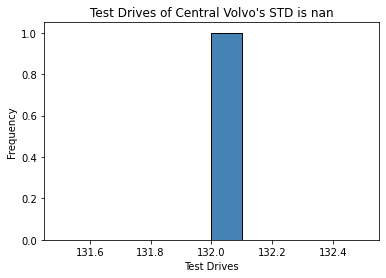

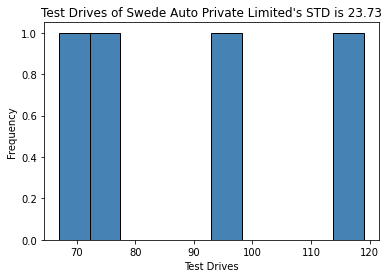

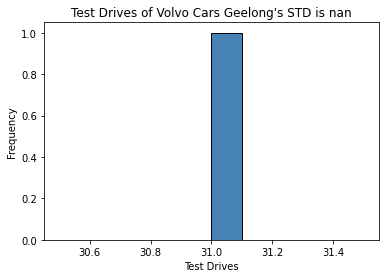

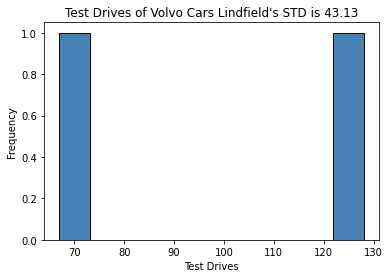

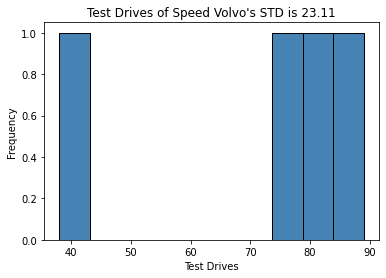

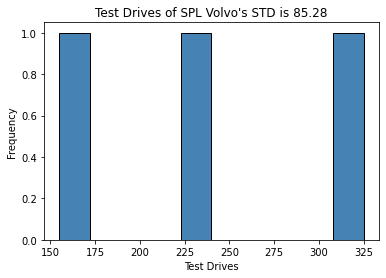

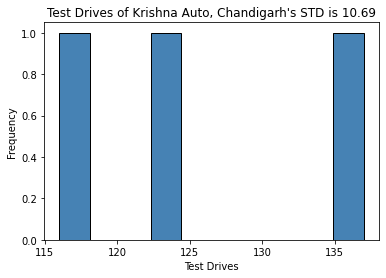

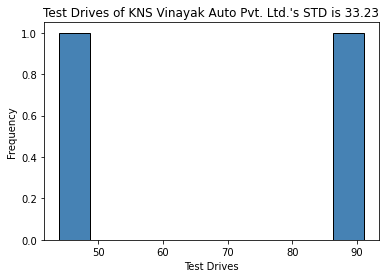

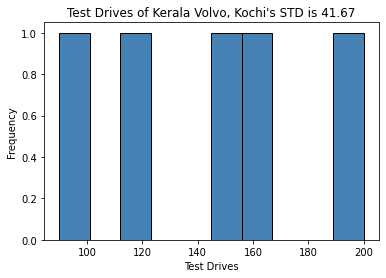

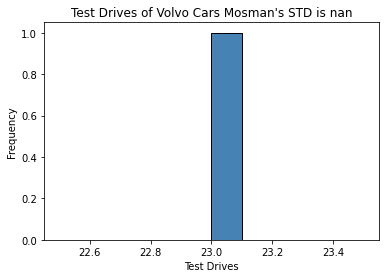

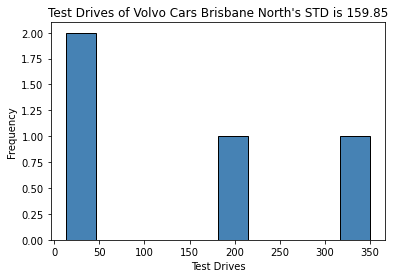

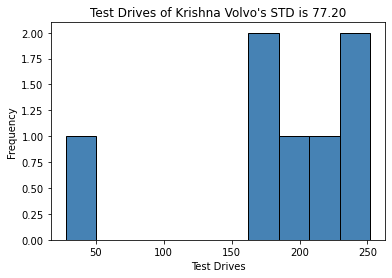

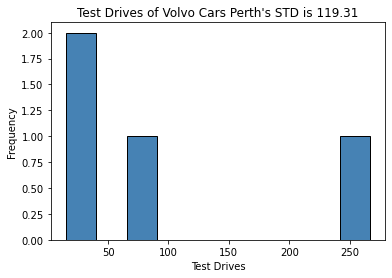

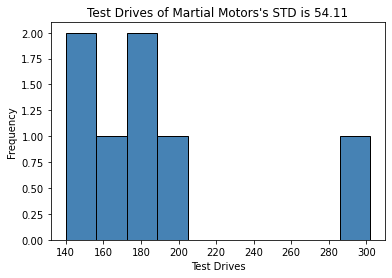

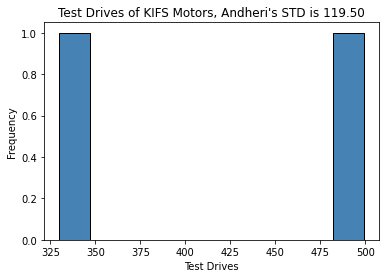

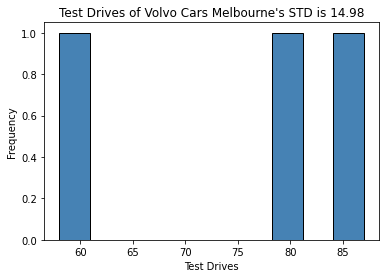

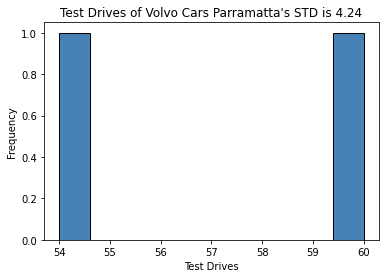

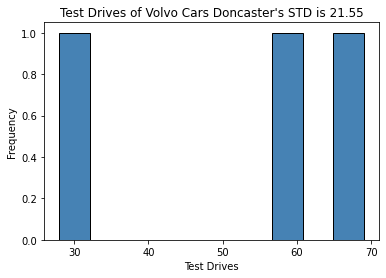

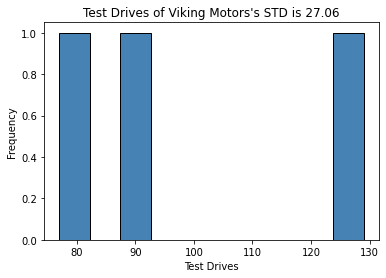

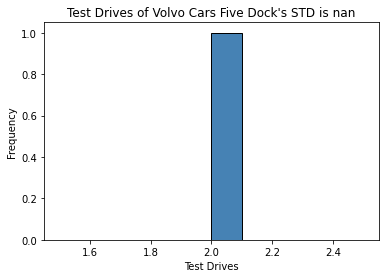

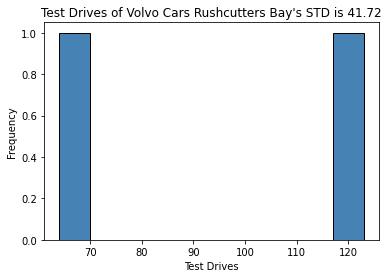

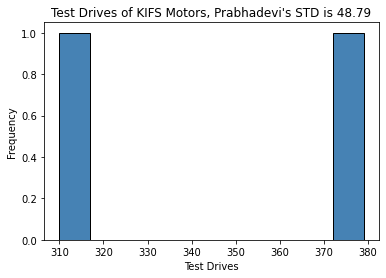

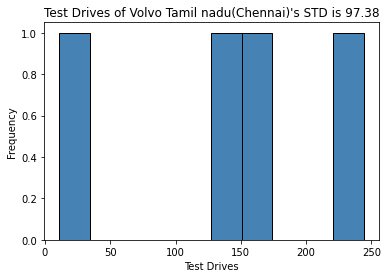

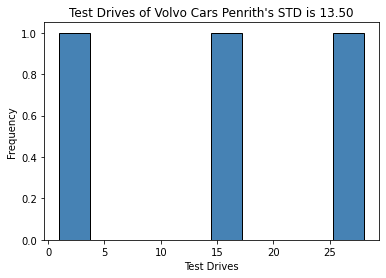

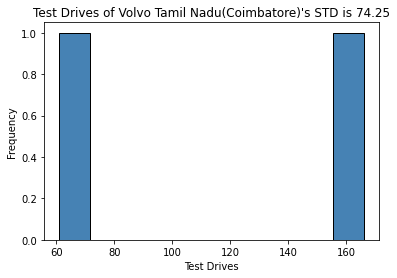

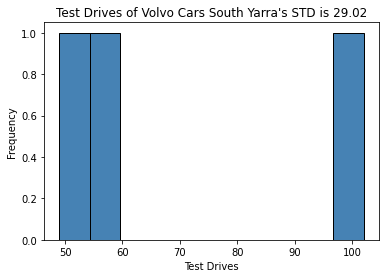

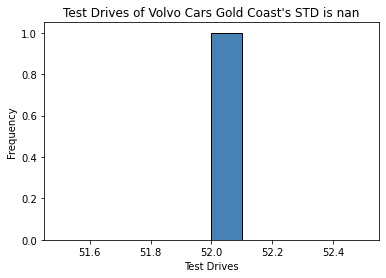

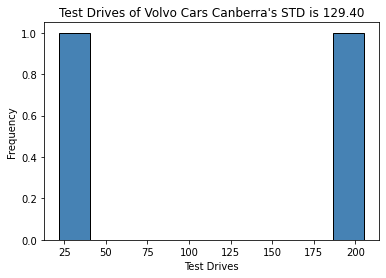

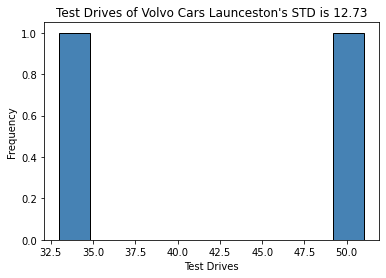

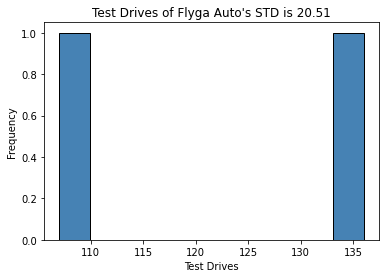

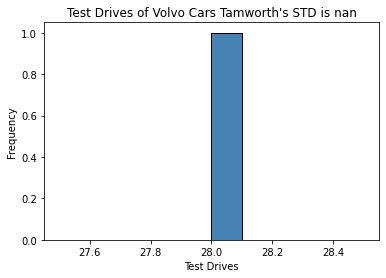

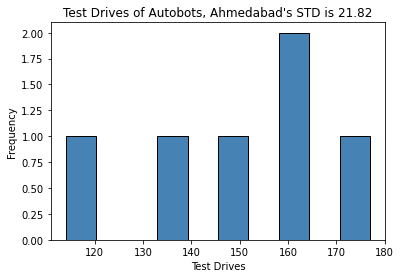

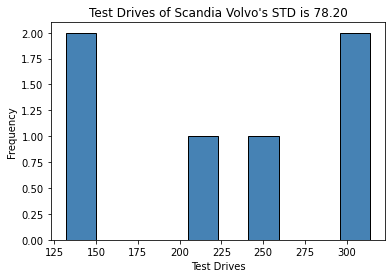

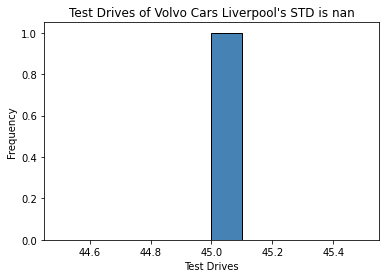

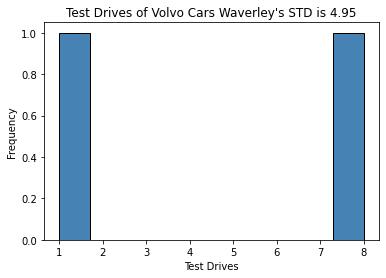

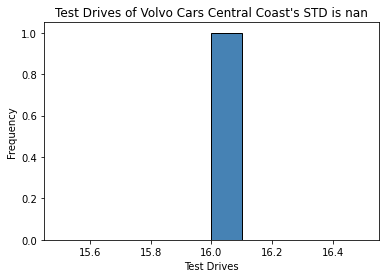

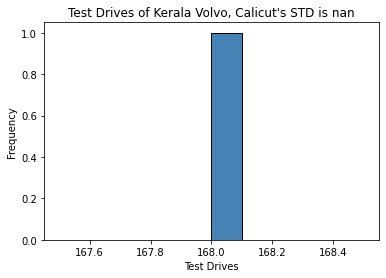

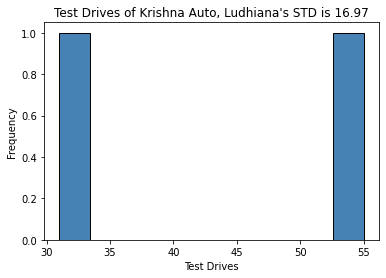

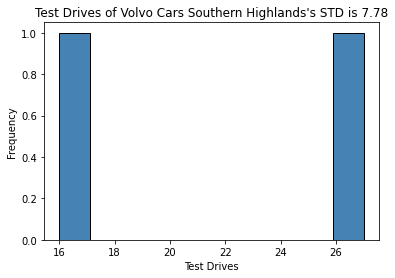

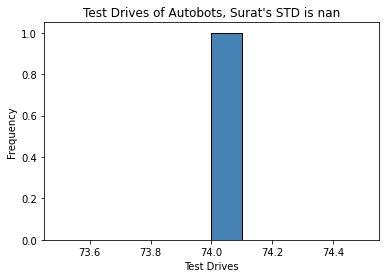

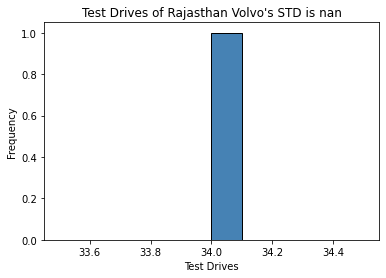

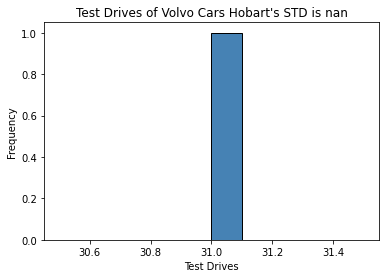

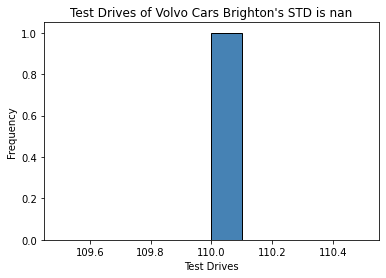

In [111]:
batch_plot_std(OP_TD_SALE_df, 'Test Drives', 'Dealer')

### 按Market维度统计Test Drives标准差
1. 按照MARKET分组计算Test Drives的标准差
2. 按照MARKET排序输出结果SD_TD_M_df

In [112]:
SD_TD_M = OP_TD_SALE_df.groupby(['MARKET'])['Test Drives'].std().round(2)
SD_TD_M.rename('SD_TD_M', inplace=True)
SD_TD_M_df = SD_TD_M.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_TD_M_df.sort_values('MARKET', inplace=True)
SD_TD_M_df

MARKET  SD_TD_M
0     AU    71.39
1     IN    91.58

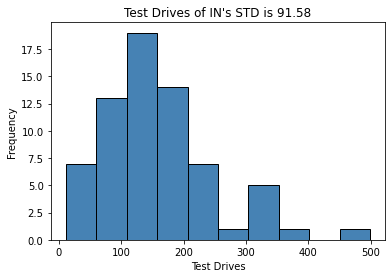

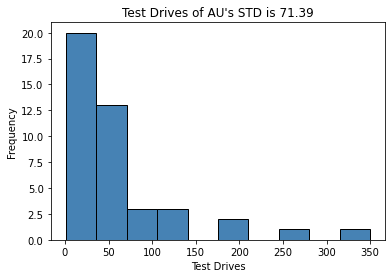

In [113]:
batch_plot_std(OP_TD_SALE_df, 'Test Drives', 'Market')

### 计算Opportunities to Test Drives Rate(%)和Course Rating的相关性
1. 按OP_TD_SALE_df.FederationIdentifier和course_rating_df.USER CODE内联得到CR_OPTDR_df
2. 输出结果CR_OPTDR_df
3. plot_r函数输出相关性图片并保存

In [114]:
CR_OPTDR_df = OP_TD_SALE_df.merge(course_rating_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CR_OPTDR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CR_OPTDR_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6054                 Speed Volvo             A-KAPOOR   
2      IN     6IN6048    Krishna Auto, Chandigarh             A-SHARM3   
3      IN     6IN6071               Krishna Volvo             C-KUMAR1   
4      IN     6IN6071               Krishna Volvo               E-PAUL   
5      IN     6IN6043  Swede Auto Private Limited             G-CHAWLA   
6      IN     6IN6072   Volvo Tamil nadu(Chennai)             G-RAGHUN   
7      IN     6IN6038         Kerala Volvo, Kochi             J-BRITTO   
8      IN     6IN6057               Scandia Volvo             M-KAUSHI   
9      IN     6IN6072   Volvo Tamil nadu(Chennai)                  M-S   
10     IN     6IN6058      Krishna Auto, Ludhiana              N-VERMA   
11     IN     6IN6043  Swede Auto Private Limited             P-CHOUDH   
12     IN     6IN6038         Kerala Volvo, Kochi             P-SREEDH   
13     IN     6IN6038         Kerala Volvo, Kochi             R-ABRAHA   
14     IN     6IN6071               Krishna Volvo                R-ALI   
15     AU     6AU3170         Volvo Cars Waverley             S-AITKEN   
16     IN     6IN6075             Rajasthan Volvo             S-BIDSER   
17     IN     6IN6061                   SPL Volvo               S-DAS4   
18     IN    6IN60431               Viking Motors             S-GUPTA6   
19     IN     6IN6071               Krishna Volvo             S-REDDYP   
20     IN     6IN6071               Krishna Volvo             S-RIYAZA   
21     IN     6IN6057               Scandia Volvo             S-SING11   
22     IN     6IN6071               Krishna Volvo             S-SINGH2   
23     IN     6IN6054                 Speed Volvo             T-BHATIA   
24     IN     6IN6038         Kerala Volvo, Kochi                  U-R   
25     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
26     IN     6IN6045              Martial Motors                 V-MP   

    Test Drives Min Opportunity Time_x START DATE_x  Opportunities  \
0           132    2020-11-23 00:00:00   2019-08-06            211   
1            89    2020-12-12 09:35:52   2019-06-20            109   
2           137    2021-01-15 04:53:55   2019-07-16            176   
3           173    2021-08-30 08:07:05   2021-08-28            253   
4           192    2020-12-21 04:30:48   2019-06-20            350   
5           119    2020-12-12 11:45:38   2019-05-22            178   
6           170    2021-06-25 05:22:37   2021-05-21            351   
7           200    2020-12-11 11:16:30   2019-08-01            328   
8           314    2020-12-11 12:04:21   2019-08-02            480   
9           130    2022-01-30 11:42:52   2022-01-26            145   
10           31    2022-02-10 06:54:18   2022-01-19             48   
11           98    2020-12-11 05:57:12   2019-08-12            127   
12          154    2020-12-18 05:45:40   2019-10-19            271   
13          119    2021-07-29 07:22:47   2021-07-22            172   
14          250    2020-12-02 00:00:00   2019-06-20            391   
15            8    2021-11-22 02:08:23   2021-07-22            115   
16           34    2022-01-24 08:32:16   2022-01-19             58   
17          325    2020-12-18 06:58:32   2019-08-02            411   
18          129    2020-12-13 05:36:29   2020-02-11            258   
19          228    2021-07-08 09:36:23   2021-07-06            398   
20          166    2021-08-30 13:37:38   2021-08-28            219   
21          307    2020-09-09 00:00:00   2019-05-17            444   
22          252    2020-12-04 00:00:00   2019-06-20            445   
23           83    2022-01-21 09:23:23   2022-01-19            103   
24          157    2021-09-17 12:17:51   2021-09-08            191   
25          310    2021-03-13 11:30:40   2021-03-11            323   
26          160    2022-02-03 08:57:04  

In [115]:
plot_r(CR_OPTDR_df, 'Course Rating vs Opportunities to Test Drive Rate(%)', 'Course Rating', 'Opportunities to Test Drive Rate(%)', 'Course Rating vs Opportunities to Test Drive Rate(%)')

### 计算Opportunities to Test Drives Rate(%)和Course Completion的相关性
1. 按OP_TD_SALE_df.FederationIdentifier和complement_df.CDSID内联得到CC_OPTDR_df
2. 输出结果CC_OPTDR_df
3. plot_r函数输出相关性图片并保存

In [116]:
CC_OPTDR_df = OP_TD_SALE_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
CC_OPTDR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CC_OPTDR_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0       IN     6IN6060               Central Volvo             A-ARORA2   
1       IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2       AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3       AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4       IN     6IN6054                 Speed Volvo             A-KAPOOR   
..     ...         ...                         ...                  ...   
106     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
107     IN     6IN6045              Martial Motors                 V-MP   
108     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
109     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
110     IN     6IN6045              Martial Motors                  Y-A   

     Test Drives Min Opportunity Time_x START DATE_x  Opportunities  \
0            132    2020-11-23 00:00:00   2019-08-06            211   
1             74    2022-01-25 09:18:41   2022-01-18             99   
2             31    2021-09-14 01:28:10   2021-08-25            136   
3            128    2021-10-23 00:56:04   2020-03-12            379   
4             89    2020-12-12 09:35:52   2019-06-20            109   
..           ...                    ...          ...            ...   
106          310    2021-03-13 11:30:40   2021-03-11            323   
107          160    2022-02-03 08:57:04   2022-01-19            176   
108          188    2021-02-05 07:10:14   2020-03-11            623   
109          110    2021-12-22 23:29:34   2021-12-21            207   
110          173    2022-01-31 06:50:11   2022-01-22            216   

    Min Opportunity Time_y START DATE_y  Opportunities to Test Drive Rate(%)  \
0      2020-10-17 00:00:00   2019-08-06                                62.56   
1      2022-01-25 09:18:41   2022-01-18                                74.75   
2      2021-08-26 23:15:24   2021-08-25                                22.79   
3      2021-03-28 00:00:00   2020-03-12                                33.77   
4      2020-10-25 00:00:00   2019-06-20                                81.65   
..                     ...          ...                                  ...   
106    2021-03-13 11:30:40   2021-03-11                                95.98   
107    2022-01-31 06:37:31   2022-01-19                                90.91   
108    2021-02-01 06:34:03   2020-03-11                                30.18   
109    2021-12-22 23:29:34   2021-12-21                                53.14   
110    2022-01-24 07:06:46   2022-01-22                                80.09   

      MARKET_y DEALER CODE_y                   DEALER_y     CDSID   ALL  \
0        INDIA       6IN6060                     Indore  A-ARORA2  30.0   
1        INDIA       6IN6043                   Gurugram  A-BISHT1  30.0   
2    AUSTRALIA       6AU3222         Volvo Cars Geelong  A-BOYLE2  30.0   
3    AUSTRALIA       6AU2068       Volvo Cars Lindfield  A-FRASER  30.0   
4        INDIA       6IN6054                    Lucknow  A-KAPOOR  30.0   
..         ...           ...                        ...       ...   ...   
106      INDIA     6IN6049S2                 Prabhadevi  V-KHATRI  30.0   
107      INDIA       6IN6045                  Bangalore      V-MP  30.0   
108  AUSTRALIA       6AU4008  Volvo Cars Brisbane North    W-BASS  30.0   
109  AUSTRALIA       6AU3187        Volvo Cars Brighton   W-WONG5  30.0   
110      INDIA       6IN6045                  Bangalore       Y-A  30.0   

     Course Completion START DATE  Sales Learning Programme Completion(%)  
0                 23.0 2019-08-06                                   76.67  
1                 23.0 2022-01-18                                   76.67  
2                 23.0 2021-08-25                                   76.67  
3                  7.0 2020-03-12                                   23.33  
4       

In [117]:
plot_r(CC_OPTDR_df, 'Course Completion vs Opportunities to Test Drive Rate(%)', 'Course Completion', 'Opportunities to Test Drive Rate(%)', 'Course Completion vs Opportunities to Test Drive Rate(%)')

### 计算Opportunities to Test Drives Rate(%)和Course Post-Test Score的相关性
1. 按OP_TD_SALE_df.FederationIdentifier和assessment_df.USER CODE内联得到CPT_OPTDR_df
2. 输出结果CPT_OPTDR_df
3. plot_r函数输出相关性图片并保存

In [118]:
CPT_OPTDR_df = OP_TD_SALE_df.merge(assessment_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CPT_OPTDR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CPT_OPTDR_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      AU     6AU2088           Volvo Cars Mosman             B-AMBRO3   
1      AU     6AU4008   Volvo Cars Brisbane North             B-GUNNI1   
2      AU     6AU4008   Volvo Cars Brisbane North             B-PA1000   
3      AU     6AU3206        Volvo Cars Melbourne             D-DIMAR1   
4      AU     6AU3206        Volvo Cars Melbourne             D-TAYL12   
5      AU     6AU3107        Volvo Cars Doncaster              D-ZERBI   
6      AU     6AU3107        Volvo Cars Doncaster               E-CHOW   
7      AU     6AU2040        Volvo Cars Five Dock              F-MILLS   
8      AU     6AU2014  Volvo Cars Rushcutters Bay              F-MILLS   
9      AU     6AU3112      Volvo Cars South Yarra             J-DAWSO1   
10     AU     6AU4213       Volvo Cars Gold Coast             J-FERGU3   
11     AU     6AU2014  Volvo Cars Rushcutters Bay               J-MA36   
12     AU     6AU7254       Volvo Cars Launceston             J-PEARC2   
13     AU     6AU2156       Volvo Cars Parramatta             L-LARKI1   
14     AU     6AU3112      Volvo Cars South Yarra             M-CHRAP1   
15     AU     6AU7254       Volvo Cars Launceston              M-DEAN1   
16     AU     6AU3112      Volvo Cars South Yarra             M-MOOR12   
17     AU     6AU3107        Volvo Cars Doncaster              O-SMITH   
18     AU     6AU3206        Volvo Cars Melbourne             S-AGRAWA   
19     AU     6AU3170         Volvo Cars Waverley             S-AITKEN   
20     AU     6AU2605         Volvo Cars Canberra             S-COLLI2   
21     AU     6AU2068        Volvo Cars Lindfield             T-BEAUMO   
22     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
23     AU     6AU3187         Volvo Cars Brighton              W-WONG5   

    Test Drives Min Opportunity Time_x START DATE_x  Opportunities  \
0            23    2021-11-22 00:00:36   2021-03-15            156   
1           350    2021-02-02 01:59:54   2019-08-09           1021   
2            21    2021-02-20 06:28:23   2019-05-20             41   
3            87    2021-08-12 03:48:52   2019-07-19            483   
4            58    2021-11-20 04:50:42   2019-07-04            353   
5            69    2021-09-17 07:45:34   2020-02-10            207   
6            28    2022-02-21 04:33:51   2021-07-26            187   
7             2    2022-01-15 00:17:18   2020-08-22              2   
8           123    2021-10-22 22:00:44   2020-08-22            567   
9            49    2021-04-07 02:01:15   2020-01-28            273   
10           52    2021-09-10 01:33:14   2021-08-26            119   
11           64    2022-01-08 05:27:01   2020-03-21            165   
12           51    2021-10-21 06:14:12   2021-06-28             84   
13           54    2022-01-12 01:07:30   2020-03-12            170   
14           55    2022-03-21 04:27:59   2021-07-16            369   
15           33    2021-04-08 07:16:16   2020-10-15            154   
16          102    2021-11-11 05:32:52   2021-07-28            306   
17           60    2021-09-10 05:57:21   2021-03-12            223   
18           79    2021-12-01 23:29:28   2019-07-08            434   
19            8    2021-11-22 02:08:23   2021-07-22            115   
20          205    2021-07-20 01:18:04   2020-09-29            451   
21           67    2021-10-05 07:47:26   2020-12-17            335   
22          188    2021-02-05 07:10:14   2020-03-11            623   
23          110    2021-12-22 23:29:34   2021-12-21            207   

   Min Opportunity Time_y START DATE_y  ...   LAST NAME FIRST NAME USER CODE  \
0     2021-04-21 06:46:56   2021-03-15  ...     Ambrose        Ben  B-AMBRO3   
1     2021-02-01 02:59:03   2019-08-09  ...      Gunnis       Bill  B-GUNNI1   
2     2021-02-08 04:54:02   2019-05-20  ...      Palmer      Brett  B-PA1000   
3     2021-04-26 06:05:55   2019-07-19  ...  Di Martino    Domenic  D-DIMAR1   
4

In [119]:
plot_r(CPT_OPTDR_df, 'Course Post-Test Score vs Opportunities to Test Drive Rate(%)', 'Course Post-Test Score', 'Opportunities to Test Drive Rate(%)', 'Course Post-Test Score vs Opportunities to Test Drive Rate(%)')

### 计算Opportunities to Test Drives Rate(%)和Sales Learning Programme Completion的相关性
1. 按OP_TD_SALE_df.FederationIdentifier和complement_df.CDSID内联得到SLPC_OPTDR_df
2. 输出结果SLPC_OPTDR_df
3. plot_r函数输出相关性图片并保存

In [120]:
SLPC_OPTDR_df = OP_TD_SALE_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
SLPC_OPTDR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
SLPC_OPTDR_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0       IN     6IN6060               Central Volvo             A-ARORA2   
1       IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2       AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3       AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4       IN     6IN6054                 Speed Volvo             A-KAPOOR   
..     ...         ...                         ...                  ...   
106     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
107     IN     6IN6045              Martial Motors                 V-MP   
108     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
109     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
110     IN     6IN6045              Martial Motors                  Y-A   

     Test Drives Min Opportunity Time_x START DATE_x  Opportunities  \
0            132    2020-11-23 00:00:00   2019-08-06            211   
1             74    2022-01-25 09:18:41   2022-01-18             99   
2             31    2021-09-14 01:28:10   2021-08-25            136   
3            128    2021-10-23 00:56:04   2020-03-12            379   
4             89    2020-12-12 09:35:52   2019-06-20            109   
..           ...                    ...          ...            ...   
106          310    2021-03-13 11:30:40   2021-03-11            323   
107          160    2022-02-03 08:57:04   2022-01-19            176   
108          188    2021-02-05 07:10:14   2020-03-11            623   
109          110    2021-12-22 23:29:34   2021-12-21            207   
110          173    2022-01-31 06:50:11   2022-01-22            216   

    Min Opportunity Time_y START DATE_y  Opportunities to Test Drive Rate(%)  \
0      2020-10-17 00:00:00   2019-08-06                                62.56   
1      2022-01-25 09:18:41   2022-01-18                                74.75   
2      2021-08-26 23:15:24   2021-08-25                                22.79   
3      2021-03-28 00:00:00   2020-03-12                                33.77   
4      2020-10-25 00:00:00   2019-06-20                                81.65   
..                     ...          ...                                  ...   
106    2021-03-13 11:30:40   2021-03-11                                95.98   
107    2022-01-31 06:37:31   2022-01-19                                90.91   
108    2021-02-01 06:34:03   2020-03-11                                30.18   
109    2021-12-22 23:29:34   2021-12-21                                53.14   
110    2022-01-24 07:06:46   2022-01-22                                80.09   

      MARKET_y DEALER CODE_y                   DEALER_y     CDSID   ALL  \
0        INDIA       6IN6060                     Indore  A-ARORA2  30.0   
1        INDIA       6IN6043                   Gurugram  A-BISHT1  30.0   
2    AUSTRALIA       6AU3222         Volvo Cars Geelong  A-BOYLE2  30.0   
3    AUSTRALIA       6AU2068       Volvo Cars Lindfield  A-FRASER  30.0   
4        INDIA       6IN6054                    Lucknow  A-KAPOOR  30.0   
..         ...           ...                        ...       ...   ...   
106      INDIA     6IN6049S2                 Prabhadevi  V-KHATRI  30.0   
107      INDIA       6IN6045                  Bangalore      V-MP  30.0   
108  AUSTRALIA       6AU4008  Volvo Cars Brisbane North    W-BASS  30.0   
109  AUSTRALIA       6AU3187        Volvo Cars Brighton   W-WONG5  30.0   
110      INDIA       6IN6045                  Bangalore       Y-A  30.0   

     Course Completion START DATE  Sales Learning Programme Completion(%)  
0                 23.0 2019-08-06                                   76.67  
1                 23.0 2022-01-18                                   76.67  
2                 23.0 2021-08-25                                   76.67  
3                  7.0 2020-03-12                                   23.33  
4       

In [121]:
plot_r(SLPC_OPTDR_df, 'Sales Learning Programme Completion(%) vs Opportunities to Test Drive Rate(%)', 'Sales Learning Programme Completion(%)', 'Opportunities to Test Drive Rate(%)', 'Sales Learning Programme Completion(%) vs Opportunities to Test Drive Rate(%)')

## 计算Opportunities to Retail Orders Rate(%)
1. OR_SALE_COUNT_df和OP_SALE_COUNT_df内联得到OP_RO_SALE_df
2. Opportunities to Retail Orders Rate(%) = Retail Orders / Opportunities * 100%

In [122]:
OP_RO_SALE_df = OR_SALE_COUNT_df.merge(OP_SALE_COUNT_df, left_on=['MARKET', 'DEALER CODE', 'DEALER', 'FederationIdentifier'], right_on=['MARKET', 'DEALER CODE', 'DEALER', 'FederationIdentifier'], how='inner')
OP_RO_SALE_df['Opportunities to Retail Orders Rate(%)'] = round(OP_RO_SALE_df['Retail Orders'] / OP_RO_SALE_df['Opportunities'] * 100, 2)
OP_RO_SALE_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0       IN     6IN6060               Central Volvo             A-ARORA2   
1       IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2       AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3       AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4       IN     6IN6054                 Speed Volvo             A-KAPOOR   
..     ...         ...                         ...                  ...   
107     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
108     IN     6IN6045              Martial Motors                 V-MP   
109     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
110     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
111     IN     6IN6045              Martial Motors                  Y-A   

     Retail Orders Min Opportunity Time_x START DATE_x  Opportunities  \
0               24    2020-10-26 00:00:00   2019-08-06            211   
1                9    2022-02-11 08:33:08   2022-01-18             99   
2               58    2021-09-21 03:34:51   2021-08-25            136   
3              140    2021-04-27 22:47:34   2020-03-12            379   
4               22    2021-01-29 10:24:12   2019-06-20            109   
..             ...                    ...          ...            ...   
107             41    2021-03-13 11:30:40   2021-03-11            323   
108              7    2022-02-18 08:31:31   2022-01-19            176   
109            171    2021-02-02 07:35:27   2020-03-11            623   
110            112    2021-12-22 23:29:34   2021-12-21            207   
111             16    2022-01-31 06:50:11   2022-01-22            216   

    Min Opportunity Time_y START DATE_y  \
0      2020-10-17 00:00:00   2019-08-06   
1      2022-01-25 09:18:41   2022-01-18   
2      2021-08-26 23:15:24   2021-08-25   
3      2021-03-28 00:00:00   2020-03-12   
4      2020-10-25 00:00:00   2019-06-20   
..                     ...          ...   
107    2021-03-13 11:30:40   2021-03-11   
108    2022-01-31 06:37:31   2022-01-19   
109    2021-02-01 06:34:03   2020-03-11   
110    2021-12-22 23:29:34   2021-12-21   
111    2022-01-24 07:06:46   2022-01-22   

     Opportunities to Retail Orders Rate(%)  
0                                     11.37  
1                                      9.09  
2                                     42.65  
3                                     36.94  
4                                     20.18  
..                                      ...  
107                                   12.69  
108                                    3.98  
109                                   27.45  
110                                   54.11  
111                                    7.41  

[112 rows x 11 columns]

In [123]:
OP_OR_UI_df.groupby('opportunity_id').count()['order_id'].sort_values(ascending=False)

opportunity_id
0062w00000D3F1LAAV    4
0062w00000Bu5kcAAB    2
0062w00000CNL6lAAH    2
0062w00000DukilAAB    2
0062w00000CPqwPAAT    2
                     ..
0062w00000B8vxtAAB    1
0062w00000B8vtwAAB    1
0062w00000B8vFIAAZ    1
0062w00000B8vE6AAJ    1
0062w00000EtbBAAAZ    1
Name: order_id, Length: 8393, dtype: int64

### 按Dealer维度统计Opportunities to Retail Orders Rate(%)标准差
1. 按照MARKET, DEALER CODE, DEALER分组计算Opportunities to Retail Orders Rate(%)的标准差
2. 按照DEALER排序输出结果SD_RO_D_df

In [125]:
SD_OPROR_D = OP_RO_SALE_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Opportunities to Retail Orders Rate(%)'].std().round(2)
SD_OPROR_D.rename('SD_OPROR_D', inplace=True)
SD_OPROR_D_df = SD_OPROR_D.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_OPROR_D_df.sort_values('DEALER', inplace=True)
SD_OPROR_D_df

MARKET DEALER CODE                         DEALER  SD_OPROR_D
26     IN     6IN6044            Autobots, Ahmedabad        9.52
27     IN    6IN60441                Autobots, Surat         NaN
37     IN     6IN6060                  Central Volvo         NaN
33     IN     6IN6056                     Flyga Auto        3.62
30     IN     6IN6049           KIFS Motors, Andheri        1.67
31     IN   6IN6049S2        KIFS Motors, Prabhadevi        0.33
36     IN     6IN6059     KNS Vinayak Auto Pvt. Ltd.        1.61
23     IN    6IN60381          Kerala Volvo, Calicut         NaN
22     IN     6IN6038            Kerala Volvo, Kochi        3.24
29     IN     6IN6048       Krishna Auto, Chandigarh        2.70
35     IN     6IN6058         Krishna Auto, Ludhiana        8.64
39     IN     6IN6071                  Krishna Volvo        3.66
28     IN     6IN6045                 Martial Motors        1.71
42     IN     6IN6075                Rajasthan Volvo         NaN
38     IN     6IN6061                      SPL Volvo        9.95
34     IN     6IN6057                  Scandia Volvo        1.84
32     IN     6IN6054                    Speed Volvo        3.78
24     IN     6IN6043     Swede Auto Private Limited       12.50
25     IN    6IN60431                  Viking Motors        4.79
14     AU     6AU3187            Volvo Cars Brighton         NaN
17     AU     6AU4008      Volvo Cars Brisbane North       13.96
9      AU     6AU2605            Volvo Cars Canberra       13.39
6      AU     6AU2251       Volvo Cars Central Coast         NaN
11     AU     6AU3107           Volvo Cars Doncaster        9.37
1      AU     6AU2040           Volvo Cars Five Dock         NaN
16     AU     6AU3222             Volvo Cars Geelong         NaN
18     AU     6AU4213          Volvo Cars Gold Coast         NaN
20     AU     6AU7004              Volvo Cars Hobart         NaN
21     AU     6AU7254          Volvo Cars Launceston       11.25
2      AU     6AU2068           Volvo Cars Lindfield        6.81
5      AU     6AU2173           Volvo Cars Liverpool         NaN
15     AU     6AU3206           Volvo Cars Melbourne        7.29
3      AU     6AU2088              Volvo Cars Mosman         NaN
4      AU     6AU2156          Volvo Cars Parramatta       18.17
10     AU     6AU2754             Volvo Cars Penrith       41.17
19     AU     6AU6017               Volvo Cars Perth       15.92
0      AU     6AU2014     Volvo Cars Rushcutters Bay       15.82
12     AU     6AU3112         Volvo Cars South Yarra       11.76
8      AU     6AU2581  Volvo Cars Southern Highlands        0.74
7      AU     6AU2342            Volvo Cars Tamworth         NaN
13     AU     6AU3170            Volvo Cars Waverley       67.02
41     IN     6IN6073   Volvo Tamil Nadu(Coimbatore)        1.34
40     IN     6IN6072      Volvo Tamil nadu(Chennai)        2.16

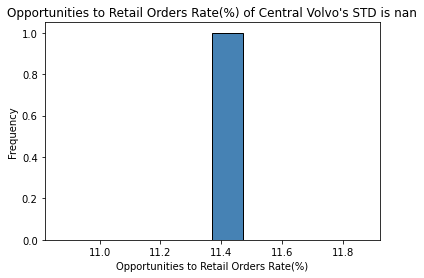

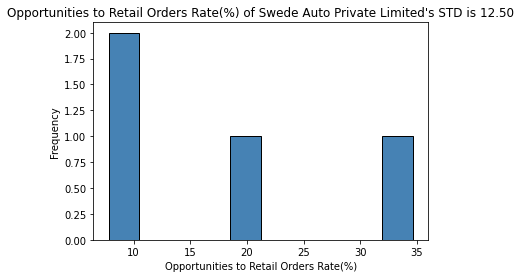

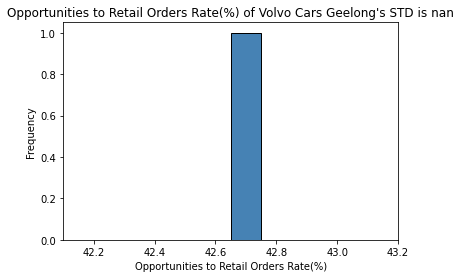

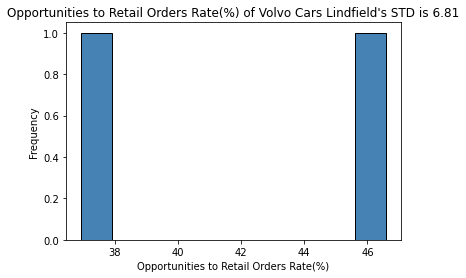

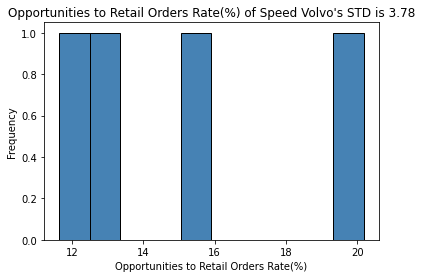

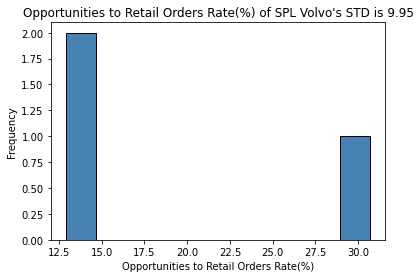

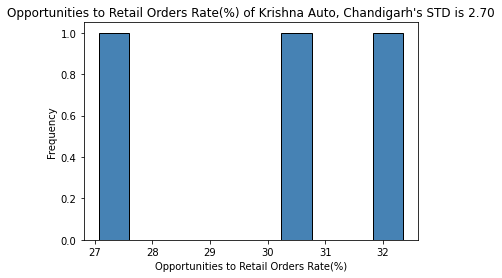

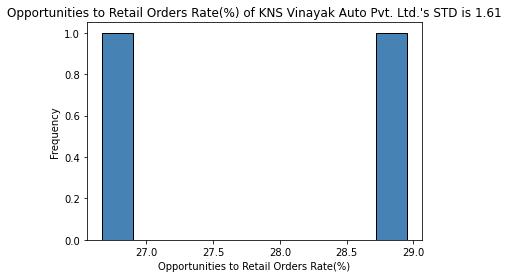

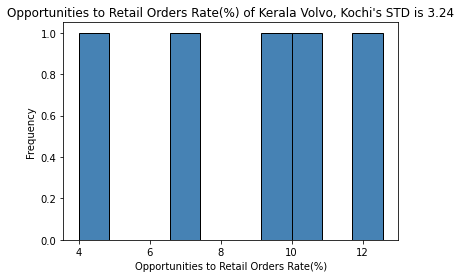

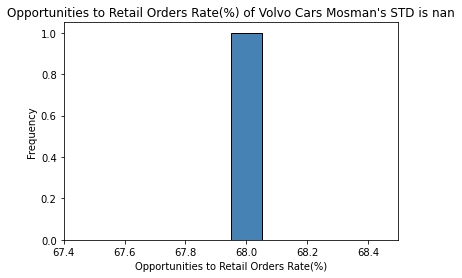

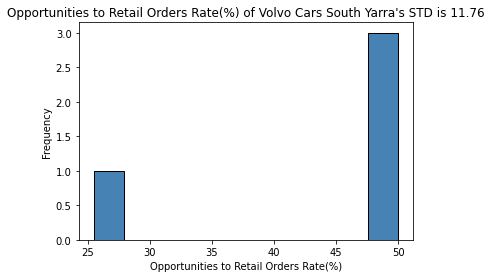

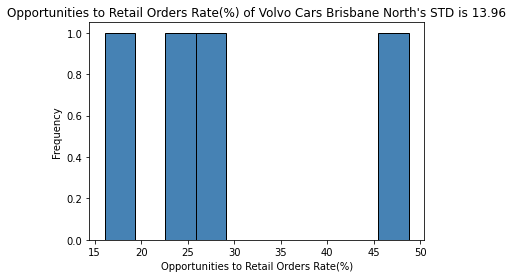

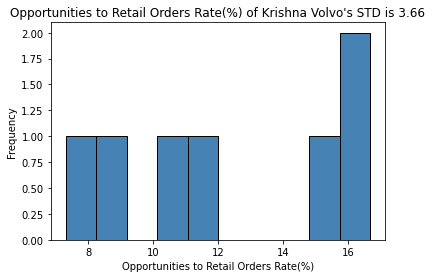

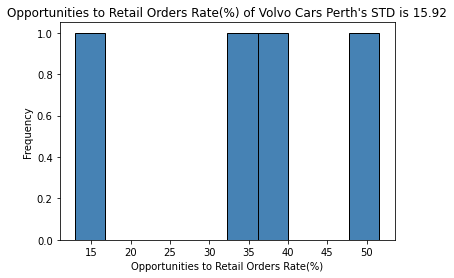

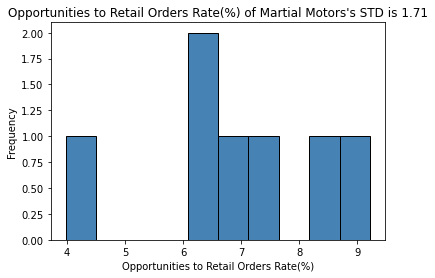

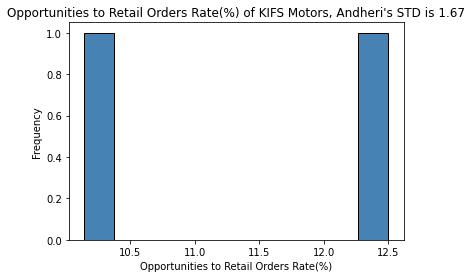

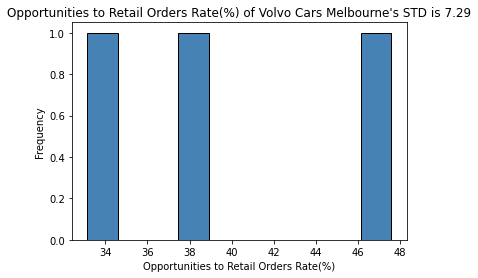

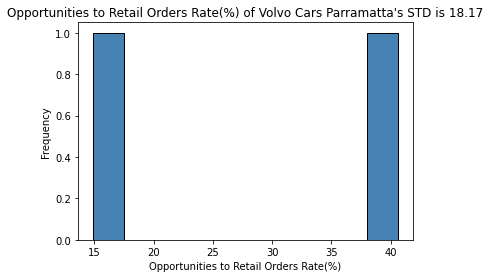

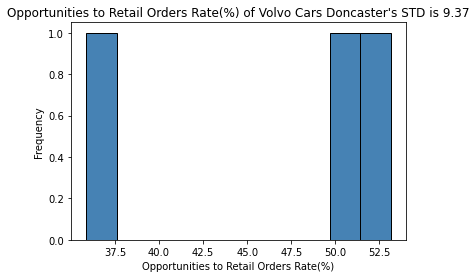

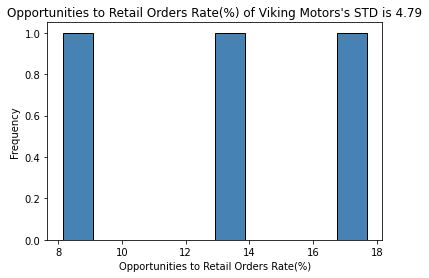

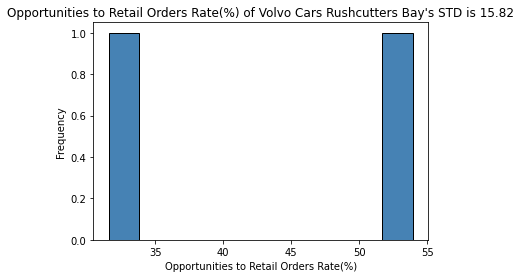

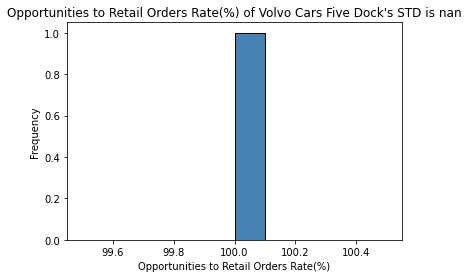

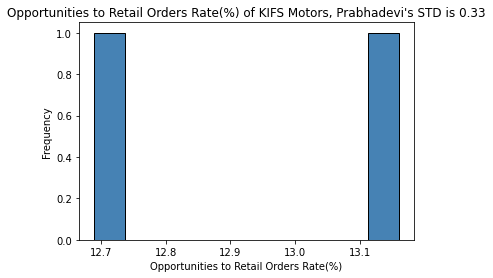

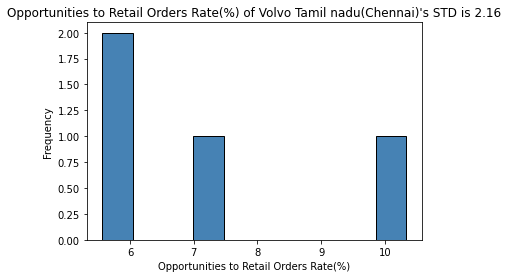

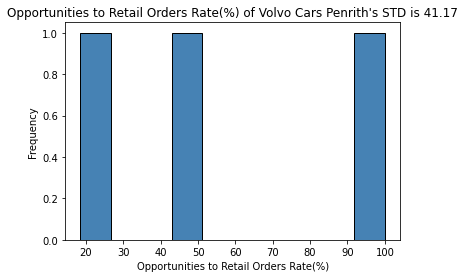

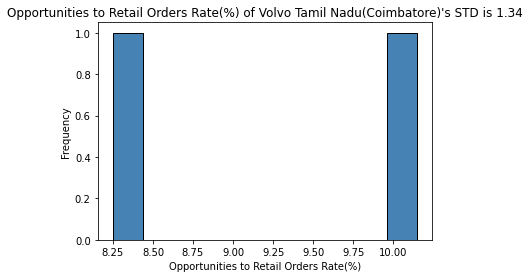

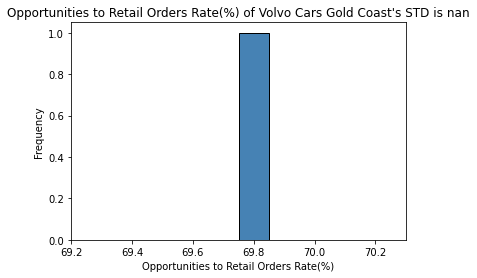

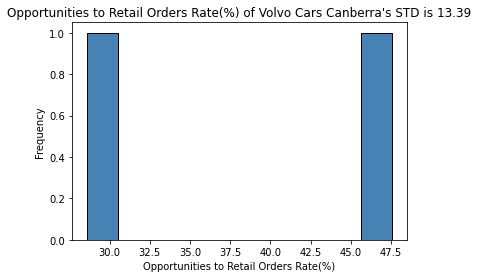

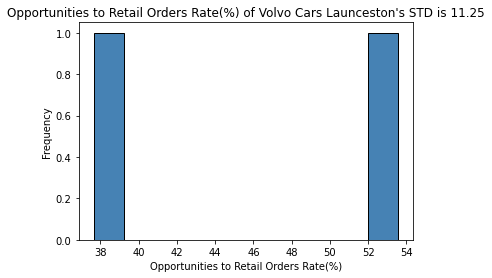

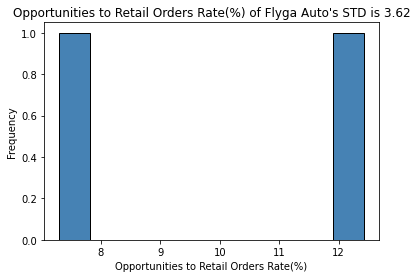

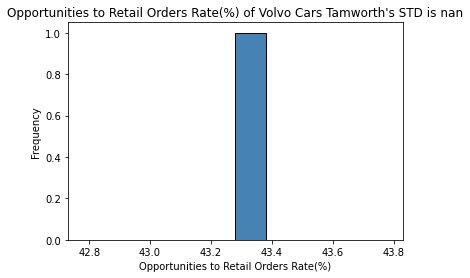

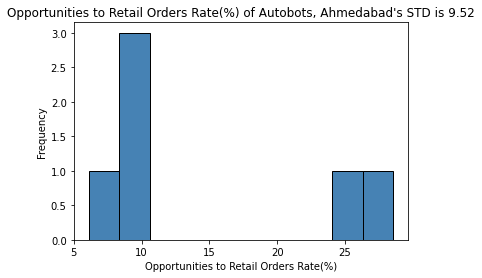

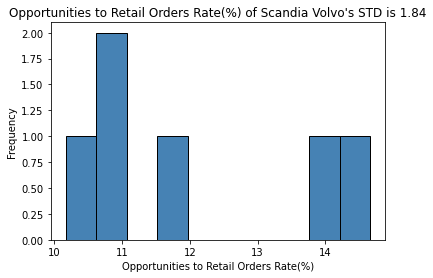

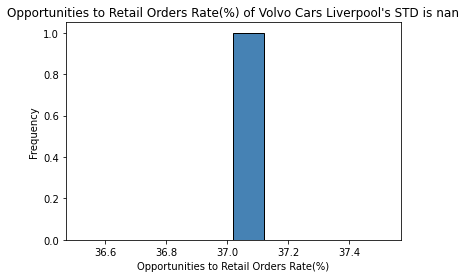

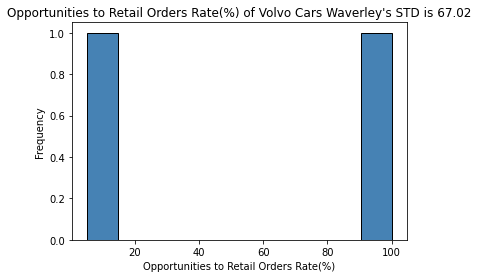

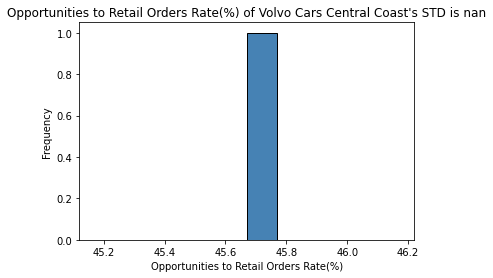

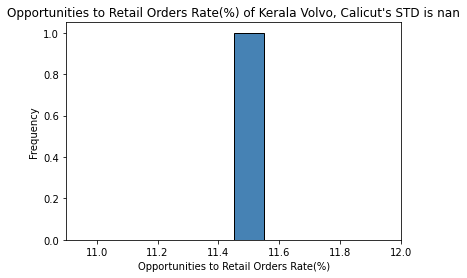

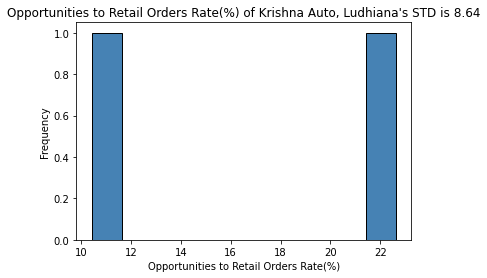

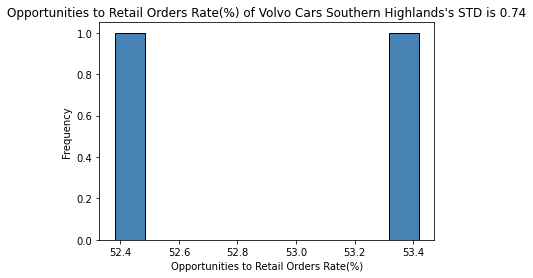

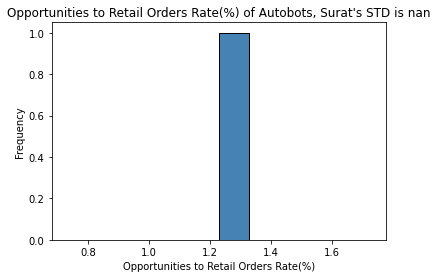

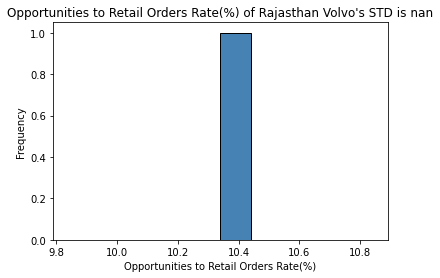

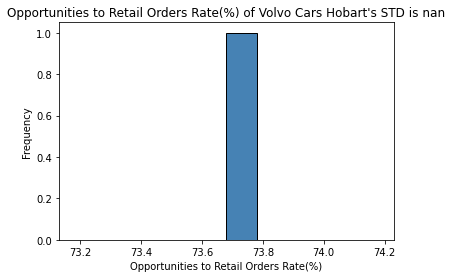

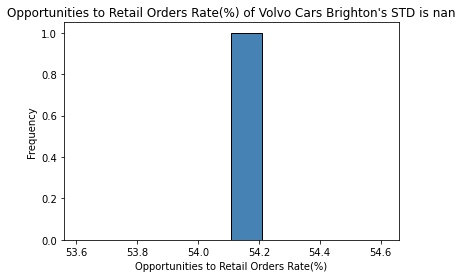

In [126]:
batch_plot_std(OP_RO_SALE_df, 'Opportunities to Retail Orders Rate(%)', 'Dealer')

### 按Market维度统计Opportunities to Retail Orders Rate(%)标准差
1. 按照MARKET分组计算Opportunities to Retail Orders Rate(%)的标准差
2. 按照MARKET排序输出结果SD_OPROR_M_df

In [127]:
SD_OPROR_M = OP_RO_SALE_df.groupby(['MARKET'])['Opportunities to Retail Orders Rate(%)'].std().round(2)
SD_OPROR_M.rename('SD_OPROR_M', inplace=True)
SD_OPROR_M_df = SD_OPROR_M.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_OPROR_M_df.sort_values('MARKET', inplace=True)
SD_OPROR_M_df

MARKET  SD_OPROR_M
0     AU       21.00
1     IN        7.52

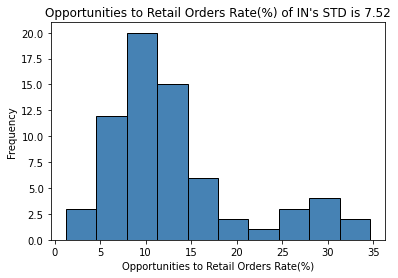

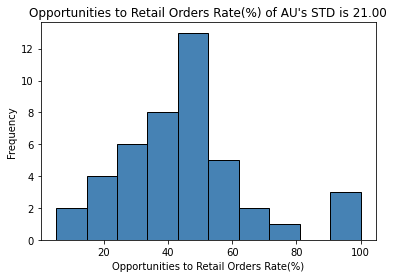

In [128]:
batch_plot_std(OP_RO_SALE_df, 'Opportunities to Retail Orders Rate(%)', 'Market')

### 计算Opportunities to Retail Orders Rate(%)和Course Rating的相关性
1. 按OP_TD_SALE_df.FederationIdentifier和course_rating_df.USER CODE内联得到CR_OPROR_df
2. 输出结果CR_OPTDR_df
3. plot_r函数输出相关性图片并保存

In [129]:
CR_OPROR_df = OP_RO_SALE_df.merge(course_rating_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CR_OPROR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CR_OPROR_df


MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6054                 Speed Volvo             A-KAPOOR   
2      IN     6IN6048    Krishna Auto, Chandigarh             A-SHARM3   
3      IN     6IN6071               Krishna Volvo             C-KUMAR1   
4      IN     6IN6071               Krishna Volvo               E-PAUL   
5      IN     6IN6043  Swede Auto Private Limited             G-CHAWLA   
6      IN     6IN6072   Volvo Tamil nadu(Chennai)             G-RAGHUN   
7      IN     6IN6038         Kerala Volvo, Kochi             J-BRITTO   
8      IN     6IN6057               Scandia Volvo             M-KAUSHI   
9      IN     6IN6072   Volvo Tamil nadu(Chennai)                  M-S   
10     IN     6IN6058      Krishna Auto, Ludhiana              N-VERMA   
11     IN     6IN6043  Swede Auto Private Limited             P-CHOUDH   
12     IN     6IN6038         Kerala Volvo, Kochi             P-SREEDH   
13     IN     6IN6038         Kerala Volvo, Kochi             R-ABRAHA   
14     IN     6IN6071               Krishna Volvo                R-ALI   
15     AU     6AU3170         Volvo Cars Waverley             S-AITKEN   
16     IN     6IN6075             Rajasthan Volvo             S-BIDSER   
17     IN     6IN6061                   SPL Volvo               S-DAS4   
18     IN    6IN60431               Viking Motors             S-GUPTA6   
19     IN     6IN6071               Krishna Volvo             S-REDDYP   
20     IN     6IN6071               Krishna Volvo             S-RIYAZA   
21     IN     6IN6057               Scandia Volvo             S-SING11   
22     IN     6IN6071               Krishna Volvo             S-SINGH2   
23     IN     6IN6054                 Speed Volvo             T-BHATIA   
24     IN     6IN6038         Kerala Volvo, Kochi                  U-R   
25     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
26     IN     6IN6045              Martial Motors                 V-MP   

    Retail Orders Min Opportunity Time_x START DATE_x  Opportunities  \
0              24    2020-10-26 00:00:00   2019-08-06            211   
1              22    2021-01-29 10:24:12   2019-06-20            109   
2              54    2020-11-23 00:00:00   2019-07-16            176   
3              30    2021-09-03 07:30:37   2021-08-28            253   
4              53    2020-11-25 00:00:00   2019-06-20            350   
5              37    2020-10-29 00:00:00   2019-05-22            178   
6              25    2021-07-09 06:28:49   2021-05-21            351   
7              33    2020-09-05 00:00:00   2019-08-01            328   
8              52    2020-08-04 00:00:00   2019-08-02            480   
9              15    2022-02-05 04:40:08   2022-01-26            145   
10              5    2022-04-01 12:30:35   2022-01-19             48   
11             44    2020-11-28 00:00:00   2019-08-12            127   
12             19    2020-08-14 00:00:00   2019-10-19            271   
13             16    2021-08-12 05:06:34   2021-07-22            172   
14             62    2020-10-15 00:00:00   2019-06-20            391   
15              6    2021-12-03 03:23:18   2021-07-22            115   
16              6    2022-01-24 08:32:16   2022-01-19             58   
17             58    2020-11-05 00:00:00   2019-08-02            411   
18             21    2020-12-16 12:26:47   2020-02-11            258   
19             35    2021-07-13 07:20:49   2021-07-06            398   
20             16    2021-09-22 07:06:28   2021-08-28            219   
21             62    2020-08-06 00:00:00   2019-05-17            444   
22             47    2020-10-31 00:00:00   2019-06-20            445   
23             12    2022-01-21 09:23:23   2022-01-19            103   
24             24    2021-09-17 12:17:51   2021-09-08            191   
25             41    2021-03-13 11:30:40   2021-03-11     

In [130]:
plot_r(CR_OPROR_df, 'Course Rating vs Opportunities to Retail Orders Rate(%)', 'Course Rating', 'Opportunities to Retail Orders Rate(%)', 'Course Rating vs Opportunities to Retail Orders Rate(%)')

### 计算Opportunities to Retail Orders Rate(%)和Course Completion的相关性
1. 按OP_RO_SALE_df.FederationIdentifier和complement_df.CDSID内联得到CC_OPROR_df
2. 输出结果CC_OPROR_df
3. plot_r函数输出相关性图片并保存

In [131]:
CC_OPROR_df = OP_RO_SALE_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
CC_OPROR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CC_OPROR_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0       IN     6IN6060               Central Volvo             A-ARORA2   
1       IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2       AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3       AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4       IN     6IN6054                 Speed Volvo             A-KAPOOR   
..     ...         ...                         ...                  ...   
107     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
108     IN     6IN6045              Martial Motors                 V-MP   
109     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
110     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
111     IN     6IN6045              Martial Motors                  Y-A   

     Retail Orders Min Opportunity Time_x START DATE_x  Opportunities  \
0               24    2020-10-26 00:00:00   2019-08-06            211   
1                9    2022-02-11 08:33:08   2022-01-18             99   
2               58    2021-09-21 03:34:51   2021-08-25            136   
3              140    2021-04-27 22:47:34   2020-03-12            379   
4               22    2021-01-29 10:24:12   2019-06-20            109   
..             ...                    ...          ...            ...   
107             41    2021-03-13 11:30:40   2021-03-11            323   
108              7    2022-02-18 08:31:31   2022-01-19            176   
109            171    2021-02-02 07:35:27   2020-03-11            623   
110            112    2021-12-22 23:29:34   2021-12-21            207   
111             16    2022-01-31 06:50:11   2022-01-22            216   

    Min Opportunity Time_y START DATE_y  \
0      2020-10-17 00:00:00   2019-08-06   
1      2022-01-25 09:18:41   2022-01-18   
2      2021-08-26 23:15:24   2021-08-25   
3      2021-03-28 00:00:00   2020-03-12   
4      2020-10-25 00:00:00   2019-06-20   
..                     ...          ...   
107    2021-03-13 11:30:40   2021-03-11   
108    2022-01-31 06:37:31   2022-01-19   
109    2021-02-01 06:34:03   2020-03-11   
110    2021-12-22 23:29:34   2021-12-21   
111    2022-01-24 07:06:46   2022-01-22   

     Opportunities to Retail Orders Rate(%)   MARKET_y DEALER CODE_y  \
0                                     11.37      INDIA       6IN6060   
1                                      9.09      INDIA       6IN6043   
2                                     42.65  AUSTRALIA       6AU3222   
3                                     36.94  AUSTRALIA       6AU2068   
4                                     20.18      INDIA       6IN6054   
..                                      ...        ...           ...   
107                                   12.69      INDIA     6IN6049S2   
108                                    3.98      INDIA       6IN6045   
109                                   27.45  AUSTRALIA       6AU4008   
110                                   54.11  AUSTRALIA       6AU3187   
111                                    7.41      INDIA       6IN6045   

                      DEALER_y     CDSID   ALL  Course Completion START DATE  \
0                       Indore  A-ARORA2  30.0               23.0 2019-08-06   
1                     Gurugram  A-BISHT1  30.0               23.0 2022-01-18   
2           Volvo Cars Geelong  A-BOYLE2  30.0               23.0 2021-08-25   
3         Volvo Cars Lindfield  A-FRASER  30.0                7.0 2020-03-12   
4                      Lucknow  A-KAPOOR  30.0               23.0 2019-06-20   
..                         ...       ...   ...                ...        ...   
107                 Prabhadevi  V-KHATRI  30.0               23.0 2021-03-11   
108                  Bangalore      V-MP  30.0               22.0 2022-01-19   
109  Volvo Cars Brisbane North    W-BASS  30.0                8.0 2020-03-11   
110        Volvo Cars Brighton   W-WONG5  30

In [132]:
CC_OPROR_df.to_csv(r'Correlation\CC_OPROR_df.csv')

In [133]:
plot_r(CC_OPROR_df, 'Course Completion vs Opportunities to Retail Orders Rate(%)', 'Course Completion', 'Opportunities to Retail Orders Rate(%)', 'Course Completion vs Opportunities to Retail Orders Rate(%)')

### 计算Opportunities to Retail Orders Rate(%)和Course Post-Test Score的相关性
1. 按OP_RO_SALE_df.FederationIdentifier和assessment_df.USER CODE内联得到CPT_OPROR_df
2. 输出结果CPT_OPROR_df
3. plot_r函数输出相关性图片并保存

In [134]:
CPT_OPROR_df = OP_RO_SALE_df.merge(assessment_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CPT_OPROR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CPT_OPROR_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      AU     6AU2088           Volvo Cars Mosman             B-AMBRO3   
1      AU     6AU3112      Volvo Cars South Yarra               B-DEAN   
2      AU     6AU4008   Volvo Cars Brisbane North             B-GUNNI1   
3      AU     6AU4008   Volvo Cars Brisbane North             B-PA1000   
4      AU     6AU3206        Volvo Cars Melbourne             D-DIMAR1   
5      AU     6AU3206        Volvo Cars Melbourne             D-TAYL12   
6      AU     6AU3107        Volvo Cars Doncaster              D-ZERBI   
7      AU     6AU3107        Volvo Cars Doncaster               E-CHOW   
8      AU     6AU2014  Volvo Cars Rushcutters Bay              F-MILLS   
9      AU     6AU2040        Volvo Cars Five Dock              F-MILLS   
10     AU     6AU3112      Volvo Cars South Yarra             J-DAWSO1   
11     AU     6AU4213       Volvo Cars Gold Coast             J-FERGU3   
12     AU     6AU2014  Volvo Cars Rushcutters Bay               J-MA36   
13     AU     6AU7254       Volvo Cars Launceston             J-PEARC2   
14     AU     6AU2156       Volvo Cars Parramatta             L-LARKI1   
15     AU     6AU3112      Volvo Cars South Yarra             M-CHRAP1   
16     AU     6AU7254       Volvo Cars Launceston              M-DEAN1   
17     AU     6AU3112      Volvo Cars South Yarra             M-MOOR12   
18     AU     6AU3107        Volvo Cars Doncaster              O-SMITH   
19     AU     6AU3206        Volvo Cars Melbourne             S-AGRAWA   
20     AU     6AU3170         Volvo Cars Waverley             S-AITKEN   
21     AU     6AU2605         Volvo Cars Canberra             S-COLLI2   
22     AU     6AU2068        Volvo Cars Lindfield             T-BEAUMO   
23     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
24     AU     6AU3187         Volvo Cars Brighton              W-WONG5   

    Retail Orders Min Opportunity Time_x START DATE_x  Opportunities  \
0             106    2021-05-26 23:33:57   2021-03-15            156   
1               2    2021-09-17 01:36:58   2021-03-15              4   
2             246    2021-02-06 03:46:07   2019-08-09           1021   
3              20    2021-02-08 04:54:02   2019-05-20             41   
4             160    2021-07-20 00:46:16   2019-07-19            483   
5             168    2021-06-09 02:18:16   2019-07-04            353   
6             110    2021-05-11 07:28:38   2020-02-10            207   
7              95    2021-07-28 06:56:09   2021-07-26            187   
8             179    2021-06-13 06:17:18   2020-08-22            567   
9               2    2022-01-15 00:17:18   2020-08-22              2   
10            132    2021-04-19 05:32:02   2020-01-28            273   
11             83    2021-09-10 00:44:14   2021-08-26            119   
12             89    2022-01-05 01:11:50   2020-03-21            165   
13             45    2021-10-22 03:32:14   2021-06-28             84   
14             69    2021-11-07 11:24:20   2020-03-12            170   
15            179    2021-07-19 04:31:42   2021-07-16            369   
16             58    2021-08-12 01:05:16   2020-10-15            154   
17             78    2021-11-16 23:39:46   2021-07-28            306   
18             80    2021-07-12 00:33:09   2021-03-12            223   
19            168    2021-08-03 07:54:36   2019-07-08            434   
20              6    2021-12-03 03:23:18   2021-07-22            115   
21            129    2021-07-27 00:30:33   2020-09-29            451   
22            156    2021-03-19 01:16:31   2020-12-17            335   
23            171    2021-02-02 07:35:27   2020-03-11            623   
24            112    2021-12-22 23:29:34   2021-12-21            207   

   Min Opportunity Time_y START DATE_y  ...   LAST NAME FIRST NAME USER CODE  \
0     2021-04-21 06:46:56   2021-03-15  ...     Ambrose        Ben  B-AMBRO3   
1     2021-09-17 01:36:58   2021-03-15  ...  

In [135]:
plot_r(CPT_OPROR_df, 'Course Post-Test Score vs Opportunities to Retail Orders Rate(%)', 'Course Post-Test Score', 'Opportunities to Retail Orders Rate(%)', 'Course Post-Test Score vs Opportunities to Retail Orders Rate(%)')

### 计算Opportunities to Retail Orders Rate(%)和Sales Learning Programme Completion的相关性
1. 按OP_RO_SALE_df.FederationIdentifier和complement_df.CDSID内联得到SLPC_OPROR_df
2. 输出结果SLPC_OPROR_df
3. plot_r函数输出相关性图片并保存

In [136]:
SLPC_OPROR_df = OP_RO_SALE_df.merge(complement_df, left_on=['FederationIdentifier'], right_on=['CDSID'], how='inner')
SLPC_OPROR_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
SLPC_OPROR_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0       IN     6IN6060               Central Volvo             A-ARORA2   
1       IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2       AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3       AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4       IN     6IN6054                 Speed Volvo             A-KAPOOR   
..     ...         ...                         ...                  ...   
107     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
108     IN     6IN6045              Martial Motors                 V-MP   
109     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
110     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
111     IN     6IN6045              Martial Motors                  Y-A   

     Retail Orders Min Opportunity Time_x START DATE_x  Opportunities  \
0               24    2020-10-26 00:00:00   2019-08-06            211   
1                9    2022-02-11 08:33:08   2022-01-18             99   
2               58    2021-09-21 03:34:51   2021-08-25            136   
3              140    2021-04-27 22:47:34   2020-03-12            379   
4               22    2021-01-29 10:24:12   2019-06-20            109   
..             ...                    ...          ...            ...   
107             41    2021-03-13 11:30:40   2021-03-11            323   
108              7    2022-02-18 08:31:31   2022-01-19            176   
109            171    2021-02-02 07:35:27   2020-03-11            623   
110            112    2021-12-22 23:29:34   2021-12-21            207   
111             16    2022-01-31 06:50:11   2022-01-22            216   

    Min Opportunity Time_y START DATE_y  \
0      2020-10-17 00:00:00   2019-08-06   
1      2022-01-25 09:18:41   2022-01-18   
2      2021-08-26 23:15:24   2021-08-25   
3      2021-03-28 00:00:00   2020-03-12   
4      2020-10-25 00:00:00   2019-06-20   
..                     ...          ...   
107    2021-03-13 11:30:40   2021-03-11   
108    2022-01-31 06:37:31   2022-01-19   
109    2021-02-01 06:34:03   2020-03-11   
110    2021-12-22 23:29:34   2021-12-21   
111    2022-01-24 07:06:46   2022-01-22   

     Opportunities to Retail Orders Rate(%)   MARKET_y DEALER CODE_y  \
0                                     11.37      INDIA       6IN6060   
1                                      9.09      INDIA       6IN6043   
2                                     42.65  AUSTRALIA       6AU3222   
3                                     36.94  AUSTRALIA       6AU2068   
4                                     20.18      INDIA       6IN6054   
..                                      ...        ...           ...   
107                                   12.69      INDIA     6IN6049S2   
108                                    3.98      INDIA       6IN6045   
109                                   27.45  AUSTRALIA       6AU4008   
110                                   54.11  AUSTRALIA       6AU3187   
111                                    7.41      INDIA       6IN6045   

                      DEALER_y     CDSID   ALL  Course Completion START DATE  \
0                       Indore  A-ARORA2  30.0               23.0 2019-08-06   
1                     Gurugram  A-BISHT1  30.0               23.0 2022-01-18   
2           Volvo Cars Geelong  A-BOYLE2  30.0               23.0 2021-08-25   
3         Volvo Cars Lindfield  A-FRASER  30.0                7.0 2020-03-12   
4                      Lucknow  A-KAPOOR  30.0               23.0 2019-06-20   
..                         ...       ...   ...                ...        ...   
107                 Prabhadevi  V-KHATRI  30.0               23.0 2021-03-11   
108                  Bangalore      V-MP  30.0               22.0 2022-01-19   
109  Volvo Cars Brisbane North    W-BASS  30.0                8.0 2020-03-11   
110        Volvo Cars Brighton   W-WONG5  30

In [137]:
plot_r(SLPC_OPROR_df, 'Sales Learning Programme Completion(%) vs Opportunities to Retail Orders Rate(%)', 'Sales Learning Programme Completion(%)', 'Opportunities to Retail Orders Rate(%)', 'Sales Learning Programme RATE(%) vs Opportunities to Retail Orders Rate(%)')

In [139]:
CR_TD_D_df = pd.merge(SD_CR_D_df, SD_TD_D_df, left_on=['DEALER CODE'], right_on=['DEALER CODE'], how='inner')
CR_TD_D_df.dropna(how='any', inplace=True)
CR_TD_D_df.rename(columns={'DEALER_x':'DEALER'}, inplace=True)
CR_TD_D_df

MARKET_x DEALER CODE                DEALER  SD_CR_D MARKET_y  \
0       INDIA     6IN6044             Ahmedabad     0.23       IN   
1       INDIA     6IN6045             Bangalore     0.66       IN   
3       INDIA     6IN6048            Chandigarh     0.19       IN   
4       INDIA     6IN6072               Chennai     0.00       IN   
5       INDIA     6IN6073            Coimbatore     0.00       IN   
6       INDIA     6IN6043              Gurugram     0.50       IN   
7       INDIA     6IN6071             Hyderabad     0.46       IN   
10      INDIA     6IN6038                 Kochi     0.51       IN   
12      INDIA     6IN6054               Lucknow     1.22       IN   
13      INDIA     6IN6058              Ludhiana     0.00       IN   
14      INDIA   6IN6049S2            Prabhadevi     0.71       IN   
16      INDIA     6IN6057         Scandia Delhi     0.00       IN   
18      INDIA    6IN60431          Viking Delhi     0.00       IN   
20  AUSTRALIA     6AU3107  Volvo Cars Doncaster     1.41       AU   
28  AUSTRALIA     6AU3170   Volvo Cars Waverley     2.71       AU   

                        DEALER_y  SD_TD_D  
0            Autobots, Ahmedabad    21.82  
1                 Martial Motors    54.11  
3       Krishna Auto, Chandigarh    10.69  
4      Volvo Tamil nadu(Chennai)    97.38  
5   Volvo Tamil Nadu(Coimbatore)    74.25  
6     Swede Auto Private Limited    23.73  
7                  Krishna Volvo    77.20  
10           Kerala Volvo, Kochi    41.67  
12                   Speed Volvo    23.11  
13        Krishna Auto, Ludhiana    16.97  
14       KIFS Motors, Prabhadevi    48.79  
16                 Scandia Volvo    78.20  
18                 Viking Motors    27.06  
20          Volvo Cars Doncaster    21.55  
28           Volvo Cars Waverley     4.95

In [141]:
plot_r(CR_TD_D_df, 'CR_TD_D', 'SD_CR_D', 'SD_TD_D', 'STD of Course Rating & Test Drives by Dealer')

In [143]:
CC_TD_D_df = pd.merge(SD_CC_D_df, SD_TD_D_df, left_on=['DEALER CODE'], right_on=['DEALER CODE'], how='inner')
CC_TD_D_df.dropna(how='any', inplace=True)
CC_TD_D_df.rename(columns={'DEALER_x':'DEALER'}, inplace=True)
CC_TD_D_df

MARKET_x DEALER CODE                      DEALER  SD_CC_D MARKET_y  \
0       INDIA     6IN6044                   Ahmedabad     3.20       IN   
1       INDIA     6IN6049                     Andheri     1.41       IN   
2       INDIA     6IN6045                   Bangalore     0.00       IN   
4       INDIA     6IN6048                  Chandigarh     2.08       IN   
5       INDIA     6IN6072                     Chennai    11.52       IN   
6       INDIA     6IN6073                  Coimbatore    12.78       IN   
7       INDIA     6IN6043                    Gurugram     2.17       IN   
8       INDIA     6IN6071                   Hyderabad     0.00       IN   
11      INDIA     6IN6038                       Kochi     0.89       IN   
12      INDIA     6IN6061                     Kolkata     0.00       IN   
13      INDIA     6IN6054                     Lucknow     3.00       IN   
14      INDIA     6IN6058                    Ludhiana     0.00       IN   
15      INDIA   6IN6049S2                  Prabhadevi     0.58       IN   
16      INDIA     6IN6056                        Pune    11.18       IN   
17      INDIA     6IN6059                      Raipur    12.70       IN   
18      INDIA     6IN6057               Scandia Delhi     1.76       IN   
20      INDIA    6IN60431                Viking Delhi     0.58       IN   
22  AUSTRALIA     6AU4008   Volvo Cars Brisbane North     4.16       AU   
23  AUSTRALIA     6AU2605         Volvo Cars Canberra     3.61       AU   
25  AUSTRALIA     6AU3107        Volvo Cars Doncaster     6.46       AU   
30  AUSTRALIA     6AU7254       Volvo Cars Launceston     2.83       AU   
31  AUSTRALIA     6AU2068        Volvo Cars Lindfield     8.45       AU   
33  AUSTRALIA     6AU3206        Volvo Cars Melbourne     9.47       AU   
35  AUSTRALIA     6AU2156       Volvo Cars Parramatta    10.92       AU   
36  AUSTRALIA     6AU2754          Volvo Cars Penrith     9.24       AU   
37  AUSTRALIA     6AU6017            Volvo Cars Perth     8.95       AU   
38  AUSTRALIA     6AU2014  Volvo Cars Rushcutters Bay     6.22       AU   
39  AUSTRALIA     6AU3112      Volvo Cars South Yarra    10.73       AU   
41  AUSTRALIA     6AU3170         Volvo Cars Waverley     9.21       AU   

                        DEALER_y  SD_TD_D  
0            Autobots, Ahmedabad    21.82  
1           KIFS Motors, Andheri   119.50  
2                 Martial Motors    54.11  
4       Krishna Auto, Chandigarh    10.69  
5      Volvo Tamil nadu(Chennai)    97.38  
6   Volvo Tamil Nadu(Coimbatore)    74.25  
7     Swede Auto Private Limited    23.73  
8                  Krishna Volvo    77.20  
11           Kerala Volvo, Kochi    41.67  
12                     SPL Volvo    85.28  
13                   Speed Volvo    23.11  
14        Krishna Auto, Ludhiana    16.97  
15       KIFS Motors, Prabhadevi    48.79  
16                    Flyga Auto    20.51  
17    KNS Vinayak Auto Pvt. Ltd.    33.23  
18                 Scandia Volvo    78.20  
20                 Viking Motors    27.06  
22     Volvo Cars Brisbane North   159.85  
23           Volvo Cars Canberra   129.40  
25          Volvo Cars Doncaster    21.55  
30         Volvo Cars Launceston    12.73  
31          Volvo Cars Lindfield    43.13  
33          Volvo Cars Melbourne    14.98  
35         Volvo Cars Parramatta     4.24  
36            Volvo Cars Penrith    13.50  
37              Volvo Cars Perth   119.31  
38    Volvo Cars Rushcutters Bay    41.72  
39        Volvo Cars South Yarra    29.02  
41           Volvo Cars Waverley     4.95

In [145]:
# CC_TD_D_no_zero_df = remove_zeros(CC_TD_D_df, 'SD_CC_D', 'SD_TD_D')

In [146]:
plot_r(CC_TD_D_df, 'CC_TD_D', 'SD_CC_D', 'SD_TD_D', 'STD of Course Completion & Test Drives by Dealer')

## 计算Cycle Duration
1. OP_OR_UI_SD_df参见处理Retail Orders
2. Cycle Duration = ordersubmitteddate__c - leadtoopportunitytime__c
3. 将Cycle Duration为负数或0的记录置为0

In [147]:
# 计算潜在客户-订单成交销售周期
OP_OR_UI_SD_df['leadtoopportunitytime__c'] = pd.to_datetime(OP_OR_UI_SD_df['leadtoopportunitytime__c'])
OP_OR_UI_SD_df['leadtoopportunitytime__c'] = OP_OR_UI_SD_df['leadtoopportunitytime__c'].dt.tz_localize(None)
OP_OR_UI_SD_df['ordersubmitteddate__c'] = pd.to_datetime(OP_OR_UI_SD_df['ordersubmitteddate__c'])
OP_OR_UI_SD_df['ordersubmitteddate__c'] = OP_OR_UI_SD_df['ordersubmitteddate__c'].dt.tz_localize(None)
OP_OR_UI_SD_df['Cycle Duration'] = (OP_OR_UI_SD_df['ordersubmitteddate__c'] -
                           OP_OR_UI_SD_df['leadtoopportunitytime__c']).dt.days
OP_OR_UI_SD_df['Cycle Duration'] = OP_OR_UI_SD_df['Cycle Duration'].apply(
    lambda x: x if x > 0 else 0)
OP_OR_UI_SD_df.rename(columns={'vccmarket__c_x': 'vccmarket__c', 'partnerid__c_x': 'partnerid__c',
                            'name__c_x': 'name__c', }, inplace=True)
OP_OR_UI_SD_df

id partnerid__c                     name__c  \
0     0062w00000DthE8AAJ      6IN6038         Kerala Volvo, Kochi   
1     0062w00000DYaDyAAL      6IN6038         Kerala Volvo, Kochi   
2     0062w00000DYV9NAAX      6IN6038         Kerala Volvo, Kochi   
3     0062w00000ErxPuAAJ      6IN6038         Kerala Volvo, Kochi   
4     0062w00000DsybEAAR      6IN6038         Kerala Volvo, Kochi   
...                  ...          ...                         ...   
6475  0062w00000DWdVpAAL      6AU2014  Volvo Cars Rushcutters Bay   
6476  0062w00000D6GvJAAV      6AU2014  Volvo Cars Rushcutters Bay   
6477  0062w00000D65u0AAB      6AU2014  Volvo Cars Rushcutters Bay   
6478  0062w00000D3GAsAAN      6AU2014  Volvo Cars Rushcutters Bay   
6479  0062w00000CQT1TAAX      6AU2014  Volvo Cars Rushcutters Bay   

      dedealergroupcode_x dealergroupname_x                   createddate  \
0                     NaN            Kerala  2022-06-25T07:16:55.000+0000   
1                     NaN            Kerala  2022-05-13T14:21:42.000+0000   
2                     NaN            Kerala  2022-05-13T05:25:28.000+0000   
3                     NaN            Kerala  2022-07-27T10:08:07.000+0000   
4                     NaN            Kerala  2022-06-18T04:24:16.000+0000   
...                   ...               ...                           ...   
6475                  NaN               NaN  2022-04-24T05:36:44.000+0000   
6476                  NaN               NaN  2022-04-10T06:25:44.000+0000   
6477                  NaN               NaN  2022-04-08T06:18:11.000+0000   
6478                  NaN               NaN  2022-03-04T06:02:00.000+0000   
6479                  NaN               NaN  2022-02-19T01:03:08.000+0000   

     leadtoopportunitytime__c  leadtoopportunityduration__c vccmarket__c  \
0         2022-06-30 11:20:13                         124.0           IN   
1         2022-05-17 05:44:57                          87.0           IN   
2         2022-05-13 05:27:53                           0.0           IN   
3         2022-07-28 11:54:39                          26.0           IN   
4         2022-06-18 04:49:26                           0.0           IN   
...                       ...                           ...          ...   
6475      2022-04-24 05:37:33                           0.0           AU   
6476      2022-04-10 06:32:16                           0.0           AU   
6477      2022-04-08 06:19:02                           0.0           AU   
6478      2022-03-04 06:04:55                           0.0           AU   
6479      2022-02-19 01:07:20                           0.0           AU   

                      Id  ...             ownerid     MARKET  DEALER CODE  \
0     0052w000006ZNIYAA4  ...  0052w000006ZNIYAA4      INDIA      6IN6038   
1     0052w000006ZNIYAA4  ...  0052w000006ZNIYAA4      INDIA      6IN6038   
2     0052w000006ZNIYAA4  ...  0052w000006ZNIYAA4      INDIA      6IN6038   
3     0052w000006ZNIYAA4  ...  0052w000006ZNIYAA4      INDIA      6IN6038   
4     0052w000006ZNIYAA4  ...  0052w000006ZNIYAA4      INDIA      6IN6038   
...                  ...  ...                 ...        ...          ...   
6475  0052w000006ZjwEAAS  ...  0052w000006ZjwEAAS  AUSTRALIA      6AU2014   
6476  0052w000006ZjwEAAS  ...  0052w000006ZjwEAAS  AUSTRALIA      6AU2014   
6477  0052w000006ZjwEAAS  ...  0052w000006ZjwEAAS  AUSTRALIA      6AU2014   
6478  0052w000006ZjwEAAS  ...  0052w000006ZjwEAAS  AUSTRALIA      6AU2014   
6479  0052w000006ZjwEAAS  ...  0052w000006ZjwEAAS  AUSTRALIA      6AU2014   

                          DEALER   CDSID   ALL Course Completion START DATE  \
0                          Kochi     U-R  30.0              29.0 2021-09-08   
1                          Kochi     U-R  30.0              29.0 2021-09-08   
2                          Kochi     U-R  30.0              29.0 2021-09-08   
3                          Kochi     U-R  30.0              29.0 2021-09-08   
4                          Kochi   

### 按Sale维度统计Cycle Duration均值
1. 按照vccmarket__c, partnerid__c, name__c, FederationIdentifier分组统计每个Sale的Cycle Duration均值(记为Cycle Duration)、有效订单最小时间(记为Min Opportunity Time)、培训开始日期(记为START DATE)
2. 按照FederationIdentifier排序输出结果OR_SALE_MEAN_df

In [148]:
CD_SALE_MEAN_df = OP_OR_UI_SD_df.groupby(['vccmarket__c', 'partnerid__c', 'name__c', 'FederationIdentifier']).agg(
    {'Cycle Duration': 'mean', 'leadtoopportunitytime__c': 'min', 'START DATE': 'min'}).reset_index()
CD_SALE_MEAN_df.rename(columns={'vccmarket__c': 'MARKET', 'partnerid__c': 'DEALER CODE',
                     'name__c': 'DEALER', 'order_id': 'Retail Orders', 'leadtoopportunitytime__c': 'Min Opportunity Time'}, inplace=True)
CD_SALE_MEAN_df.sort_values(by='FederationIdentifier', inplace=True)
CD_SALE_MEAN_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
94     IN     6IN6060               Central Volvo             A-ARORA2   
50     IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
31     AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3      AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
78     IN     6IN6054                 Speed Volvo             A-KAPOOR   
..    ...         ...                         ...                  ...   
77     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
69     IN     6IN6045              Martial Motors                 V-MP   
35     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
27     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
70     IN     6IN6045              Martial Motors                  Y-A   

    Cycle Duration Min Opportunity Time START DATE  
94       79.541667  2020-10-26 00:00:00 2019-08-06  
50        4.111111  2022-02-11 08:33:08 2022-01-18  
31        1.913793  2021-09-21 03:34:51 2021-08-25  
3         3.778571  2021-04-27 22:47:34 2020-03-12  
78       16.045455  2021-01-29 10:24:12 2019-06-20  
..             ...                  ...        ...  
77       44.707317  2021-03-13 11:30:40 2021-03-11  
69        1.714286  2022-02-18 08:31:31 2022-01-19  
35        6.526316  2021-02-02 07:35:27 2020-03-11  
27        0.526786  2021-12-22 23:29:34 2021-12-21  
70       13.062500  2022-01-31 06:50:11 2022-01-22  

[112 rows x 7 columns]

### 按Dealer维度统计Cycle Duration标准差
1. 按照MARKET, DEALER CODE, DEALER分组计算Cycle Duration的标准差
2. 按照DEALER排序输出结果SD_CD_D_df

In [149]:
SD_CD_D = OP_OR_UI_SD_df.groupby(['MARKET', 'DEALER CODE', 'DEALER'])['Cycle Duration'].std().round(2)
SD_CD_D.rename('SD_CD_D', inplace=True)
SD_CD_D_df = SD_CD_D.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_CD_D_df.sort_values('DEALER', inplace=True)
SD_CD_D_df

MARKET DEALER CODE                         DEALER  SD_CD_D
26      INDIA     6IN6044                      Ahmedabad    49.72
30      INDIA     6IN6049                        Andheri    64.82
28      INDIA     6IN6045                      Bangalore    49.63
23      INDIA    6IN60381                        Calicut    33.43
29      INDIA     6IN6048                     Chandigarh    11.73
40      INDIA     6IN6072                        Chennai    48.86
41      INDIA     6IN6073                     Coimbatore    26.33
24      INDIA     6IN6043                       Gurugram    27.52
39      INDIA     6IN6071                      Hyderabad    52.96
37      INDIA     6IN6060                         Indore   122.24
42      INDIA     6IN6075                         Jaipur    47.20
22      INDIA     6IN6038                          Kochi    37.35
38      INDIA     6IN6061                        Kolkata    18.46
32      INDIA     6IN6054                        Lucknow    31.14
35      INDIA     6IN6058                       Ludhiana    19.09
31      INDIA   6IN6049S2                     Prabhadevi    61.35
33      INDIA     6IN6056                           Pune    17.48
36      INDIA     6IN6059                         Raipur    39.95
34      INDIA     6IN6057                  Scandia Delhi    47.74
27      INDIA    6IN60441                          Surat     0.00
25      INDIA    6IN60431                   Viking Delhi    52.47
13  AUSTRALIA     6AU3187            Volvo Cars Brighton     4.04
16  AUSTRALIA     6AU4008      Volvo Cars Brisbane North    16.99
8   AUSTRALIA     6AU2605            Volvo Cars Canberra    25.85
5   AUSTRALIA     6AU2251       Volvo Cars Central Coast    33.52
10  AUSTRALIA     6AU3107           Volvo Cars Doncaster    11.17
15  AUSTRALIA     6AU3222             Volvo Cars Geelong    10.60
18  AUSTRALIA     6AU4213          Volvo Cars Gold Coast     9.36
20  AUSTRALIA     6AU7004              Volvo Cars Hobart    20.96
21  AUSTRALIA     6AU7254          Volvo Cars Launceston    21.65
1   AUSTRALIA     6AU2068           Volvo Cars Lindfield    21.26
4   AUSTRALIA     6AU2173           Volvo Cars Liverpool    17.80
14  AUSTRALIA     6AU3206           Volvo Cars Melbourne    17.87
2   AUSTRALIA     6AU2088              Volvo Cars Mosman     4.56
3   AUSTRALIA     6AU2156          Volvo Cars Parramatta    31.02
9   AUSTRALIA     6AU2754             Volvo Cars Penrith     9.75
19  AUSTRALIA     6AU6017               Volvo Cars Perth    23.99
0   AUSTRALIA     6AU2014     Volvo Cars Rushcutters Bay    17.60
11  AUSTRALIA     6AU3112         Volvo Cars South Yarra    15.31
7   AUSTRALIA     6AU2580  Volvo Cars Southern Highlands     8.57
17  AUSTRALIA     6AU4128          Volvo Cars Springwood    31.99
6   AUSTRALIA     6AU2342            Volvo Cars Tamworth    31.60
12  AUSTRALIA     6AU3170            Volvo Cars Waverley     2.56

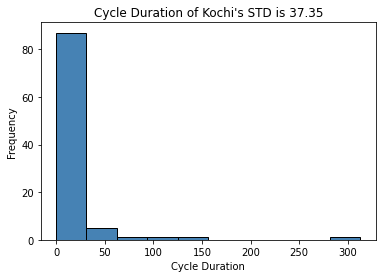

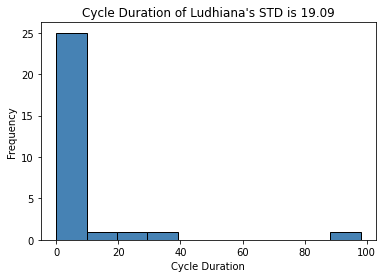

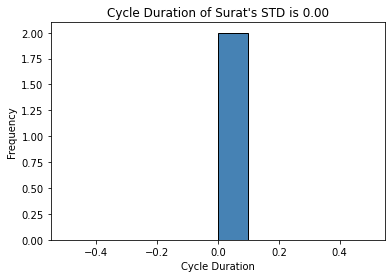

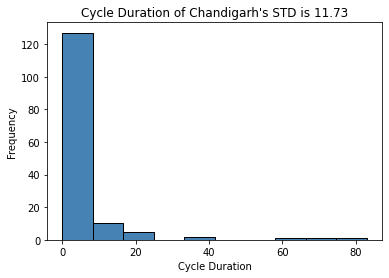

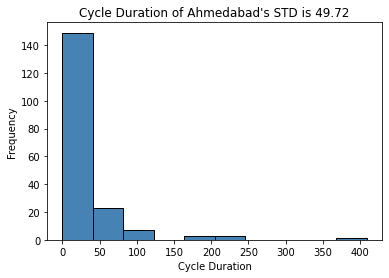

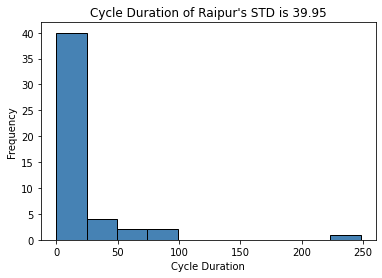

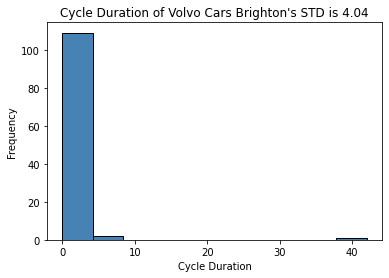

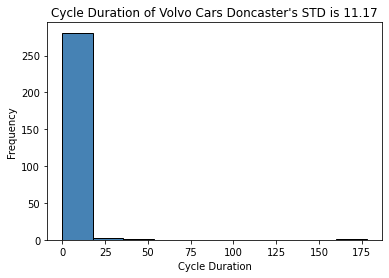

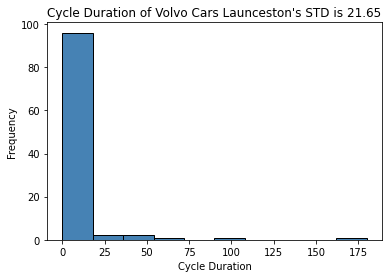

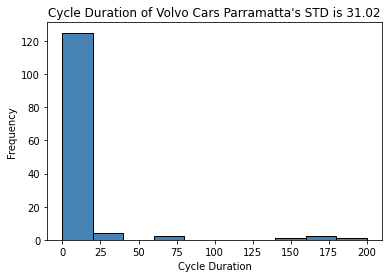

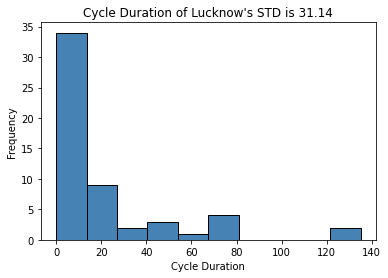

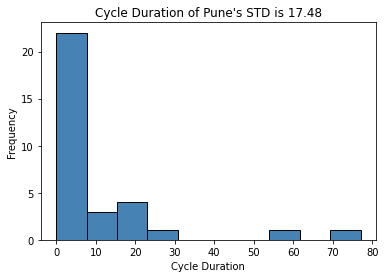

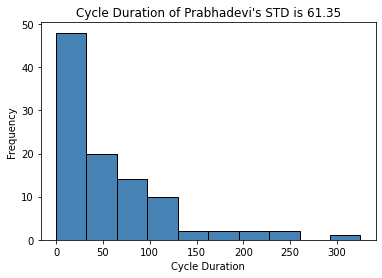

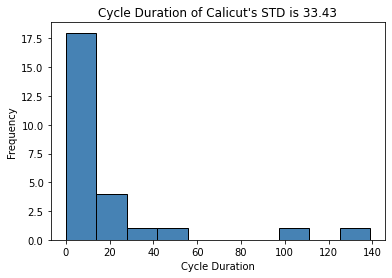

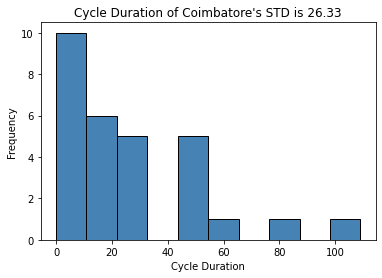

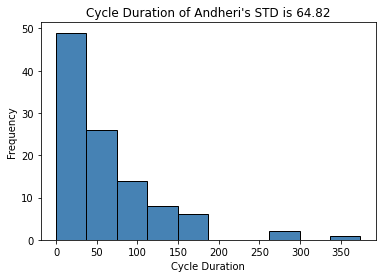

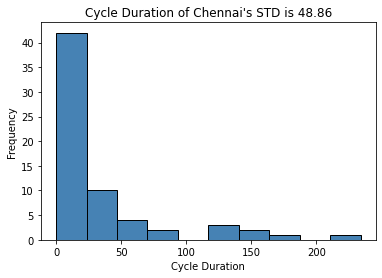

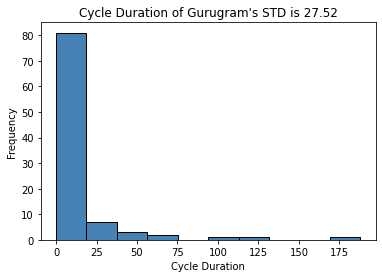

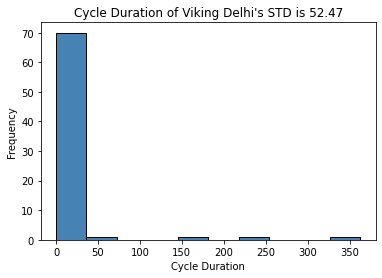

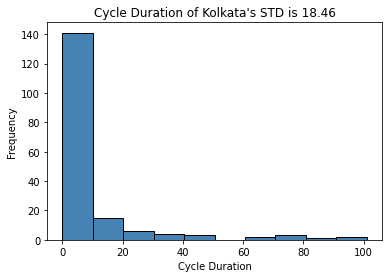

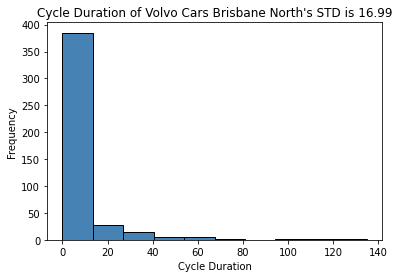

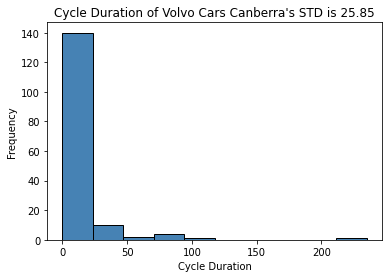

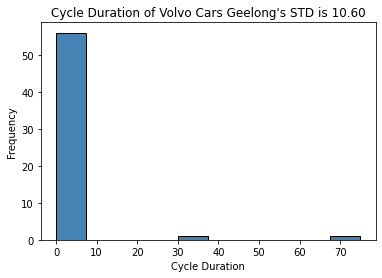

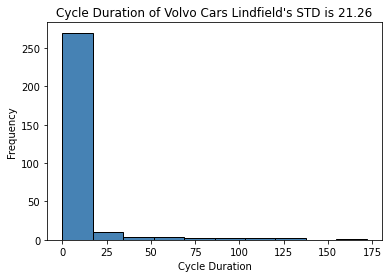

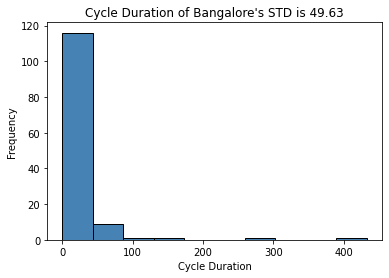

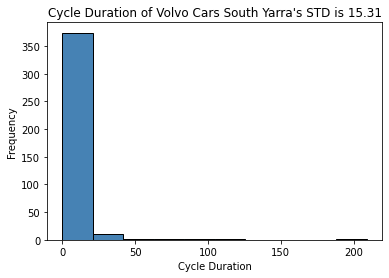

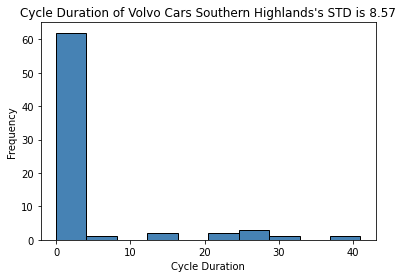

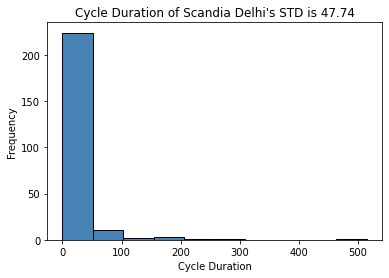

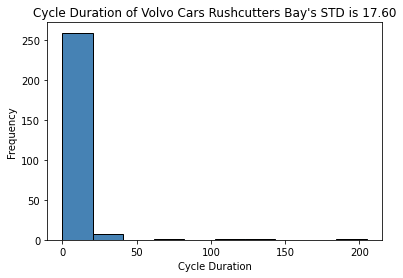

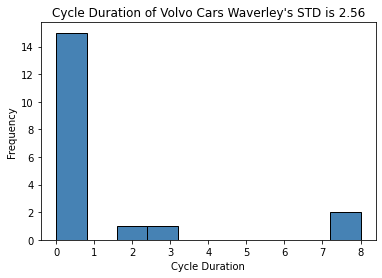

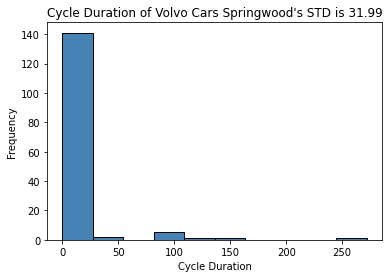

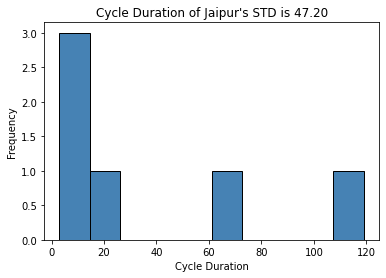

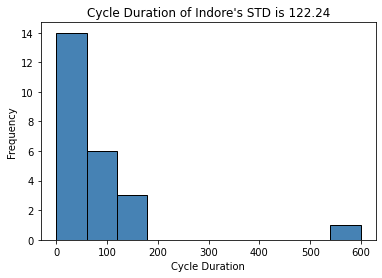

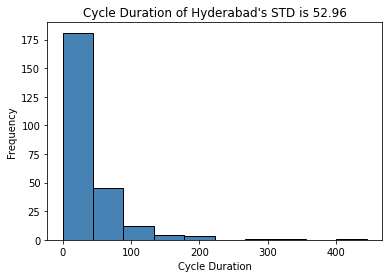

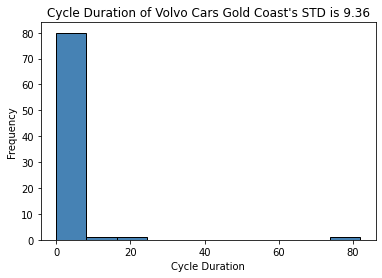

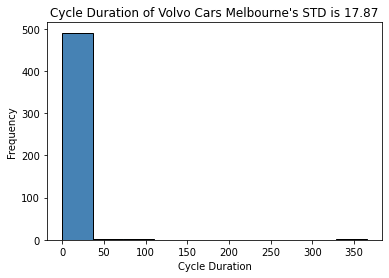

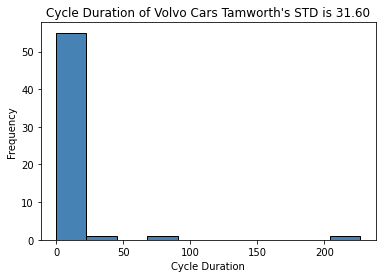

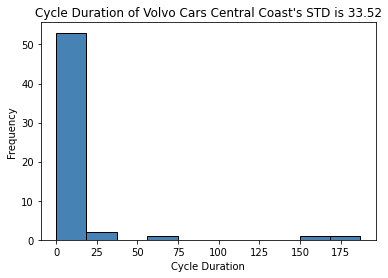

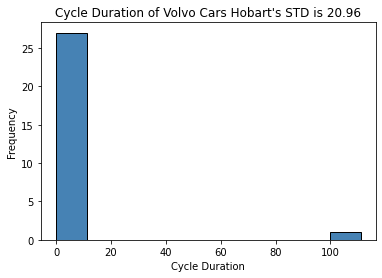

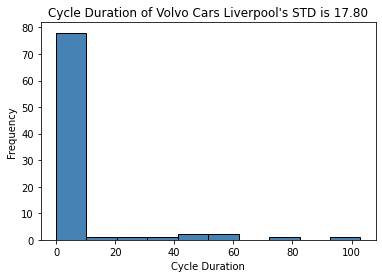

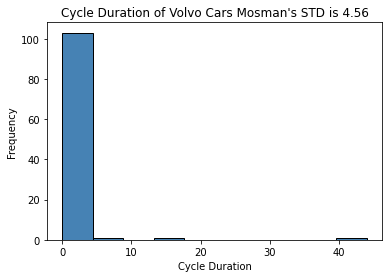

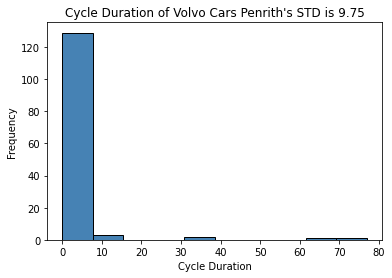

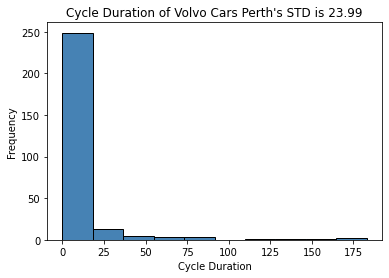

In [150]:
batch_plot_std(OP_OR_UI_SD_df, 'Cycle Duration', 'Dealer')

### 按Market维度统计Cycle Duration标准差
1. 按照MARKET分组计算Cycle Duration的标准差
2. 按照MARKET排序输出结果SD_CD_D_df

In [151]:
# 按市场维度统计成交销售周期标准差
SD_CD_M = OP_OR_UI_SD_df.groupby(['MARKET'])['Cycle Duration'].std().round(2)
SD_CD_M.rename('SD_CD_D', inplace=True)
SD_CD_M_df = SD_CD_M.reset_index()
# SD_OP_D_df.rename(columns={'vccmarket__c':'MARKET', 'partnerid__c':'DEALER CODE', 'name__c':'DEALER'}, inplace=True)
SD_CD_M_df.sort_values('MARKET', inplace=True)
SD_CD_M_df

MARKET  SD_CD_D
0  AUSTRALIA    19.45
1      INDIA    48.51

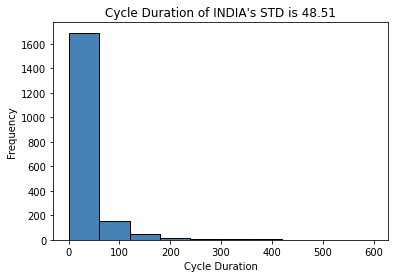

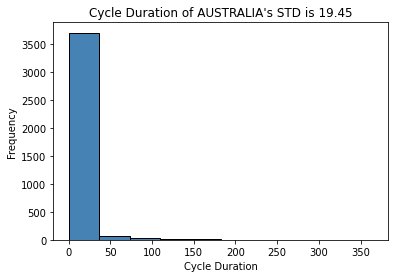

In [152]:
batch_plot_std(OP_OR_UI_SD_df, 'Cycle Duration', 'Market')

### 计算Cycle Duration和Course Rating的相关性
1. 按OP_TD_SALE_df.FederationIdentifier和course_rating_df.USER CODE内联得到CR_OPROR_df
2. 输出结果CR_OPTDR_df
3. plot_r函数输出相关性图片并保存

In [153]:
# 统计
CR_CD_df = CD_SALE_MEAN_df.merge(course_rating_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CR_CD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CR_CD_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      IN     6IN6060               Central Volvo             A-ARORA2   
1      IN     6IN6054                 Speed Volvo             A-KAPOOR   
2      IN     6IN6048    Krishna Auto, Chandigarh             A-SHARM3   
3      IN     6IN6071               Krishna Volvo             C-KUMAR1   
4      IN     6IN6071               Krishna Volvo               E-PAUL   
5      IN     6IN6043  Swede Auto Private Limited             G-CHAWLA   
6      IN     6IN6072   Volvo Tamil nadu(Chennai)             G-RAGHUN   
7      IN     6IN6038         Kerala Volvo, Kochi             J-BRITTO   
8      IN     6IN6057               Scandia Volvo             M-KAUSHI   
9      IN     6IN6072   Volvo Tamil nadu(Chennai)                  M-S   
10     IN     6IN6058      Krishna Auto, Ludhiana              N-VERMA   
11     IN     6IN6043  Swede Auto Private Limited             P-CHOUDH   
12     IN     6IN6038         Kerala Volvo, Kochi             P-SREEDH   
13     IN     6IN6038         Kerala Volvo, Kochi             R-ABRAHA   
14     IN     6IN6071               Krishna Volvo                R-ALI   
15     AU     6AU3170         Volvo Cars Waverley             S-AITKEN   
16     IN     6IN6075             Rajasthan Volvo             S-BIDSER   
17     IN     6IN6061                   SPL Volvo               S-DAS4   
18     IN    6IN60431               Viking Motors             S-GUPTA6   
19     IN     6IN6071               Krishna Volvo             S-REDDYP   
20     IN     6IN6071               Krishna Volvo             S-RIYAZA   
21     IN     6IN6057               Scandia Volvo             S-SING11   
22     IN     6IN6071               Krishna Volvo             S-SINGH2   
23     IN     6IN6054                 Speed Volvo             T-BHATIA   
24     IN     6IN6038         Kerala Volvo, Kochi                  U-R   
25     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
26     IN     6IN6045              Martial Motors                 V-MP   

    Cycle Duration Min Opportunity Time START DATE   MARKET_y   REGION  \
0        79.541667  2020-10-26 00:00:00 2019-08-06      INDIA  Central   
1        16.045455  2021-01-29 10:24:12 2019-06-20      INDIA    North   
2         7.981481  2020-11-23 00:00:00 2019-07-16      INDIA    North   
3        30.166667  2021-09-03 07:30:37 2021-08-28      INDIA    South   
4        29.924528  2020-11-25 00:00:00 2019-06-20      INDIA    South   
5        10.648649  2020-10-29 00:00:00 2019-05-22      INDIA    North   
6        40.280000  2021-07-09 06:28:49 2021-05-21      INDIA    South   
7         4.757576  2020-09-05 00:00:00 2019-08-01      INDIA    South   
8        23.038462  2020-08-04 00:00:00 2019-08-02      INDIA    North   
9         9.600000  2022-02-05 04:40:08 2022-01-26      INDIA    South   
10        1.200000  2022-04-01 12:30:35 2022-01-19      INDIA    North   
11       15.250000  2020-11-28 00:00:00 2019-08-12      INDIA    North   
12       35.315789  2020-08-14 00:00:00 2019-10-19      INDIA    South   
13       13.500000  2021-08-12 05:06:34 2021-07-22      INDIA    South   
14       21.951613  2020-10-15 00:00:00 2019-06-20      INDIA    South   
15        3.500000  2021-12-03 03:23:18 2021-07-22  AUSTRALIA    South   
16       37.333333  2022-01-24 08:32:16 2022-01-19      INDIA     West   
17        6.741379  2020-11-05 00:00:00 2019-08-02      INDIA     East   
18       36.095238  2020-12-16 12:26:47 2020-02-11      INDIA    North   
19       34.342857  2021-07-13 07:20:49 2021-07-06      INDIA    South   
20       24.562500  2021-09-22 07:06:28 2021-08-28      INDIA    South   
21       14.870968  2020-08-06 00:00:00 2019-05-17      INDIA    North   
22       50.489362  2020-10-31 00:00:00 2019-06-20      INDIA    South   
23       21.916667  2022-01-21 09:23:23 2022-01-19      INDIA    North   
24        8.875000  2021-09-17 12:17:51 2021-09-08      INDIA    South   
25    

In [154]:
CR_CD_df.to_csv(r'Correlation\CR_CD_df.csv')

In [155]:
plot_r(CR_CD_df, 'Course Rating vs Cycle Duration', 'Course Rating', 'Cycle Duration', 'Course Rating vs Cycle Duration')

### 计算Cycle Duration和Course Completion的相关性
1. 按CD_SALE_MEAN_df.FederationIdentifier和complement_df.CDSID内联得到CC_CD_df
2. 输出结果CC_CD_df
3. plot_r函数输出相关性图片并保存

In [156]:
CC_CD_df = CD_SALE_MEAN_df.merge(complement_df, left_on=['DEALER CODE', 'FederationIdentifier'], right_on=['DEALER CODE','CDSID'], how='inner')
CC_CD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CC_CD_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0       IN     6IN6060               Central Volvo             A-ARORA2   
1       IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2       AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3       AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4       IN     6IN6054                 Speed Volvo             A-KAPOOR   
..     ...         ...                         ...                  ...   
103     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
104     IN     6IN6045              Martial Motors                 V-MP   
105     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
106     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
107     IN     6IN6045              Martial Motors                  Y-A   

     Cycle Duration Min Opportunity Time START DATE_x   MARKET_y  \
0         79.541667  2020-10-26 00:00:00   2019-08-06      INDIA   
1          4.111111  2022-02-11 08:33:08   2022-01-18      INDIA   
2          1.913793  2021-09-21 03:34:51   2021-08-25  AUSTRALIA   
3          3.778571  2021-04-27 22:47:34   2020-03-12  AUSTRALIA   
4         16.045455  2021-01-29 10:24:12   2019-06-20      INDIA   
..              ...                  ...          ...        ...   
103       44.707317  2021-03-13 11:30:40   2021-03-11      INDIA   
104        1.714286  2022-02-18 08:31:31   2022-01-19      INDIA   
105        6.526316  2021-02-02 07:35:27   2020-03-11  AUSTRALIA   
106        0.526786  2021-12-22 23:29:34   2021-12-21  AUSTRALIA   
107       13.062500  2022-01-31 06:50:11   2022-01-22      INDIA   

                      DEALER_y     CDSID   ALL  Course Completion  \
0                       Indore  A-ARORA2  30.0               23.0   
1                     Gurugram  A-BISHT1  30.0               23.0   
2           Volvo Cars Geelong  A-BOYLE2  30.0               23.0   
3         Volvo Cars Lindfield  A-FRASER  30.0                7.0   
4                      Lucknow  A-KAPOOR  30.0               23.0   
..                         ...       ...   ...                ...   
103                 Prabhadevi  V-KHATRI  30.0               23.0   
104                  Bangalore      V-MP  30.0               22.0   
105  Volvo Cars Brisbane North    W-BASS  30.0                8.0   
106        Volvo Cars Brighton   W-WONG5  30.0                7.0   
107                  Bangalore       Y-A  30.0               22.0   

    START DATE_y  Sales Learning Programme Completion(%)  
0     2019-08-06                                   76.67  
1     2022-01-18                                   76.67  
2     2021-08-25                                   76.67  
3     2020-03-12                                   23.33  
4     2019-06-20                                   76.67  
..           ...                                     ...  
103   2021-03-11                                   76.67  
104   2022-01-19                                   73.33  
105   2020-03-11                                   26.67  
106   2021-12-21                                   23.33  
107   2022-01-22                                   73.33  

[108 rows x 14 columns]

In [157]:
CC_CD_df.to_csv(r'Correlation\CC_CD_df.csv')

In [158]:
plot_r(CC_CD_df, 'Course Completion vs Cycle Duration', 'Course Completion', 'Cycle Duration', 'Course Completion vs Cycle Duration')

### 计算Cycle Duration和Course Post-Test Score的相关性
1. 按CD_SALE_MEAN_df.FederationIdentifier和assessment_df.USER CODE内联得到CPT_CD_df
2. 输出结果CPT_CD_df
3. plot_r函数输出相关性图片并保存

In [159]:
CPT_CD_df = CD_SALE_MEAN_df.merge(assessment_df, left_on=['FederationIdentifier'], right_on=['USER CODE'], how='inner')
CPT_CD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
CPT_CD_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0      AU     6AU2088           Volvo Cars Mosman             B-AMBRO3   
1      AU     6AU3112      Volvo Cars South Yarra               B-DEAN   
2      AU     6AU4008   Volvo Cars Brisbane North             B-GUNNI1   
3      AU     6AU4008   Volvo Cars Brisbane North             B-PA1000   
4      AU     6AU3206        Volvo Cars Melbourne             D-DIMAR1   
5      AU     6AU3206        Volvo Cars Melbourne             D-TAYL12   
6      AU     6AU3107        Volvo Cars Doncaster              D-ZERBI   
7      AU     6AU3107        Volvo Cars Doncaster               E-CHOW   
8      AU     6AU2014  Volvo Cars Rushcutters Bay              F-MILLS   
9      AU     6AU2040        Volvo Cars Five Dock              F-MILLS   
10     AU     6AU3112      Volvo Cars South Yarra             J-DAWSO1   
11     AU     6AU4213       Volvo Cars Gold Coast             J-FERGU3   
12     AU     6AU2014  Volvo Cars Rushcutters Bay               J-MA36   
13     AU     6AU7254       Volvo Cars Launceston             J-PEARC2   
14     AU     6AU2156       Volvo Cars Parramatta             L-LARKI1   
15     AU     6AU3112      Volvo Cars South Yarra             M-CHRAP1   
16     AU     6AU7254       Volvo Cars Launceston              M-DEAN1   
17     AU     6AU3112      Volvo Cars South Yarra             M-MOOR12   
18     AU     6AU3107        Volvo Cars Doncaster              O-SMITH   
19     AU     6AU3206        Volvo Cars Melbourne             S-AGRAWA   
20     AU     6AU3170         Volvo Cars Waverley             S-AITKEN   
21     AU     6AU2605         Volvo Cars Canberra             S-COLLI2   
22     AU     6AU2068        Volvo Cars Lindfield             T-BEAUMO   
23     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
24     AU     6AU3187         Volvo Cars Brighton              W-WONG5   

    Cycle Duration Min Opportunity Time START DATE   MARKET_y   REGION  \
0         0.641509  2021-05-26 23:33:57 2021-03-15  AUSTRALIA  Central   
1         0.000000  2021-09-17 01:36:58 2021-03-15  AUSTRALIA    South   
2         8.032520  2021-02-06 03:46:07 2019-08-09  AUSTRALIA    North   
3         4.250000  2021-02-08 04:54:02 2019-05-20  AUSTRALIA    North   
4         1.900000  2021-07-20 00:46:16 2019-07-19  AUSTRALIA    South   
5         3.517857  2021-06-09 02:18:16 2019-07-04  AUSTRALIA    South   
6         1.990909  2021-05-11 07:28:38 2020-02-10  AUSTRALIA    South   
7         1.252632  2021-07-28 06:56:09 2021-07-26  AUSTRALIA    South   
8         2.960894  2021-06-13 06:17:18 2020-08-22  AUSTRALIA  Central   
9         0.000000  2022-01-15 00:17:18 2020-08-22  AUSTRALIA  Central   
10        5.651515  2021-04-19 05:32:02 2020-01-28  AUSTRALIA    South   
11        1.433735  2021-09-10 00:44:14 2021-08-26  AUSTRALIA    North   
12        3.393258  2022-01-05 01:11:50 2020-03-21  AUSTRALIA  Central   
13        6.311111  2021-10-22 03:32:14 2021-06-28  AUSTRALIA    South   
14        6.724638  2021-11-07 11:24:20 2020-03-12  AUSTRALIA  Central   
15        1.189944  2021-07-19 04:31:42 2021-07-16  AUSTRALIA    South   
16        5.034483  2021-08-12 01:05:16 2020-10-15  AUSTRALIA    South   
17        5.217949  2021-11-16 23:39:46 2021-07-28  AUSTRALIA    South   
18        0.712500  2021-07-12 00:33:09 2021-03-12  AUSTRALIA    South   
19        1.845238  2021-08-03 07:54:36 2019-07-08  AUSTRALIA    South   
20        3.500000  2021-12-03 03:23:18 2021-07-22  AUSTRALIA    South   
21       10.178295  2021-07-27 00:30:33 2020-09-29  AUSTRALIA    South   
22        7.737179  2021-03-19 01:16:31 2020-12-17  AUSTRALIA  Central   
23        6.526316  2021-02-02 07:35:27 2020-03-11  AUSTRALIA    North   
24        0.526786  2021-12-22 23:29:34 2021-12-21  AUSTRALIA    South   

                 DEALER GROUP  ...   LAST NAME FIRST NAME USER CODE    TYPE  \
0                  SMA Motors  ...     Ambrose        Ben  B-AMBRO3  Cours

In [160]:
CPT_CD_df.to_csv(r'Correlation\CPT_CD_df.csv')

In [161]:
plot_r(CPT_CD_df, 'Course Post-Test Score vs Cycle Duration', 'Course Post-Test Score', 'Cycle Duration', 'Course Post-Test Score vs Cycle Duration')

### 计算Cycle Duration和Sales Learning Programme Completion的相关性
1. 按CD_SALE_MEAN_df.FederationIdentifier和complement_df.CDSID内联得到SLPC_CD_df
2. 输出结果SLPC_CD_df
3. plot_r函数输出相关性图片并保存

In [162]:
SLPC_CD_df = CD_SALE_MEAN_df.merge(complement_df, left_on=['DEALER CODE','FederationIdentifier'], right_on=['DEALER CODE','CDSID'], how='inner')
SLPC_CD_df.rename(columns={'DEALER_x': 'DEALER', 'MARKET_x': 'MARKET', 'DEALER CODE_x': 'DEALER CODE'}, inplace=True)
SLPC_CD_df

MARKET DEALER CODE                      DEALER FederationIdentifier  \
0       IN     6IN6060               Central Volvo             A-ARORA2   
1       IN     6IN6043  Swede Auto Private Limited             A-BISHT1   
2       AU     6AU3222          Volvo Cars Geelong             A-BOYLE2   
3       AU     6AU2068        Volvo Cars Lindfield             A-FRASER   
4       IN     6IN6054                 Speed Volvo             A-KAPOOR   
..     ...         ...                         ...                  ...   
103     IN   6IN6049S2     KIFS Motors, Prabhadevi             V-KHATRI   
104     IN     6IN6045              Martial Motors                 V-MP   
105     AU     6AU4008   Volvo Cars Brisbane North               W-BASS   
106     AU     6AU3187         Volvo Cars Brighton              W-WONG5   
107     IN     6IN6045              Martial Motors                  Y-A   

     Cycle Duration Min Opportunity Time START DATE_x   MARKET_y  \
0         79.541667  2020-10-26 00:00:00   2019-08-06      INDIA   
1          4.111111  2022-02-11 08:33:08   2022-01-18      INDIA   
2          1.913793  2021-09-21 03:34:51   2021-08-25  AUSTRALIA   
3          3.778571  2021-04-27 22:47:34   2020-03-12  AUSTRALIA   
4         16.045455  2021-01-29 10:24:12   2019-06-20      INDIA   
..              ...                  ...          ...        ...   
103       44.707317  2021-03-13 11:30:40   2021-03-11      INDIA   
104        1.714286  2022-02-18 08:31:31   2022-01-19      INDIA   
105        6.526316  2021-02-02 07:35:27   2020-03-11  AUSTRALIA   
106        0.526786  2021-12-22 23:29:34   2021-12-21  AUSTRALIA   
107       13.062500  2022-01-31 06:50:11   2022-01-22      INDIA   

                      DEALER_y     CDSID   ALL  Course Completion  \
0                       Indore  A-ARORA2  30.0               23.0   
1                     Gurugram  A-BISHT1  30.0               23.0   
2           Volvo Cars Geelong  A-BOYLE2  30.0               23.0   
3         Volvo Cars Lindfield  A-FRASER  30.0                7.0   
4                      Lucknow  A-KAPOOR  30.0               23.0   
..                         ...       ...   ...                ...   
103                 Prabhadevi  V-KHATRI  30.0               23.0   
104                  Bangalore      V-MP  30.0               22.0   
105  Volvo Cars Brisbane North    W-BASS  30.0                8.0   
106        Volvo Cars Brighton   W-WONG5  30.0                7.0   
107                  Bangalore       Y-A  30.0               22.0   

    START DATE_y  Sales Learning Programme Completion(%)  
0     2019-08-06                                   76.67  
1     2022-01-18                                   76.67  
2     2021-08-25                                   76.67  
3     2020-03-12                                   23.33  
4     2019-06-20                                   76.67  
..           ...                                     ...  
103   2021-03-11                                   76.67  
104   2022-01-19                                   73.33  
105   2020-03-11                                   26.67  
106   2021-12-21                                   23.33  
107   2022-01-22                                   73.33  

[108 rows x 14 columns]

In [163]:
SLPC_CD_df.to_csv(r'Correlation\SLPC_CD_df.csv')

In [164]:
plot_r(SLPC_CD_df, 'Sales Learning Programme Completion(%) vs Cycle Duration', 'Sales Learning Programme Completion(%)', 'Cycle Duration', 'Sales Learning Programme Completion(%) vs Cycle Duration')